<a href="https://colab.research.google.com/github/NabilOulbaz/Text-Readability-Measuring/blob/main/Linguistic_Analsysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dataset / Split texts into sentences / Tokenization 

In [ ]:
import spacy
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import math
import string

In [ ]:
# Import a spacy model for tokenization
!python -m spacy download fr_core_news_sm

     |████████████████████████████████| 14.7 MB 6.4 MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-py3-none-any.whl size=14727025 sha256=823d465302a24e1467820849765ab9f81c5747bdfa4095adac7e4466a9977fdd
  Stored in directory: /tmp/pip-ephem-wheel-cache-r93a5j_1/wheels/c9/a6/ea/0778337c34660027ee67ef3a91fb9d3600b76777a912ea1c24
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
nlp = spacy.load("fr_core_news_sm")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/M1 ATAL/TER/textFiles

/content/gdrive/MyDrive/M1 ATAL/TER/textFiles


### Do not Run this cell

In [ ]:
#Collection of texts

corpus = dict()

#stop_sents = ["Author","Illustrator","Translator"]  
#à utiliser plus tard pour enlever quelques phrases en anglais
for top, dirs, files in os.walk(os.getcwd()):  
  globals()[top.split(os.path.sep)[-1]] = list()
  for file in files:
    if file.endswith('txt'):
      with open(os.path.join(top,file),"r") as f:
        text = f.read().replace('\n',' ').replace('  \x0c','. ')
    if len(text)>0:    
      globals()[top.split(os.path.sep)[-1]].append(text)
  corpus[top.split(os.path.sep)[-1]] = globals()[top.split(os.path.sep)[-1]]

corpus.pop("textFiles")

with open('corpus.pkl', 'wb') as file: 
     pickle.dump(corpus, file) #Serialises inside a file




### Run this instead ( to get the corpus pickle from drive)

In [ ]:
with open('corpus.pkl', 'rb') as file: 
     corpus=pickle.load(file) #Loading the pickle

#Structure : corpus[class_label][text_index]

Split texts by sentence

In [ ]:
stop_sents = ["Author","Illustrator","Translator"]
for key in corpus.keys():
  globals()[key+"_sents"] = list()
  for text in corpus[key]:
    doc = nlp(text)
    sentences = [sent.string.strip() for sent in doc.sents]
    for sent in sentences[:]:
      for stop in stop_sents: #Removing sentences containing Author, Illustrator and Translator names
        if stop in sent:
          sentences.remove(sent)
          break
      if len(sent)<7:
        sentences.remove(sent)
    globals()[key+"_sents"].append(sentences)


# Creating Sentences dictionnary

sents = dict()
for key in corpus.keys():
  for text in globals()[key+'_sents']:
    if len(text)==0:
      globals()[key+'_sents'].remove(text)
  sents[key] = globals()[key+'_sents']



### DO NOT RUN CELL BELOW (Tokenization 6/10 mins runtime)

In [ ]:
#Tokenization

levels = ['level1','level2','level3','level4']

spacy_tokenize = lambda text: [token.text for token in nlp(text)]

tokens = dict()

for level in levels:
  tokens[level] = list()
  spacy_tokens = list()
  for text in sents[level]:
      spacy_tok = list()
      for i in range (0, len(text)):
        spacy_tok.append(spacy_tokenize(text[i]))
      spacy_tokens.append(spacy_tok)
  tokens[level].extend(spacy_tokens)

for level in levels:
  for text in tokens[level]:
    for sent in text:
      for token in sent[:]:
        if '/' in token:
          sent.remove(token)

with open('tokens.pkl','wb') as file:
  pickle.dump(tokens,file)

### Run this instead ( to get tokens pickle from drive)

In [ ]:
with open('tokens.pkl','rb') as file:
  tokens = pickle.load(file)

In [ ]:
with open('tokens_split.pkl','rb') as file:
  tokens_split = pickle.load(file)

# Statistical analysis on the corpus

We're using **Spacy** library to analyse our corpus. The first step is to import all the documents, split them per sentences, words and syllables.
Second step is to process the raw text files ( tokenization, removal of stop words\ short words).

Next, we're conducting a statistical analysis on these documents :
- Average number of sentences per level.
- Number of words per document.
- Average number of words per sentence in each document per level.
- Average number of words per level.
- Number of unique words per document.
- Average number of unique words per level.


###Getting unique tokens per document per level ( Used for vocabulary analysis)

In [ ]:
levels = ['level1','level2','level3','level4']
vocab = dict()
for level in levels:
  vocab[level] = list()
  for text in tokens[level]:
    unique = set()
    for sent in text:
      for token in sent:
        unique.add(token)
    vocab[level].append(unique)


NameError: ignored

### Statistical analysis on the corpus (Not normalized)

In [ ]:
from pandas._libs import index
#DataFrame pour les statistiques
levels = ['level1','level2','level3','level4']
cols = ['level1','level2','level3','level4','total']

# Nombre de fichiers, de phrases, de tokens par level et sur la totalité du corpus
nb_ph_moy= list()
nb_ph = list()
nb_files = list()
nb_tokens = list()
nb_tokens_moy = list()
len_ph_moy = list()


for level in levels:
  nb_txt = len(tokens[level])
  nb_files.append(nb_txt)
  nbr_ph=0
  nbr_ph_moy =0
  nbr_tokens =0
  nbr_tokens_moy =0
  len_phr=0
  len_phr_moy=0
  for text in tokens[level]:
    nbr_ph+=len(text)
    temp_nbr_ph = len(text)
    nbr_ph_moy+=len(text)/nb_txt
    for sent in text:
      nbr_tokens+=len(sent)
      nbr_tokens_moy+= len(sent)/nb_txt
      len_phr+=len(sent)
    len_phr_moy+=len_phr/temp_nbr_ph
    len_phr=0
  len_phr_moy = len_phr_moy/nb_txt
  nb_tokens.append(nbr_tokens)
  nb_tokens_moy.append(nbr_tokens_moy)
  nb_ph.append(nbr_ph)
  nb_ph_moy.append(nbr_ph_moy)
  len_ph_moy.append(len_phr_moy)
nb_files_tot = sum(nb_files)
nb_ph_tot = sum(nb_ph)
nb_tokens_tot = sum(nb_tokens)
nb_tokens_moy_tot = nb_tokens_tot/nb_files_tot
nb_ph_moy_tot = nb_ph_tot/nb_files_tot
len_ph_moy_tot = sum(len_ph_moy)/len(levels)
nb_files.append(nb_files_tot)
nb_ph.append(nb_ph_tot)
nb_tokens.append(nb_tokens_tot)
nb_tokens_moy.append(nb_tokens_moy_tot)
nb_ph_moy.append(nb_ph_moy_tot)
len_ph_moy.append(len_ph_moy_tot)


#Taille du vocabulaire par level
taille_vocab =list()
taille_vocab_moy=list()
all_vocab =set()
for level in levels:
  vocab_level = set()
  vocab_text = 0
  for text in vocab[level]:
    for token in text:
      all_vocab.add(token)
      vocab_level.add(token)
  taille_vocab.append(len(vocab_level))

taille_vocab.append(len(all_vocab))



#Taille de vocab moyenne
taille_vocab_moy = list()
taille_moy_total = 0
for level in levels:
  moy=0
  for text in vocab[level]:
    taille_moy_total+= len(text)/nb_files_tot
    moy+=len(text)/len(vocab[level])
  taille_vocab_moy.append(moy)
taille_vocab_moy.append(taille_moy_total)  






#Creating DataFrame for statistical analysis
df = pd.DataFrame([nb_files,nb_ph,nb_ph_moy,len_ph_moy,nb_tokens,nb_tokens_moy,taille_vocab,taille_vocab_moy],columns=cols)


df.index = ["Nombre de fichiers","Nombre de phrases total","Nombre de phrases moyen","Longueur moyenne de phrase","Nombre de tokens", "Nombre de token moyen","Taille du vocabulaire", "Taille moyenne du vocabulaire"]

round(df,0)


,level1,level2,level3,level4,total
Nombre de fichiers,240.0,314.0,134.0,58.0,746.0
Nombre de phrases total,4880.0,13049.0,10354.0,7743.0,36026.0
Nombre de phrases moyen,20.0,42.0,77.0,134.0,48.0
Longueur moyenne de phrase,8.0,10.0,12.0,13.0,11.0
Nombre de tokens,38976.0,128019.0,124901.0,101165.0,393061.0
Nombre de token moyen,162.0,408.0,932.0,1744.0,527.0
Taille du vocabulaire,4836.0,10903.0,11953.0,11410.0,23100.0
Taille moyenne du vocabulaire,79.0,180.0,351.0,589.0,210.0


###Intersection des vocabulaires

In [ ]:
unique_vocab = dict()
for level in levels:
  vocab_level = set()
  for text in vocab[level]:
    for token in text:
      vocab_level.add(token)
  unique_vocab[level] = vocab_level

liste_de_liste = list()
for level in levels:
    list_stat = list()
    for lvl in levels:
          num = 0
          for token in unique_vocab[level]:
              if token in unique_vocab[lvl]:
                   num += 1/len(unique_vocab[level])
          list_stat.append(num)
    liste_de_liste.append(list_stat)

df = pd.DataFrame(liste_de_liste,columns=levels)
df.index = levels
df.columns = levels
round(df,3)
#Intersection a lire par ligne : Ligne 1 Colonne 3 => Intersection : Vocabulaire du niveau 1 contenu dans le niveau 3.

,level1,level2,level3,level4
level1,1.000,0.669,0.654,0.594
level2,0.297,1.000,0.511,0.469
level3,0.265,0.466,1.000,0.472
level4,0.252,0.449,0.495,1.000


# Normalizing dataset

We prepare a variant of our dataset which allows to have properly formated tokens: We remove non-alphabetical characters, and transform all remaining characters to lowercase.

In [ ]:
# the native re module does not handle \p{} unicode property
import nltk
nltk.download('stopwords')

import regex as re

from nltk.corpus import stopwords

final_stopwords_list = stopwords.words('english') + stopwords.words('french')

# define a tokenizer which tokenizes a text by splitting at each whitespace character
ws_tokenizer = nltk.WhitespaceTokenizer()

def normalize_characters(doc):
    doc = re.sub('[^\p{L}\s]', '', doc).strip()
    doc = doc.lower()
    return ws_tokenizer.tokenize(doc)

def normalize_characters_mod(doc):
    doc = re.sub('[^\p{L}\s]', '', doc).strip()
    doc = doc.lower()
    return doc

def normalize_tokens(tokens):
    tokens = [token for token in tokens if token not in final_stopwords_list]
    tokens = [token for token in tokens if len(token) >2]
    return tokens

def normalize_tokens_mod(token):
    if (token not in final_stopwords_list) and (len(token) >2):
      return token
    else:
      return ''
# all in one
def preprocess_document(doc):
    doc = re.sub('[^\p{L}\s]', ' ', doc).strip()
    doc = doc.lower()
    if (doc not in final_stopwords_list) and (len(doc) >2):
      return doc
    else:
      return 'bad'  #Had a problem with '' so we returned 'bad' instead


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Creating a normalized tokens dict

In [ ]:
from copy import deepcopy
tokens_norm = deepcopy(tokens)

for level in levels:
  for document in tokens_norm[level]:
    for sentence in document[:]:
      for i in range(len(sentence)):
        sentence[i] = preprocess_document(sentence[i])
      for sentence in document[:]:
        for token in sentence[:]:
          if token == 'bad':
            sentence.remove(token)
    #if sentence is less than 3 words, we remove it, because it now lacks sense
    for sentence in document[:]:  
      if len(sentence) < 3:
        document.remove(sentence)
    #if text no longer contains sentences, remove text
    if len(document) == 0:
      tokens_norm[level].remove(document)

Getting the normalized vocab

In [ ]:
#Unique tokens per level
vocab_norm = dict()
for level in levels:
  vocab_norm[level] = list()
  for text in tokens_norm[level]:
    unique = set()
    for sent in text:
      for token in sent:
        unique.add(token)
    vocab_norm[level].append(unique)


### Statistical analysis on normalized dataset

In [ ]:
from pandas._libs import index
#DataFrame pour les statistiques
levels = ['level1','level2','level3','level4']
cols = ['level1','level2','level3','level4','total']

# Nombre de fichiers, de phrases, de tokens par level et sur la totalité du corpus

nb_ph_moy= list()
nb_ph = list()
nb_files = list()
nb_tokens = list()
nb_tokens_moy = list()
len_ph_moy = list()

for level in levels:
  nb_txt = len(tokens_norm[level])
  nb_files.append(nb_txt)
  nbr_ph=0
  nbr_ph_moy =0
  nbr_tokens =0
  nbr_tokens_moy =0
  len_phr=0
  len_phr_moy=0
  for text in tokens_norm[level]:
    nbr_ph+=len(text)
    nbr_ph_moy+=len(text)/nb_txt
    temp_nbr_ph = len(text)
    for sent in text:
      nbr_tokens+=len(sent)
      nbr_tokens_moy+= len(sent)/nb_txt
      len_phr+=len(sent)
    len_phr_moy+=len_phr/temp_nbr_ph
    len_phr=0
  len_phr_moy = len_phr_moy/nb_txt
  nb_tokens.append(nbr_tokens)
  nb_tokens_moy.append(nbr_tokens_moy)
  nb_ph.append(nbr_ph)
  nb_ph_moy.append(nbr_ph_moy)
  len_ph_moy.append(len_phr_moy)
nb_files_tot = sum(nb_files)
nb_ph_tot = sum(nb_ph)
nb_tokens_tot = sum(nb_tokens)
nb_tokens_moy_tot = nb_tokens_tot/nb_files_tot
nb_ph_moy_tot = nb_ph_tot/nb_files_tot
len_ph_moy_tot = sum(len_ph_moy)/len(levels)
nb_files.append(nb_files_tot)
nb_ph.append(nb_ph_tot)
nb_tokens.append(nb_tokens_tot)
nb_tokens_moy.append(nb_tokens_moy_tot)
nb_ph_moy.append(nb_ph_moy_tot)
len_ph_moy.append(len_ph_moy_tot)


#Taille du vocabulaire par level
taille_vocab =list()
taille_vocab_moy=list()
all_vocab =set()
for level in levels:
  vocab_level = set()
  vocab_text = 0
  for text in vocab_norm[level]:
    for token in text:
      all_vocab.add(token)
      vocab_level.add(token)
  taille_vocab.append(len(vocab_level))

taille_vocab.append(len(all_vocab))



#Taille de vocab moyenne
taille_vocab_moy = list()
taille_moy_total = 0
for level in levels:
  moy=0
  for text in vocab_norm[level]:
    taille_moy_total+= len(text)/nb_files_tot
    moy+=len(text)/len(vocab[level])
  taille_vocab_moy.append(moy)
taille_vocab_moy.append(taille_moy_total)  







df_norm = pd.DataFrame([nb_files,nb_ph,nb_ph_moy,len_ph_moy,nb_tokens,nb_tokens_moy,taille_vocab,taille_vocab_moy],columns=cols)


df_norm.index = ["Nombre de fichiers","Nombre de phrases total","Nombre de phrases moyen","Longueur moyenne de phrase (mots pleins) ","Nombre de tokens", "Nombre de token moyen","Taille du vocabulaire", "Taille moyenne du vocabulaire"]

round(df_norm,0)


,level1,level2,level3,level4,total
Nombre de fichiers,228.0,314.0,134.0,58.0,734.0
Nombre de phrases total,3038.0,9085.0,8073.0,6091.0,26287.0
Nombre de phrases moyen,13.0,29.0,60.0,105.0,36.0
Longueur moyenne de phrase (mots pleins),5.0,5.0,6.0,7.0,6.0
Nombre de tokens,15540.0,50550.0,51773.0,42733.0,160596.0
Nombre de token moyen,68.0,161.0,386.0,737.0,219.0
Taille du vocabulaire,3881.0,8914.0,10130.0,9890.0,19167.0
Taille moyenne du vocabulaire,42.0,107.0,241.0,441.0,138.0


#Implementing unsupervised methods on raw data set ( mathematical formulas)

##The Gunning fog index  GFI
The formula is represented as follows : $GFI = 0.4(\frac{totalWords}{totalSentences} + 100\frac{longWords}{totalSentences})$ 

Having longWords as words longer than 7 characters.

GFI value and readability are negatively correlated.


In [ ]:
GFI = dict()
for level in levels:
  GFI[level]=list()
  level_score = list()
  for text in tokens[level]:
    totalWords = 0
    totalSentences = len(text)
    longWords=0
    for sent in text:
      totalWords += len(sent)
      longWords += len([token for token in sent if len(token)>6])
    score = 0.4*((totalWords/totalSentences) + 100*longWords/totalSentences)
    level_score.append(score)
  GFI[level].extend(level_score)





In [ ]:
#Calcul de la moyenne GFI par level
moy_GFI= list()
for level in levels:
  moy=0
  for score in GFI[level]:
    moy+= score/len(GFI[level])
  moy_GFI.append(moy)

moy_GFI

##The Automated readability index ARI
The formula is represented as follows : $ARI = 4.71(\frac{totalCharacters}{totalWords} + 0.5\frac{totalWords}{totalSentences})-21.43$ 

It corresponds to the number of study years needed to understand a text.


In [ ]:
ARI = dict()
for level in levels:
  ARI[level]=list()
  level_score = list()
  for text in tokens[level]:
    totalWords = 0
    totalSentences = len(text)
    totalCharacters = 0
    for sent in text:
        totalWords += len(sent)
        totalCharacters += sum(len(token) for token in sent)
    score = 4.71*((totalCharacters/totalWords) + 0.5*totalWords/totalSentences)-21.43
    level_score.append(score)
 
  ARI[level].extend(level_score)

In [ ]:
#Calcul de la moyenne ARI par level
moy_ARI= list()
for level in levels:
  moy=0
  for score in ARI[level]:
    moy+= score/len(ARI[level])
  moy_ARI.append(moy)

##The Flesch reading ease FRE
The formula is represented as follows : $FRE = 206.835-1.015(\frac{totalWords}{totalSentences})- 84.6(\frac{totalSyllables}{totalWords})$ 

This method gives higher scores to more readable texts.


##The Flesch-Kincaid grade level FKGL
The formula is represented as follows : $FKGL = 0.39(\frac{totalWords}{totalSentences}) + 11.8(\frac{totalSyllables}{totalWords})-15.59$

Also corresponds to the number of years of education needed to understand a certain text.


##The Simple Measure of Gobbledygook SMOG
The formula is represented as follows : $SMOG = 1.0430*\sqrt{numberofPolysyllables\frac{30}{totalSentences}} +3.1291$

the number of Polysyllables is the number of words containing 3 or more syllables.




##The Reading Ease Level formula ( FRE adapted to french)
The formula is represented as follows : $REL = 207 - 1.015(\frac{totalWords}{totalSentences}) - 0.736(\frac{totalSyllables}{totalWords})$

Ranges from 100 (readable texts) to 0( difficult texts)

###In order to calculate the FRE,FKGL and SMOG, we need to generate syllables.

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 30.2 MB/s 


In [ ]:
from unidecode import unidecode

In [ ]:
def syllablesplit(input):
  nb_syllabes = 0
  syllables='aeiouy'
  for char in input:
    for syl in syllables:
      if syl == unidecode(char):
        nb_syllabes+=1
  return(nb_syllabes)

  


In [ ]:
#Counting the number of syllables per token
syllables = dict()
for level in levels:
  syllables[level]=list()
  for text in tokens[level]:
    text_list = list()
    for sent in text:
      sent_list = list()
      for tok in sent:
        k = syllablesplit(tok)
        sent_list.append(k)
      text_list.append(sent_list)
    syllables[level].append(text_list)


NameError: ignored

In [ ]:
FRE = dict()
FKGL = dict()
SMOG = dict()
REL = dict()
for level in levels:
  FRE[level]=list()
  FKGL[level]=list()
  SMOG[level]=list()
  REL[level] = list()
  level_score_FRE = list()
  level_score_FKGL = list()
  level_score_SMOG = list()
  level_score_REL = list()
  for text in syllables[level]:
    totalWords = 0
    totalSentences = len(text)
    totalSyllables = 0
    nbPolysyllables = 0
    for sent in text:
        totalWords += len(sent)
        totalSyllables += sum(sent)
        nbPolysyllables +=sum(tok for tok in sent if tok>=3)
    score_FRE = 206.835-1.015*(totalWords/totalSentences)-84.6*(totalSyllables/totalWords)
    score_FKGL = 0.39*(totalWords/totalSentences)+11.8*(totalSyllables/totalWords)-15.59
    score_SMOG = 1.043*math.sqrt(nbPolysyllables*(30/totalSentences))+3.1291
    score_REL = 207-1.015*(totalWords/totalSentences)-73.6*(totalSyllables/totalWords)
    level_score_FRE.append(score_FRE)
    level_score_FKGL.append(score_FKGL)
    level_score_SMOG.append(score_SMOG)
    level_score_REL.append(score_REL)
  FRE[level].extend(level_score_FRE)
  FKGL[level].extend(level_score_FKGL)
  SMOG[level].extend(level_score_SMOG)
  REL[level].extend(level_score_REL)

In [ ]:
#Calcul de la moyenne FRE,FKGL and SMOG par level
moy_FRE= list()
moy_FKGL=list()
moy_SMOG=list()
moy_REL=list()
for level in levels:
  moy_1=0
  moy_2=0
  moy_3=0
  moy_4=0
  for score in FRE[level]:
    moy_1+= score/len(FRE[level])
  for score in FKGL[level]:
    moy_2+= score/len(FKGL[level])
  for score in SMOG[level]:
    moy_3+= score/len(SMOG[level])
  for score in REL[level]:
    moy_4+= score/len(REL[level])  
  moy_FRE.append(moy_1)
  moy_FKGL.append(moy_2)
  moy_SMOG.append(moy_3)
  moy_REL.append(moy_4)

In [ ]:
dicts = [GFI, ARI, FRE, FKGL, SMOG,REL]
features = list()
for level in levels:
  k = len(GFI[level])
  i=0
  while i<k:
    temp = []
    for dic in dicts:
      temp.append(dic[level][i])
    features.append(temp)
    i+=1
    
    

In [ ]:
# How to compute pseudo-perplexity (pppl) ?
# pppl est la version neuronale de la mesure de la perplexity (ppl) proposée pour évaluer intrinsèquement les modèles de langue probabilistes.
# La pppl est utilisée pour évaluer les modèles de langues neuronaux.
# + un score de pppl est bas, plus le modèle arrive facilement à "modéliser/prédire" un texte donné.

# https://huggingface.co/docs/transformers/perplexity
# https://arxiv.org/abs/1910.14659
# pseudo ppl https://stackoverflow.com/questions/70464428/
# https://huggingface.co/asi/gpt-fr-cased-small


#model_name = 'asi/gpt-fr-cased-base' # ram plante
model_name = "asi/gpt-fr-cased-small"


import torch
import sys
import numpy as np
 

# ValueError: Unrecognized configuration class <class 'transformers.models.gpt2.configuration_gpt2.GPT2Config'> for this kind of AutoModel: AutoModelForMaskedLM.
# model = AutoModelForMaskedLM.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)
!pip install transformers
from transformers import GPT2Tokenizer, GPT2LMHeadModel
# Load pre-trained model (weights)
with torch.no_grad():
        model = GPT2LMHeadModel.from_pretrained(model_name)
        model.eval()
# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


# IndexError: index out of range in self
# the error here is because you've called the model with a sequence that is longer than 512 tokens. BERT-like models have a fixed limit in sequence length, which is often 512 or 1024.
max_length=100

def gpt2_pppl_score(sentence):
    tokenize_input = tokenizer.encode(sentence)
    #print (len(tokenize_input))
    tensor_input = torch.tensor([tokenize_input[:max_length]])
    loss=model(tensor_input, labels=tensor_input)[0]
    return np.exp(loss.detach().numpy())

def gpt2_token_pppl_score(sentence):
    tokenize_input = tokenizer.encode(sentence)
    token_pppl_score = list()
    for token in tokenize_input:
      tensor_input = torch.tensor([token])
      loss=model(tensor_input, labels=tensor_input)[0]
      token_pppl_score.append(np.exp(loss.detach().numpy()))
    return token_pppl_score


In [ ]:
perplex = []
total = 0
nb_tot = 0
for level in levels:
  nb_text = len(corpus[level])
  nb_tot += nb_text
  ppl = 0
  for text in corpus[level]:
    calcul = gpt2_pppl_score(text.strip())
    ppl += calcul/nb_text
    total += calcul
  perplex.append(ppl)
perplex.append(total/nb_tot)

NameError: ignored

In [ ]:
perplex

###Summarizing the mathematical formulas into a DataFrame

In [ ]:
math_formulas = pd.DataFrame([moy_GFI,moy_ARI,moy_FRE,moy_FKGL,moy_SMOG,moy_REL,perplex[:-1]],columns=levels)

math_formulas.index = ["The Gunning fog index GFI", "The Automated readability index ARI","The Flesch reading ease FRE","The Flesch-Kincaid grade level FKGL","The Simple Measure of Gobbledygook SMOG","Reading Ease Level","Pseudo-perplexity"]



In [ ]:
round(math_formulas,2)

#Implementing unsupervised methods on normalized data set ( mathematical formulas)

In [ ]:
#Calculating GFI score
GFI = dict()
for level in levels:
  GFI[level]=list()
  level_score = list()
  for text in tokens_norm[level]:
    totalWords = 0
    totalSentences = len(text)
    longWords=0
    for sent in text:
      totalWords += len(sent)
      longWords += len([token for token in sent if len(token)>6])
    score = 0.4*((totalWords/totalSentences) + 100*longWords/totalSentences)
    level_score.append(score)
  GFI[level].extend(level_score)


# Calculating ARI score
ARI = dict()
for level in levels:
  ARI[level]=list()
  level_score = list()
  for text in tokens_norm[level]:
    totalWords = 0
    totalSentences = len(text)
    totalCharacters = 0
    for sent in text:
        totalWords += len(sent)
        totalCharacters += sum(len(token) for token in sent)
    score = 4.71*((totalCharacters/totalWords) + 0.5*totalWords/totalSentences)-21.43
    level_score.append(score)
  ARI[level].extend(level_score)

#Counting the number of syllables per token
syllables = dict()
for level in levels:
  syllables[level]=list()
  for text in tokens_norm[level]:
    text_list = list()
    for sent in text:
      sent_list = list()
      for tok in sent:
        k = syllablesplit(tok)
        sent_list.append(k)
      text_list.append(sent_list)
    syllables[level].append(text_list)

#FRE / FKGL and SMOG
FRE = dict()
FKGL = dict()
SMOG = dict()
for level in levels:
  FRE[level]=list()
  FKGL[level]=list()
  SMOG[level]=list()
  level_score_FRE = list()
  level_score_FKGL = list()
  level_score_SMOG = list()
  for text in syllables[level]:
    totalWords = 0
    totalSentences = len(text)
    totalSyllables = 0
    nbPolysyllables = 0
    for sent in text:
        totalWords += len(sent)
        totalSyllables += sum(sent)
        nbPolysyllables +=sum(tok for tok in sent if tok>=3)
    score_FRE = 206.835-1.015*(totalWords/totalSentences)-84.6*(totalSyllables/totalWords)
    score_FKGL = 0.39*(totalWords/totalSentences)+11.8*(totalSyllables/totalWords)-15.59
    score_SMOG = 1.043*math.sqrt(nbPolysyllables*(30/totalSentences))+3.1291
    level_score_FRE.append(score_FRE)
    level_score_FKGL.append(score_FKGL)
    level_score_SMOG.append(score_SMOG)
  FRE[level].extend(level_score_FRE)
  FKGL[level].extend(level_score_FKGL)
  SMOG[level].extend(level_score_SMOG)

# Calculating means

#Calcul GFI mean per level
moy_GFI= list()
for level in levels:
  moy=0
  for score in GFI[level]:
    moy+= score/len(GFI[level])
  moy_GFI.append(moy)

#Calcul de la moyenne ARI par level
moy_ARI= list()
for level in levels:
  moy=0
  for score in ARI[level]:
    moy+= score/len(ARI[level])
  moy_ARI.append(moy)

#Calcul de la moyenne FRE,FKGL and SMOG par level
moy_FRE= list()
moy_FKGL=list()
moy_SMOG=list()
for level in levels:
  moy_1=0
  moy_2=0
  moy_3=0
  for score in FRE[level]:
    moy_1+= score/len(FRE[level])
  for score in FKGL[level]:
    moy_2+= score/len(FKGL[level])
  for score in SMOG[level]:
    moy_3+= score/len(SMOG[level])
  
  moy_FRE.append(moy_1)
  moy_FKGL.append(moy_2)
  moy_SMOG.append(moy_3)



Summarizing the statistical analysis in a DataFrame

In [ ]:
math_formulas_norm = pd.DataFrame([moy_GFI,moy_ARI,moy_FRE,moy_FKGL,moy_SMOG],columns=levels)

math_formulas_norm.index = ["The Gunning fog index GFI", "The Automated readability index ARI","The Flesch reading ease FRE","The Flesch-Kincaid grade level FKGL","The Simple Measure of Gobbledygook SMOG"]



In [ ]:
math_formulas_norm

# Implementing supervised methods on several text units (full text / expanding levels 4 and 3  / sentence level/ 60 words level) Normalized and not normalized

## Creating all the lists we're using during our experiments

1) Raw text list and labels

In [ ]:
tokens_list=list()
labels = list()
for level in levels:
    for text in tokens[level]:
      tex = []
      labels.append(int(level[-1]))
      for sent in text:
        for token in sent:
          tex.append(token.replace('\u200b',''))
      tokens_list.append(tex)


2) Raw text + split 

In [ ]:
tokens_split_list=list()
labels_split = list()
for level in levels:
    for text in tokens_split[level]:
      tex = []
      labels_split.append(int(level[-1]))
      for sent in text:
        for token in sent:
          tex.append(token.replace('\u200b',''))
      tokens_split_list.append(tex)

In [ ]:
#dummy tokenizer for tf idf method
def dummy_fun(doc):
    return doc

3) Normalized text

In [ ]:
tokens_list_norm=list()
labels_norm = list()
for level in levels:
    for text in tokens_norm[level]:
      tex = []
      labels_norm.append(int(level[-1]))
      for sent in text:
        for token in sent:
          tex.append(token.replace('\u200b',''))
      tokens_list_norm.append(tex)

4) Normalized text + spliting level 3 and 4 texts

In [ ]:
tokens_list_norm_expanded=list()
labels_norm_expanded = list()
for level in levels:
    for text in tokens_norm[level]:
      tex = []
      labels_norm_expanded.append(int(level[-1]))
      for sent in text:
        for token in sent:
          tex.append(token.replace('\u200b',''))
      tokens_list_norm_expanded.append(tex)

for i in range(len(labels_norm_expanded)):
  if (labels_norm_expanded[i] == 4) or (labels_norm_expanded[i] == 3):
    text = tokens_list_norm_expanded[i]
    label = labels_norm_expanded[i]
    tokens_list_norm_expanded.remove(tokens_list_norm[i])
    labels_norm_expanded.remove(labels_norm[i])
    tokens_list_norm_expanded.append(text[:len(text)//2])
    labels_norm_expanded.append(label)
    tokens_list_norm_expanded.append(text[len(text)//2:])
    labels_norm_expanded.append(label)
    

5) Using Raw sentences

In [ ]:
data_sentences = list()
labels_sentences = list()
for level in levels:
  for text in tokens[level]:
    for sent in text:
      truc = []
      for token in sent:
        truc.append(token.replace('\u200b',''))
      data_sentences.append(truc)
      labels_sentences.append(int(level[-1]))

6) Using Normalized sentences

In [ ]:
data_sentences_norm = list()
labels_sentences_norm = list()
for level in levels:
  for text in tokens_norm[level]:
    for sent in text:
      truc = []
      for token in sent:
        truc.append(token.replace('\u200b',''))
      data_sentences_norm.append(truc)
      labels_sentences_norm.append(int(level[-1]))

7) Segmentation using a length of 60 words per Raw text

In [ ]:
tokens_text = dict()
for level in levels:
  tokens_text[level]=list()
  for text in tokens[level]:
    list_txt = list()
    for sent in text:
      for token in sent:
        list_txt.append(token)
    tokens_text[level].append(list_txt)

In [ ]:
data_seg = list()
labels_seg = list()
for level in levels:
  for text in tokens_text[level]:
    for i in range(0,len(text),60):
      data_seg.append(text[i:i+60])
      labels_seg.append(level[-1])

8) Segmentation using a length of 60 words per Normalized text

In [ ]:
tokens_text_norm = dict()
for level in levels:
  tokens_text_norm[level]=list()
  for text in tokens_norm[level]:
    list_txt = list()
    for sent in text:
      for token in sent:
        list_txt.append(token)
    tokens_text_norm[level].append(list_txt)

In [ ]:
data_seg_norm = list()
labels_seg_norm = list()
for level in levels:
  for text in tokens_text_norm[level]:
    for i in range(0,len(text),60):
      data_seg_norm.append(text[i:i+60])
      labels_seg_norm.append(level[-1])

# Multi-Class text classification

## Bag of words method

Before initiating the method, we're going to transform our corpus into two vectors 'document list' and 'label/category'.

###Bag of words matrix on raw text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_colwidth = 200
# define the vectorizer
c_vectorizer = CountVectorizer(analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None,
    )

# display the configuration of the vectorizer
print (c_vectorizer)

# perform the vectorization
c_matrix = c_vectorizer.fit_transform(tokens_list)
print ('Matrix dimensions:', c_matrix.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = c_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
c_matrix = c_matrix.toarray()
pd.DataFrame(c_matrix, columns=vocabu)

CountVectorizer(preprocessor=<function dummy_fun at 0x7fdb872bda70>,
                token_pattern=None,
                tokenizer=<function dummy_fun at 0x7fdb872bda70>)
Matrix dimensions: (746, 23102)
Vocabulary size: 23102


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,,!,"""","""Aie","""Hé",#,%,',(,...,—,‘,’,“,”,•,…,‫ٴ‬,▸,◊
0,0,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,5,1,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0,7,4,0,0,0,0,0,0,2,...,21,0,0,0,0,0,0,0,0,0
742,0,6,33,44,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
743,0,2,15,0,0,0,0,0,0,8,...,41,0,0,0,0,0,0,0,0,0
744,0,2,10,0,0,0,0,0,0,2,...,2,0,1,0,0,0,0,0,0,0


###Evaluating the bag of words implementation on 4 ML algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_

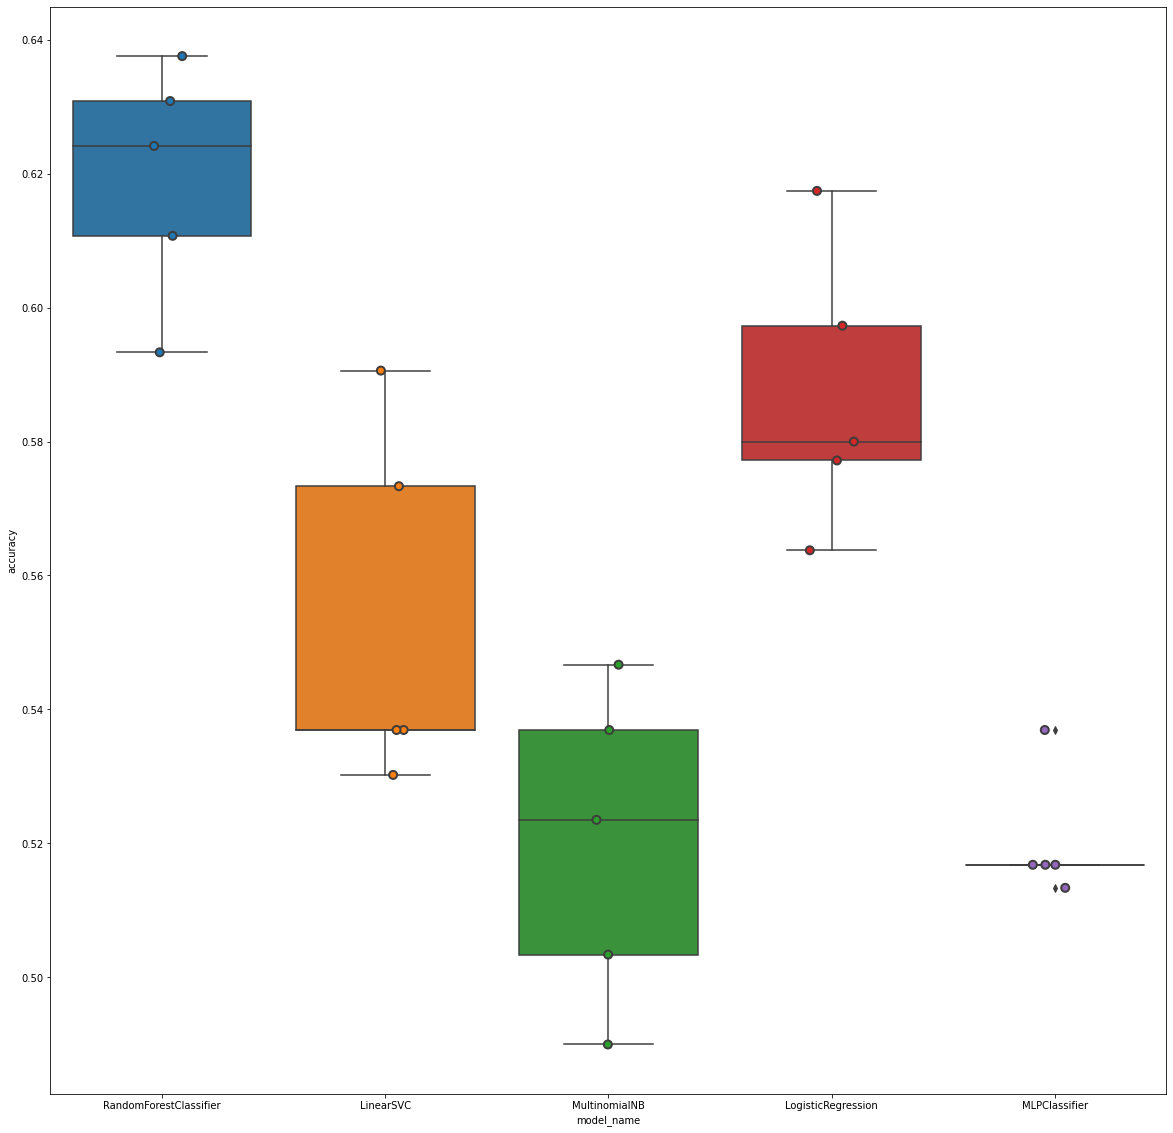

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(class_weight='balanced', random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0), MLPClassifier(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, c_matrix, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.553593
LogisticRegression        0.587141
MLPClassifier             0.520116
MultinomialNB             0.520072
RandomForestClassifier    0.619338
Name: accuracy, dtype: float64

## Vectorization using TF-IDF method

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TODO
# tfidf_vectorizer = 
# tfidf_matrix = 
# ...

# define the vectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None,
    min_df=2)

# display the configuration of the vectorizer
print (tfidf_vectorizer)

TfidfVectorizer(min_df=2, preprocessor=<function dummy_fun at 0x7fdb872bda70>,
                token_pattern=None,
                tokenizer=<function dummy_fun at 0x7fdb872bda70>)


1) On raw text

In [ ]:
# perform the vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(tokens_list)
print ('Matrix dimensions:', tfidf_matrix.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

Matrix dimensions: (746, 10396)
Vocabulary size: 10396


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,,!,"""",#,%,',(,),*,...,œuvre,œuvres,–,—,‘,’,“,”,•,…
0,0.0,0.000000,0.030400,0.085913,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.070450,0.326336,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.044447,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.037235,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.058832,0.009084,0.462103,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.135735,0.041917,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.0,0.035217,0.015536,0.000000,0.0,0.0,0.000000,0.021777,0.021864,0.000000,...,0.01835,0.020647,0.0,0.136662,0.0,0.000000,0.0,0.0,0.0,0.0
742,0.0,0.040771,0.173121,0.652344,0.0,0.0,0.020912,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
743,0.0,0.007907,0.045786,0.000000,0.0,0.0,0.000000,0.068455,0.085914,0.029594,...,0.00000,0.000000,0.0,0.209686,0.0,0.000000,0.0,0.0,0.0,0.0
744,0.0,0.009742,0.037604,0.000000,0.0,0.0,0.000000,0.021083,0.021168,0.000000,...,0.00000,0.000000,0.0,0.012601,0.0,0.013218,0.0,0.0,0.0,0.0


In [ ]:
corpus_df = pd.DataFrame({'Texts': tokens_list, 'Category': labels})

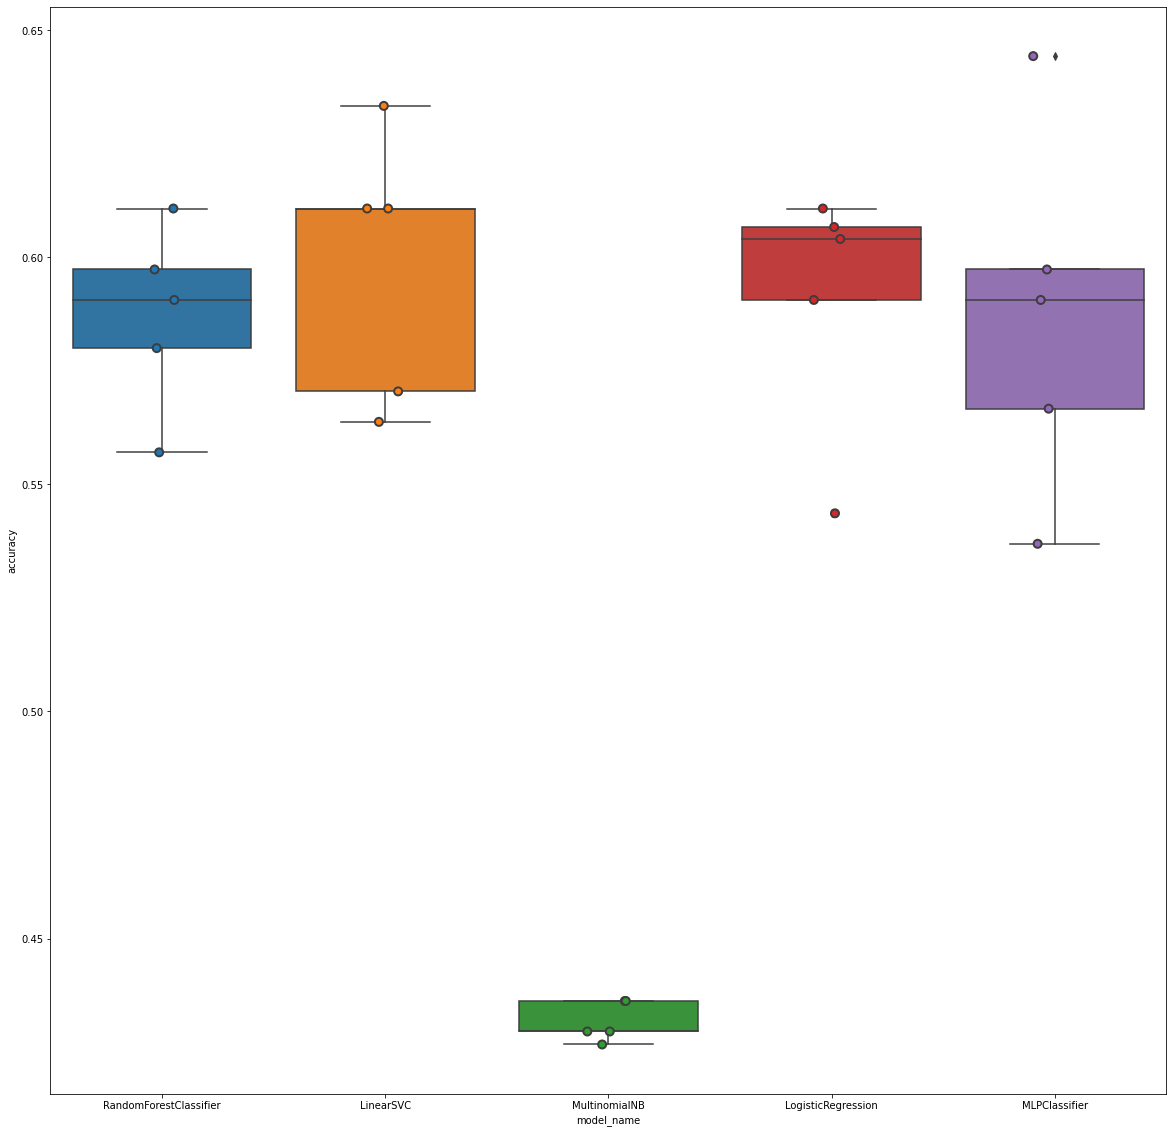

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(class_weight='balanced', random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0), MLPClassifier(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

  
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



import seaborn as sns
plt.figure(figsize=(20, 20))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.597808
LogisticRegression        0.591132
MLPClassifier             0.587159
MultinomialNB             0.431642
RandomForestClassifier    0.587141
Name: accuracy, dtype: float64

cross_val_scores=   0.597807606263982


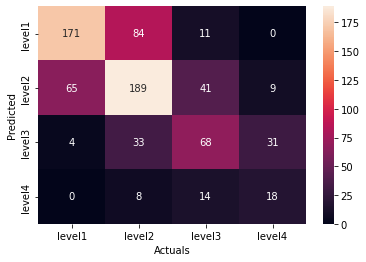

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = LinearSVC(random_state=0,class_weight='balanced')
x = tfidf_matrix
y = labels
cvs=cross_val_score(model,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(model,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=levels, yticklabels=levels)
plt.ylabel('Predicted')
plt.xlabel('Actuals')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y, y_pred, target_names=levels))

              precision    recall  f1-score   support

      level1       0.64      0.71      0.68       240
      level2       0.62      0.60      0.61       314
      level3       0.50      0.51      0.50       134
      level4       0.45      0.31      0.37        58

    accuracy                           0.60       746
   macro avg       0.55      0.53      0.54       746
weighted avg       0.59      0.60      0.59       746



2) On Raw expanded text

In [ ]:
# perform the vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(tokens_split_list)
print ('Matrix dimensions:', tfidf_matrix.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

Matrix dimensions: (2060, 11680)
Vocabulary size: 11680


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,,!,"""",#,%,',(,),*,...,œuvres,–,—,‘,’,“,”,•,…,▸
0,0.0,0.000000,0.030500,0.073514,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.082021,0.326017,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.045181,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.032456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.072399,0.009592,0.416171,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.157747,0.041801,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,0.0,0.029782,0.000000,0.427997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,0.0,0.000000,0.000000,0.173954,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2057,0.0,0.000000,0.000000,0.376405,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2058,0.0,0.027858,0.018455,0.355855,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
corpus_df = pd.DataFrame({'Texts': tokens_split_list, 'Category': labels_split})

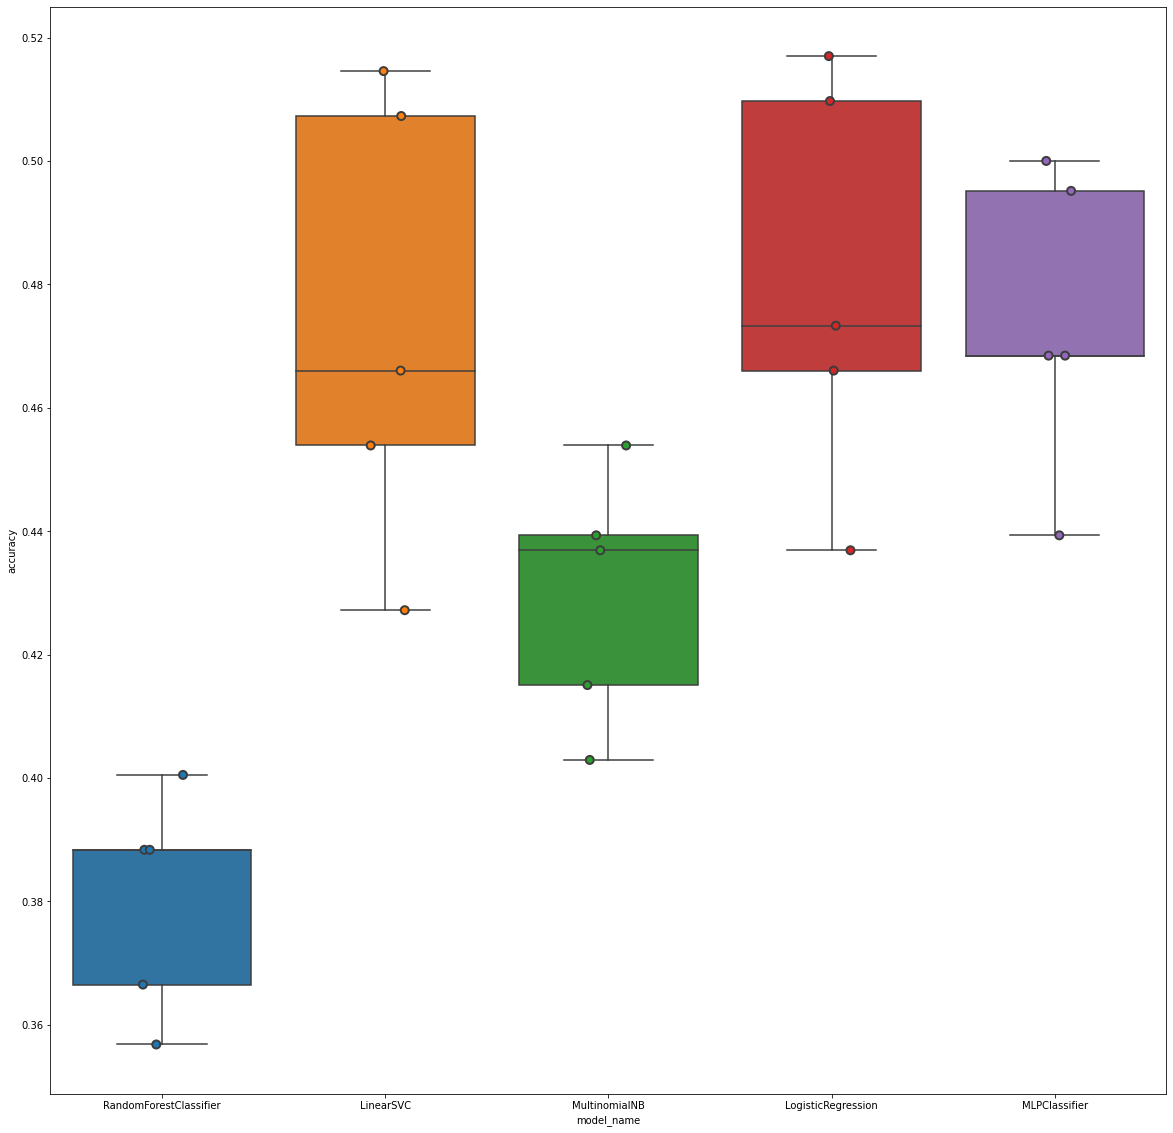

<Figure size 720x720 with 0 Axes>

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(class_weight='balanced', random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0), MLPClassifier(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix, labels_split, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.figure(figsize=(10, 10))
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.473786
LogisticRegression        0.480583
MLPClassifier             0.474272
MultinomialNB             0.429612
RandomForestClassifier    0.380097
Name: accuracy, dtype: float64

2)1) Evaluating LinearSVC on Raw expanded text

cross_val_scores=   0.47378640776699027


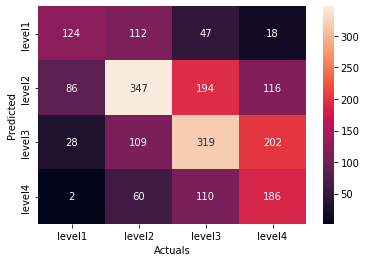

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = LinearSVC(random_state=0,class_weight='balanced')
x = tfidf_matrix
y = labels_split
cvs=cross_val_score(model,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(model,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=levels, yticklabels=levels)
plt.ylabel('Predicted')
plt.xlabel('Actuals')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y, y_pred, target_names=levels))

              precision    recall  f1-score   support

      level1       0.41      0.52      0.46       240
      level2       0.47      0.55      0.51       628
      level3       0.48      0.48      0.48       670
      level4       0.52      0.36      0.42       522

    accuracy                           0.47      2060
   macro avg       0.47      0.48      0.47      2060
weighted avg       0.48      0.47      0.47      2060



2)2) EValuating MLPClassifier on Raw expanded text 

cross_val_scores=   0.4810679611650485


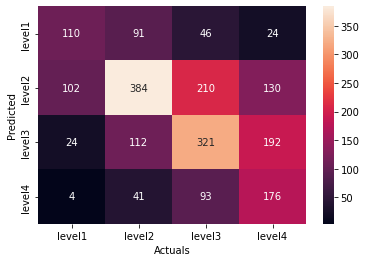

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = MLPClassifier(random_state=0)
x = tfidf_matrix
y = labels_split
cvs=cross_val_score(model,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(model,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=levels, yticklabels=levels)
plt.ylabel('Predicted')
plt.xlabel('Actuals')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y, y_pred, target_names=levels))

              precision    recall  f1-score   support

      level1       0.41      0.46      0.43       240
      level2       0.46      0.61      0.53       628
      level3       0.49      0.48      0.49       670
      level4       0.56      0.34      0.42       522

    accuracy                           0.48      2060
   macro avg       0.48      0.47      0.47      2060
weighted avg       0.49      0.48      0.48      2060



3) On Normalized text

In [ ]:
# perform the vectorization
tfidf_matrix_norm = tfidf_vectorizer.fit_transform(tokens_list_norm)
print ('Matrix dimensions:', tfidf_matrix_norm.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix_norm.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())



Matrix dimensions: (734, 9066)
Vocabulary size: 9066


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,!,",",-,-ce,-il,-t,-tu,.,...,...,être,êtres,île,îles,œil,œuf,œufs,œuvre,œuvres,—
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.037286,0.0,0.0,0.0,0.0,0.0,0.0,0.034154,0.038442,0.0
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028740,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015960,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
corpus_df = pd.DataFrame({'Texts': tokens_list_norm, 'Category': labels_norm})

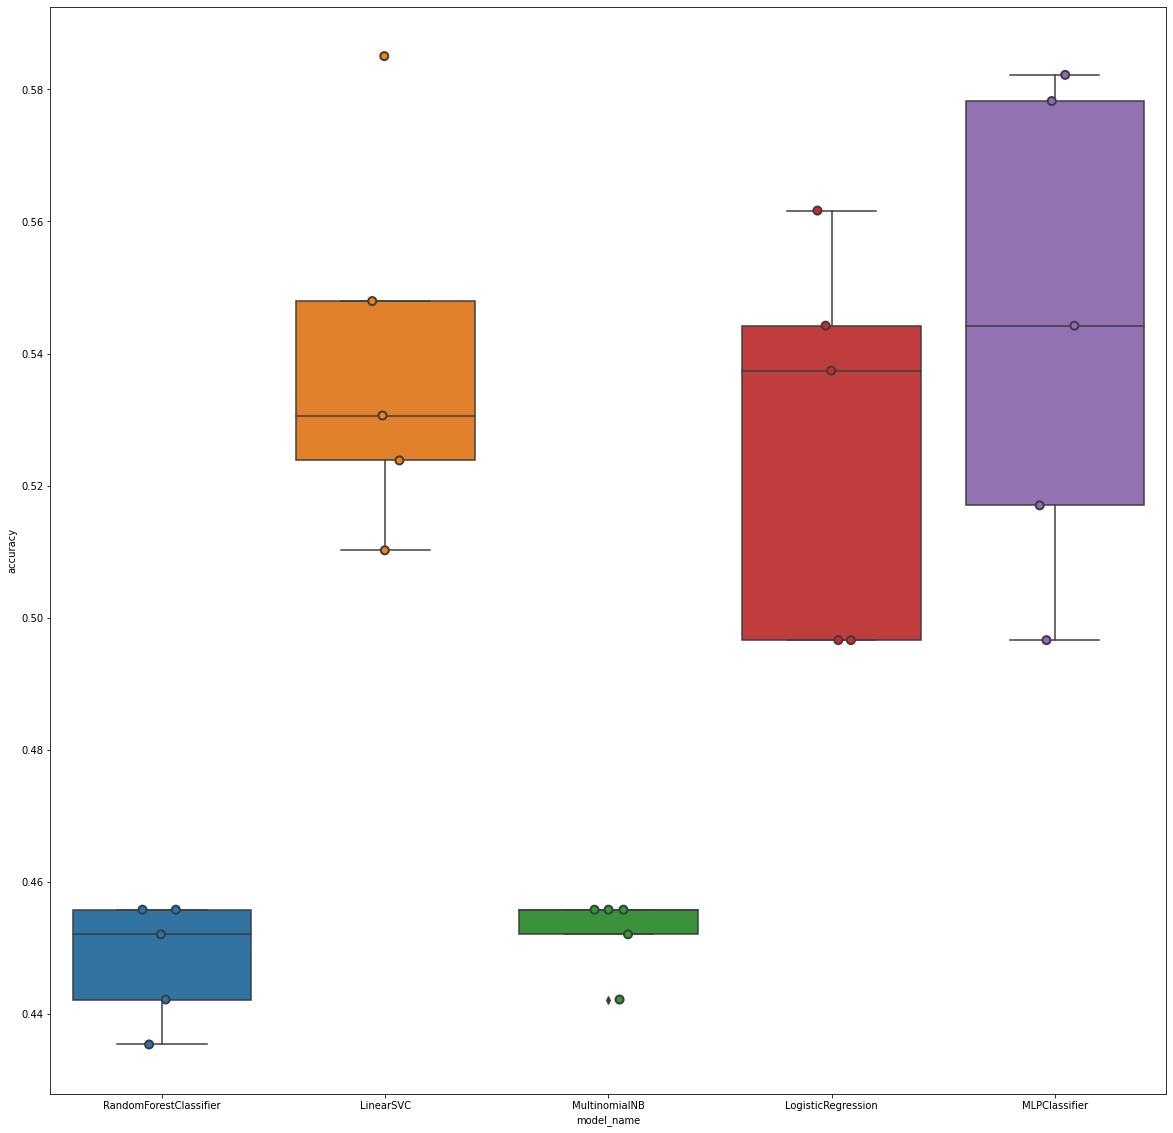

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(class_weight='balanced', random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0), MLPClassifier(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix_norm, labels_norm, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.539521
LogisticRegression        0.527295
MLPClassifier             0.543649
MultinomialNB             0.452316
RandomForestClassifier    0.448234
Name: accuracy, dtype: float64

4) Normalized text + expanded level 3 and 4

In [ ]:
# perform the vectorization
tfidf_matrix_norm = tfidf_vectorizer.fit_transform(tokens_list_norm_expanded)
print ('Matrix dimensions:', tfidf_matrix_norm.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix_norm.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())



Matrix dimensions: (926, 9218)
Vocabulary size: 9218


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,!,",",-,-ce,-il,-t,-tu,.,...,...,êtres,île,îles,îlot,œil,œuf,œufs,œuvre,œuvres,—
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049872,0.0,0.0,0.0,0.0,0.0
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
corpus_df = pd.DataFrame({'Texts': tokens_list_norm_expanded, 'Category': labels_norm_expanded})

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(class_weight='balanced', random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0), MLPClassifier(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix_norm, labels_norm_expanded, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

4)1) Evaluating LinearSVC on normalized expanded text

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = LinearSVC(random_state=0,class_weight='balanced')
x = tfidf_matrix_norm
y = labels_norm_expanded
cvs=cross_val_score(model,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(model,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=levels, yticklabels=levels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y, y_pred, target_names=levels))

4)2) Evaluating MLPClassifier on normalized expanded texts

In [ ]:
model = MLPClassifier(random_state=0)
x = tfidf_matrix_norm
y = labels_norm_expanded
cvs=cross_val_score(model,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(model,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=levels, yticklabels=levels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y, y_pred, target_names=levels))

### These next models take alot of time to train ( We will keep only linearSVC for the test)

5) Raw sentence level

In [ ]:
# perform the vectorization
tfidf_matrix_sents = tfidf_vectorizer.fit_transform(data_sentences)
print ('Matrix dimensions:', tfidf_matrix_sents.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix_sents.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(class_weight='balanced', random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0), MLPClassifier(random_state=0)
    ]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix_sents, labels_sentences, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.figure(figsize=(10, 10))
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

6) Normalized sentence level

In [ ]:
# perform the vectorization
tfidf_matrix_sents_norm = tfidf_vectorizer.fit_transform(data_sentences_norm)
print ('Matrix dimensions:', tfidf_matrix_sents_norm.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix_sents_norm.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(class_weight='balanced', random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0), MLPClassifier(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix_sents_norm, labels_sentences_norm, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

7) Raw text unit (60 words)

In [ ]:
# perform the vectorization
tfidf_matrix_unit = tfidf_vectorizer.fit_transform(data_seg)
print ('Matrix dimensions:', tfidf_matrix_unit.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix_unit.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
models = [

    LinearSVC(class_weight='balanced', random_state=0),
    MLPClassifier(random_state=0)

]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix_unit, labels_seg, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

8) Normalized Text unit (60 words)

In [ ]:
# perform the vectorization
tfidf_matrix_unit_norm = tfidf_vectorizer.fit_transform(data_seg_norm)
print ('Matrix dimensions:', tfidf_matrix_unit_norm.get_shape())

# get all unique words in the corpus (the vocabulary and also the names of the matrix columns/features)
vocabu = tfidf_vectorizer.get_feature_names()
print ('Vocabulary size:', len(vocabu))

# show document-term matrix
tfidf_matrix = tfidf_matrix_unit_norm.toarray()
pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
models = [

    LinearSVC(class_weight='balanced', random_state=0),

    MLPClassifier(random_state=0)
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_matrix_unit_norm, labels_seg_norm, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)


plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

# Implementing fine tuning of a pre-trained model (Camembert)

In [ ]:
# require running import in first cell ?
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" #Enable more detailed error messages
!pip install sentencepiece
!pip install transformers
!pip install datasets

from transformers import CamembertModel, CamembertTokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

Preparing the data : converting from a dictionnary structure to a format accepted by BERT models

In [ ]:
import math
import pickle
def tokenize_function(text):
    return tokenizer(text, padding="max_length", truncation=True)

with open('tokens_split.pkl', 'rb') as file: 
#with open('bibebook.sm.pkl', 'rb') as file:
#with open('JeLisLibre.pkl', 'rb') as file: 
#with open('JeLisLibre_md.pkl', 'rb') as file: 
#with open('JeLisLibre_sm.pkl', 'rb') as file: 
  dataset = pickle.load(file)

n_fold = 5 # 10

n_epochs = 5
#^ these are the parameters needed for now

n_labels = len(dataset.keys())
test_dataset = list()
train_dataset = []
for i in range(0,n_fold):
  train_dataset.append([])

for key in dataset.keys():
  cpt = 0
  fold_bins = [math.floor(len(dataset[key])*(1/n_fold))]
  for i in range(1,n_fold):
#    fold_bins.append(math.floor(len(dataset[key])*round((1/n_fold) + ((1-(1/n_fold))/5)*i,2)))
     fold_bins.append(math.floor(len(dataset[key])*round((1/n_fold) + ((1-(1/n_fold))/n_fold)*i,2)))

  for text in dataset[key]:
    doc = []
    for sent in text:
      doc.append(' '.join(sent))
    doc = ' '.join(doc)
    #WARNING : ^starting from "doc = []", this converts a list of tokens to a list of sentences before converting that to a string representating a text.
    #Later, we can probably add a parameter called (scale=tokens|sentences|text) and take into account different formats

    #This is a one-fit-all solution for mapping labels to 0..n :
    temp = {"label": list(dataset.keys()).index(key), "text": doc}

    #Splitting based on folds :
    temp_copy = temp.copy()
    temp_copy['input_ids'] = tokenize_function(temp_copy['text']).get('input_ids')
    if cpt < fold_bins[0]:
      test_dataset.append(temp_copy)
    else:
      flag = False
      for prev_index,bin in enumerate(fold_bins[1:]):
        if fold_bins[prev_index] <= cpt < bin:
          train_dataset[prev_index].append(temp_copy)
          flag = True
      if not flag:
        train_dataset[-1].append(temp_copy)
        flag = False
    cpt += 1


Exploration to understand the content of the folds

* train_dataset_cross[0] is empty
* train_dataset_cross[4]] is mucher larger than the others...

In [ ]:
# le fold 0
labels = [e['label'] for e in test_dataset]
print (test_dataset[:2])
print (labels)


#print (train_dataset[:2])
print (len(train_dataset))
print (len(train_dataset[0]), train_dataset[0])

#print (len(train_dataset[1]), train_dataset[1][:2])
print ([e['label'] for e in train_dataset[1]])

#print (len(train_dataset[2]), train_dataset[2][:2])
print ([e['label'] for e in train_dataset[2]])

#print (len(train_dataset[3]), train_dataset[3][:2])
print ([e['label'] for e in train_dataset[3]])

#print (len(train_dataset[4]), train_dataset[4][:2])
print ([e['label'] for e in train_dataset[4]])

#print (train_dataset[3])


new_dataset = train_dataset
new_dataset.append(test_dataset)
print (len(new_dataset))
from itertools import chain, islice

#Starting the training loop
for k in range(len(train_dataset)):
  print ('k:',k)
  print (len(list(islice(train_dataset, k))),list(islice(train_dataset, k))[:1] )
  print (len(list(islice(train_dataset, k+1, None))), list(islice(train_dataset, k+1, None))[:1])
  print (len(list(chain(islice(train_dataset, k), islice(train_dataset, k+1, None)))), list(chain(islice(train_dataset, k), islice(train_dataset, k+1, None)))[:1])
  print()
  current_train = list(chain.from_iterable(chain(islice(train_dataset, k), islice(train_dataset, k+1, None))))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[{'label': 0, 'text': "Tu en as assez de vivre dans l' antiquité grecque et romaine   Ici même les automobiles ont l' air d' être anciennes La religion seule est restée toute neuve la religion Est restée simple comme les hangars de Port - Aviation   Seul en Europe tu n' es pas antique ô Christianisme L' Européen le plus moderne c' est vous Pape Pie X Et toi que les fenêtres observent la honte", 'input_ids': [5, 659, 22, 33, 10, 424, 8, 747, 29, 17, 11, 21, 20563, 9815, 14, 12475, 2901, 93, 19, 15328, 96, 17, 11, 1810, 18, 11, 98, 4530, 61, 3065, 598, 30, 9343, 194, 8665, 13, 3065, 1196, 9343, 445, 79, 19, 23395, 10, 8, 3365, 67, 21, 30809, 6921, 22, 1532, 150, 49, 11, 1252, 34, 9488, 12283, 4012, 884, 71, 11, 16837, 16, 40, 1558, 60, 11, 30, 39, 10227, 16388, 1001, 139, 638, 27, 19, 5861, 7528, 113, 13, 6153, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Splitting the dataset into two was an idea to help dissociate between the 'level_3' and 'level_4' label, but it backfired.  
'level_4' texts were now recognized as 'level_2' sometime, resulting in a loss of accuracy.

In [ ]:
"""
import math

def tokenize_function(text):
    return tokenizer(text, padding="max_length", truncation=True)

dataset = tokens_norm
n_fold = 5
#^ these are the parameters needed for now
n_labels = len(dataset.keys())
train_dataset_cross = [[]] * n_fold
test_dataset_cross = list()


train_dataset_cross = [[]] * n_fold
test_dataset_cross = list()

for level in levels:
  cpt = 0
  for text in tokens_norm[level]:
    if level != 'level4':
      doc = []
      for sent in text:
        doc.append(' '.join(sent))
      doc = ' '.join(doc)
      temp = {"label": int(level[-1])-1, "text": doc}
      temp_copy = temp.copy()
      temp_copy['input_ids'] = tokenize_function(temp_copy['text']).get('input_ids')
      if cpt < math.floor(len(tokens[level])*0.2):
        test_dataset_cross.append(temp_copy)
      elif cpt < math.floor(len(tokens[level])*0.36):
        train_dataset_cross[0].append(temp_copy)
      elif cpt < math.floor(len(tokens[level])*0.52):
        train_dataset_cross[1].append(temp_copy)
      elif cpt < math.floor(len(tokens[level])*0.68):
        train_dataset_cross[2].append(temp_copy)
      elif cpt < math.floor(len(tokens[level])*0.84):
        train_dataset_cross[3].append(temp_copy)
      else:
        train_dataset_cross[4].append(temp_copy)
    else:
      doc = []
      doc2 = []
      for sent in text[:len(text)//2]:
        doc.append(' '.join(sent))
      doc = ' '.join(doc)
      for sent in text[len(text)//2:]:
        doc2.append(' '.join(sent))
      doc2 = ' '.join(doc2)
      temp = {"label": int(level[-1])-1, "text": doc}
      temp2 = {"label": int(level[-1])-1, "text": doc2}
      temp_copy = temp.copy()
      temp_copy2 = temp2.copy()
      temp_copy['input_ids'] = tokenize_function(temp_copy['text']).get('input_ids')
      temp_copy2['input_ids'] = tokenize_function(temp_copy2['text']).get('input_ids')
      if cpt < math.floor(len(tokens[level])*0.2):
        test_dataset_cross.append(temp_copy)
        test_dataset_cross.append(temp_copy2)
      elif cpt < math.floor(len(tokens[level])*0.36):
        train_dataset_cross[0].append(temp_copy)
        train_dataset_cross[0].append(temp_copy2)
      elif cpt < math.floor(len(tokens[level])*0.52):
        train_dataset_cross[1].append(temp_copy)
        train_dataset_cross[1].append(temp_copy2)
      elif cpt < math.floor(len(tokens[level])*0.68):
        train_dataset_cross[2].append(temp_copy)
        train_dataset_cross[2].append(temp_copy2)
      elif cpt < math.floor(len(tokens[level])*0.84):
        train_dataset_cross[3].append(temp_copy)
        train_dataset_cross[3].append(temp_copy2)
      else:
        train_dataset_cross[4].append(temp_copy)
        train_dataset_cross[4].append(temp_copy2)
    cpt += 1
"""

#a) Using default parameters

In [ ]:
# Configuration :
# Model import :
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)

# Training hyperparameters (small batch size to avoid a GPU bottleneck on Colab)
from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer", per_device_train_batch_size=8, num_train_epochs = n_epochs, evaluation_strategy = 'epoch')

# Metrics
import numpy as np
from datasets import load_metric
metric = load_metric("accuracy", "f1")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

###Training loop

In [ ]:
import numpy as np
from itertools import chain, islice
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions_list = list()
conf_mat_list = list()

#Starting the training loop
for k in range(len(train_dataset)):
  model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)
  current_train = list(chain.from_iterable(chain(islice(train_dataset, k), islice(train_dataset, k+1, None))))
  from transformers import Trainer
  trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=current_train,
      eval_dataset=train_dataset[k],
      compute_metrics=compute_metrics,
  )
  trainer.train()

  #Prepare metrics
  predictions = trainer.predict(train_dataset[k])
  predictions_list.append(predictions)
  preds = np.argmax(predictions.predictions, axis=-1)

  #Prepare graphs
  conf_mat = confusion_matrix(predictions.label_ids, preds)
  conf_mat_list.append(conf_mat)

Metrics output

In [ ]:
temp = list()
for predictions in predictions_list:
  pred_metric = load_metric("accuracy", "f1")
  preds = np.argmax(predictions.predictions, axis=-1)
  print(pred_metric.compute(predictions=preds, references=predictions.label_ids))
  temp.append(pred_metric.compute(predictions=preds, references=predictions.label_ids)['accuracy'])

print("Average accuracy of models : ", sum(temp)/len(temp))

print("Standard deviation of accuracy : ", math.sqrt(sum([(x - sum(temp)/len(temp)) * x for x in temp]) / len(temp)))

Visualisation of accuracy

In [ ]:
for conf_mat in conf_mat_list:
  sns.heatmap(conf_mat, annot=True, fmt='d',
              xticklabels=list(dataset.keys()), yticklabels=list(dataset.keys())s)

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  print(load_metric("accuracy","f1").compute(predictions=np.argmax(predictions_list[index].predictions, axis=-1), references=predictions_list[index].label_ids)['accuracy'])

  summed_conf_mat = np.sum(conf_mat_list,axis=0)
for index,key in dataset.keys():
  f_score = summed_conf_mat[index][index] / (summed_conf_mat[index][index] + 0.5 * (sum(np.delete(summed_conf_mat[index],index)) +  sum(np.delete(list(list(zip(*summed_conf_mat))[index]),index)) ))
  f_score_list.append(f_score)
print("Macro f-score:", (sum(f_score_list)) / n_labels)

micro_pred = sum(summed_conf_mat.diagonal()) / sum(sum(summed_conf_mat))
micro_fscore = 1/(2 * 1/(micro_pred)) #We can do that since micro_rec = micro_pred
print("Micro f-score:", micro_fscore)

###Training full model

In [ ]:
#Creating the Trainer instance
full_train = [j for i in train_dataset for j in i]
model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)
from transformers import Trainer
trainer_full = Trainer(
    model=model,
    args=training_args,
    train_dataset=full_train,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)
trainer_full.train()

#Prepare metrics
predictions = trainer_full.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)
print(pred_metric.compute(predictions=preds, references=predictions.label_ids))

#Prepare graphs
true_labels = predictions.label_ids

conf_mat = confusion_matrix(true_labels, preds)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=list(dataset.keys()), yticklabels=list(dataset.keys()))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
trainer_full.save_model("save_full_default_folder")
#saved_model = AutoModelForSequenceClassification.from_pretrained("save_full_default_folder",local_files_only=True)

#b) Fine-tuning & weighted labels

In [ ]:
# Model import :
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)

# Training hyperparameters : 
from transformers import TrainingArguments

#Default weight decay is 0. testing with 10^-5 to avoid some overfitting
training_args = TrainingArguments(
    # https://medium.com/nlplanet/bert-finetuning-with-hugging-face-and-training-visualizations-with-tensorboard-46368a57fc97
    output_dir="test_trainer", 
    # per_device_train_batch_size: The batch size per GPU/TPU core/CPU for training.    
    per_device_train_batch_size=8, 
    # num_train_epochs (default 3.0): Total number of training epochs to perform
    # (if not an integer, will perform the decimal part percents of the last epoch
    # before stopping training).
    num_train_epochs = n_epochs, 
    weight_decay = 10 ** - 5, 
    evaluation_strategy = 'epoch')
    # learning_rate (default 5e-5): The initial learning rate for AdamW optimizer.
    # Adam algorithm with weight decay fix as introduced in the paper
    # Decoupled Weight Decay Regularization.
    #learning_rate=2e-5,
# Metrics
import numpy as np

from datasets import load_metric

metric = load_metric("accuracy", "f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def compute_metrics_APRF(p):
    logits, labels = p
    pred = np.argmax(logits, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


###Training loop

In [ ]:
import numpy as np
from itertools import chain, islice
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
from torch import nn
from transformers import Trainer
predictions_list = list()
conf_mat_list = list()

#Modifying the Trainer instance to compute a custom loss function, giving more weight to under-representated levels
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0]*n_labels).to('cuda:0'))
        #^ WARNING : please change these values according to the dataset's distribution.
        #Starting to think giving them a "normal" value of 1.0 for each actually
        #causes bugs...
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

#Starting the training loop
for k in range(len(train_dataset)):
  current_train = list(chain.from_iterable(chain(islice(train_dataset, k), islice(train_dataset, k+1, None))))
  #print ('k:', k)
  #print ('len(current_train):', len(current_train), 'current_train[:2]:', current_train[:2])
  #labels_0 = len([e['label'] for e in train_dataset[k] if e['label'] == 0])
  #labels_1 = len([e['label'] for e in train_dataset[k] if e['label'] == 0])
  #labels_2 = len([e['label'] for e in train_dataset[k] if e['label'] == 0])
#  labels_3 = len([e['label'] for e in train_dataset[k] if e['label'] == 0])

  #print ('len(train_dataset[k]):', len(train_dataset[k]), 'labels_0:', labels_0, 'labels_1:', labels_1, 'labels_2:', labels_2, 'train_dataset[k][:2]:', train_dataset[k][:2])
  #print ()

  #model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)
  model = AutoModelForSequenceClassification.from_pretrained("save_full_cross_folder",local_files_only=True)
  trainer = CustomTrainer(
      model=model,
      args=training_args,
      train_dataset=current_train,
      eval_dataset=train_dataset[k],
      compute_metrics=compute_metrics,
  )
  #trainer.train()

  #Prepare metrics
  predictions = trainer.predict(train_dataset[k]) 
  #predictions = trainer.predict(test_dataset) #validation_dataset 

  predictions_list.append(predictions)
  preds = np.argmax(predictions.predictions, axis=-1)

  #Prepare graphs
  true_labels = predictions.label_ids
  
  conf_mat = confusion_matrix(true_labels, preds)
  conf_mat_list.append(conf_mat)


loading configuration file save_full_cross_folder/config.json
Model config CamembertConfig {
  "_name_or_path": "save_full_cross_folder",
  "architectures": [
    "CamembertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 5,
  "classifier_dropout": null,
  "eos_token_id": 6,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "camembert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_

loading configuration file save_full_cross_folder/config.json
Model config CamembertConfig {
  "_name_or_path": "save_full_cross_folder",
  "architectures": [
    "CamembertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 5,
  "classifier_dropout": null,
  "eos_token_id": 6,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "camembert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_

loading configuration file save_full_cross_folder/config.json
Model config CamembertConfig {
  "_name_or_path": "save_full_cross_folder",
  "architectures": [
    "CamembertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 5,
  "classifier_dropout": null,
  "eos_token_id": 6,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "camembert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_

loading configuration file save_full_cross_folder/config.json
Model config CamembertConfig {
  "_name_or_path": "save_full_cross_folder",
  "architectures": [
    "CamembertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 5,
  "classifier_dropout": null,
  "eos_token_id": 6,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "camembert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_

loading configuration file save_full_cross_folder/config.json
Model config CamembertConfig {
  "_name_or_path": "save_full_cross_folder",
  "architectures": [
    "CamembertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 5,
  "classifier_dropout": null,
  "eos_token_id": 6,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "camembert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_

Alternative training loop

In [ ]:
import numpy as np
import random
from itertools import chain, islice
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
from torch import nn
from transformers import Trainer
predictions_list = list()

conf_mat_list = list()

#Modifying the Trainer instance to compute a custom loss function, giving more weight to under-representated levels
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0]*n_labels).to('cuda:0'))
        #^ WARNING : please change these values according to the dataset's distribution. 
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

#Starting the training loop
for k in range(n_fold):
  shuffled_datasets = datasets
  random.seed(k)
  random.shuffle(shuffled_datasets)
  train, validate, test = np.split(shuffled_datasets, [int(.6*len(shuffled_datasets)), int(.8*len(shuffled_datasets))])

  #print ('len(train_dataset[k]):', len(train_dataset[k]), 'labels_0:', labels_0, 'labels_1:', labels_1, 'labels_2:', labels_2, 'train_dataset[k][:2]:', train_dataset[k][:2])
  #print ()

  model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)
  trainer = CustomTrainer(
      model=model,
      args=training_args,
      train_dataset=train,
      eval_dataset=validate,
      compute_metrics=compute_metrics,
  )
  trainer.train()

  #Prepare metrics
  predictions = trainer.predict(test) 

  predictions_list.append(predictions)
  preds = np.argmax(predictions.predictions, axis=-1)

  #Prepare graphs
  true_labels = predictions.label_ids
  
  conf_mat = confusion_matrix(true_labels, preds)
  conf_mat_list.append(conf_mat)
  
  break

backup predictions for future observations

In [ ]:
# backup
predictions_list_ljl = predictions_list

with open('predictions_list_ljl.pkl','wb') as file:
  pickle.dump(predictions_list_ljl, file)

In [ ]:
# backup
predictions_list_jll = predictions_list

with open('predictions_list_jll_5f_5e.pkl','wb') as file:
  pickle.dump(predictions_list_jll, file)

In [ ]:
# backup
predictions_list_bb = predictions_list

with open('predictions_list_bb.pkl','wb') as file:
  pickle.dump(predictions_list_bb, file)

Metrics output

In [ ]:
#Show metrics
temp = list()
for predictions in predictions_list:
  pred_metric = load_metric("accuracy", "f1")
  preds = np.argmax(predictions.predictions, axis=-1)
  #print ('preds:', preds)
  print('predictions.predictions:', predictions.predictions)
  print(pred_metric.compute(predictions=preds, references=predictions.label_ids))
  temp.append(pred_metric.compute(predictions=preds, references=predictions.label_ids)['accuracy'])

print("Average accuracy of models : ", sum(temp)/len(temp))

print("Standard deviation of accuracy : ", math.sqrt(sum([(x - sum(temp)/len(temp)) * x for x in temp]) / len(temp)))

predictions.predictions: [[ 1.6447703  1.2512273 -1.0313076 -1.9740559]
 [ 1.5514729  1.3345426 -1.0296432 -2.0024393]
 [ 1.612406   1.2974992 -1.0383091 -2.0022805]
 ...
 [ 1.6500746  1.2417076 -1.0440744 -1.9714073]
 [ 1.6440125  1.2585343 -1.0440443 -1.9759412]
 [ 1.6260924  1.2742952 -1.0413005 -1.9854366]]
{'accuracy': 0.12462006079027356}
predictions.predictions: [[ 1.5534279   1.3450993  -1.0345824  -2.0064392 ]
 [ 1.5497302   1.3539282  -1.0284959  -2.0196679 ]
 [ 1.6348221   1.278515   -1.0427542  -1.9891905 ]
 ...
 [ 1.4855391   1.4227899  -1.0201199  -2.048222  ]
 [ 1.5926495   1.3197368  -1.0371883  -2.0094352 ]
 [ 1.2396946   1.600942   -0.96768886 -2.0448556 ]]
{'accuracy': 0.11854103343465046}
predictions.predictions: [[ 1.7362622   0.9598726  -0.93494314 -1.7279162 ]
 [ 1.6420693   1.2579149  -1.0440893  -1.9778277 ]
 [ 1.5975845   1.3062367  -1.040649   -2.006697  ]
 ...
 [ 1.647792    1.2534292  -1.041436   -1.974693  ]
 [ 1.666295    1.2350676  -1.0465497  -1.9710374

Visualisation of accuracy

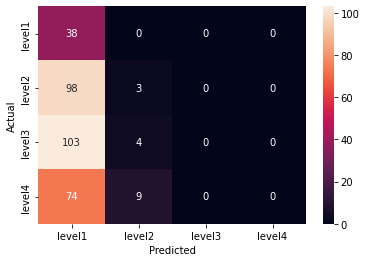

0.12462006079027356


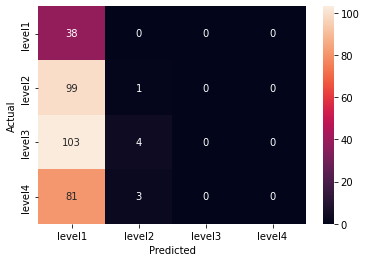

0.11854103343465046


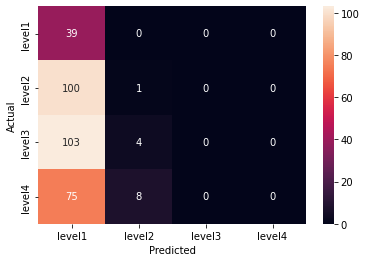

0.12121212121212122


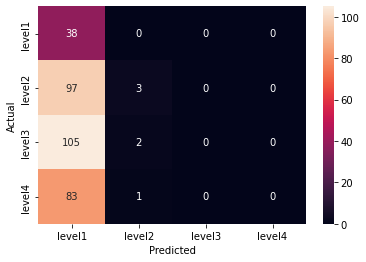

0.12462006079027356


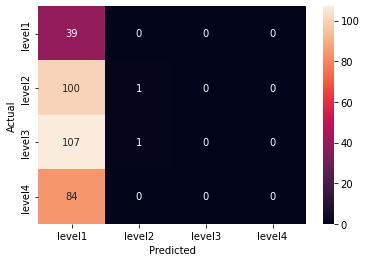

0.12048192771084337
Precision level1 : 1.0
Recall level1 : 0.11970074812967581
F-score level1 : 0.21380846325167038
Precision level2 : 0.017892644135188866
Recall level2 : 0.2
F-score level2 : 0.032846715328467155
Precision level3 : 0.0
Recall level3 : nan
F-score level3 : 0.0
Precision level4 : 0.0
Recall level4 : nan
F-score level4 : 0.0
Macro f-score: 0.06166379464503438
Micro f-score: 0.06094602789569436


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
import matplotlib.pyplot as plt

#Show graphs
f_score_list = list()
for index,conf_mat in enumerate(conf_mat_list):
  sns.heatmap(conf_mat, annot=True, fmt='d',
              xticklabels=list(dataset.keys()), yticklabels=list(dataset.keys()))
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  print(load_metric("accuracy","f1").compute(predictions=np.argmax(predictions_list[index].predictions, axis=-1), references=predictions_list[index].label_ids)['accuracy'])

summed_conf_mat = np.sum(conf_mat_list,axis=0)
for index,key in enumerate(dataset.keys()):
  f_score = summed_conf_mat[index][index] / (summed_conf_mat[index][index] + 0.5 * (sum(np.delete(summed_conf_mat[index],index)) +  sum(np.delete(list(list(zip(*summed_conf_mat))[index]),index)) ))
  print("Precision", key, ":", summed_conf_mat[index][index] / sum(summed_conf_mat[index]))
  print("Recall", key, ":", summed_conf_mat[index][index] / sum(list(list(zip(*summed_conf_mat))[index])))
  print("F-score", key, ":", f_score)
  f_score_list.append(f_score)
print("Macro f-score:", (sum(f_score_list)) / n_labels)

micro_pred = sum(summed_conf_mat.diagonal()) / sum(sum(summed_conf_mat))
micro_fscore = 1/(2 * 1/(micro_pred)) #We can do that since micro_rec = micro_pred
print("Micro f-score:", micro_fscore)

ljl 5 5

* Average accuracy of models :  0.4032376979595641
* Standard deviation of accuracy :  0.06443133993572868
* Macro f-score: 0.36782696858690134
* Micro f-score: 0.20163735597331717

jll 10 folds 5 epochs

{'accuracy': 0.41836734693877553}
{'accuracy': 0.29411764705882354}
{'accuracy': 0.7806122448979592}
{'accuracy': 0.8469387755102041}
{'accuracy': 0.2948717948717949}
{'accuracy': 0.75}
{'accuracy': 0.9617346938775511}
{'accuracy': 0.29411764705882354}
{'accuracy': 0.29591836734693877}
{'accuracy': 0.29949238578680204}
* Average accuracy of models :  0.5236170903347672
* Standard deviation of accuracy :  0.2616486531867714
* Macro f-score: 0.513853409582762
* Micro f-score: 0.26186830015313933


jll 5 folds 5 epochs

{'accuracy': 0.29454022988505746}
{'accuracy': 0.7255747126436781}
{'accuracy': 0.7543103448275862}
{'accuracy': 0.8189655172413793}
{'accuracy': 0.29512893982808025}
* Average accuracy of models :  0.5777039488851563
* Standard deviation of accuracy :  0.23293477787980946
* Macro f-score: 0.2984016524326197
* Micro f-score: 0.22844556324732535


bb 5 folds and 5 epochs

{'accuracy': 0.5487421383647799}
{'accuracy': 0.42992125984251967}
{'accuracy': 0.4346456692913386}
{'accuracy': 0.43622047244094486}
{'accuracy': 0.434850863422292}
* Average accuracy of models :  0.456876080672375
* Standard deviation of accuracy :  0.045982367182231185
* Macro f-score: 0.2984016524326197
* Micro f-score: 0.22844556324732535

bb 10 folds and 5 epochs
{'accuracy': 0.43575418994413406}
{'accuracy': 0.4369747899159664}
{'accuracy': 0.44537815126050423}
{'accuracy': 0.4301675977653631}
{'accuracy': 0.4341736694677871}
{'accuracy': 0.4369747899159664}
{'accuracy': 0.43575418994413406}
{'accuracy': 0.5378151260504201}
{'accuracy': 0.43575418994413406}
{'accuracy': 0.43575418994413406}
* Average accuracy of models :  0.4464500884152544
* Standard deviation of accuracy :  0.030662225384005634
* Macro f-score: 0.2984016524326197
* Micro f-score: 0.22844556324732535


###Training full model

In [ ]:
#Creating the Trainer instance
full_train = [j for i in train_dataset for j in i]
model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)
from transformers import Trainer
trainer_full = Trainer(
    model=model,
    args=training_args,
    train_dataset=full_train,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)
trainer_full.train()

#Prepare metrics
predictions = trainer_full.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)
print(pred_metric.compute(predictions=preds, references=predictions.label_ids))

#Prepare graphs
true_labels = predictions.label_ids

conf_mat = confusion_matrix(true_labels, preds)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=list(dataset.keys()), yticklabels=list(dataset.keys()))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
#Save current model
trainer_full.save_model("save_full_weighted_folder")
#How to load :
#saved_model = AutoModelForSequenceClassification.from_pretrained("save_folder",local_files_only=True)
#from transformers import Trainer
#"""
#loaded_trainer = Trainer(
#    model=saved_model,
#    [...]
#)
#"""

# Implementing BERT fine tuning by NH

In [ ]:
# require running import in first cell ?
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" #Enable more detailed error messages
!pip install sentencepiece
!pip install transformers
!pip install datasets

from transformers import CamembertModel, CamembertTokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

## Preparing the data

In [ ]:
import math
import pickle
import re
ws_pattern = re.compile(r'\s+')

def tokenize_function(text):
    return tokenizer(text, padding="max_length", truncation=True)

#with open('JeLisLibre.pkl', 'rb') as file: 
#with open('bibebook.com.pkl', 'rb') as file: 
#with open('tokens_split.pkl', 'rb') as file: 
#with open('JeLisLibre_md.pkl', 'rb') as file: 
#with open('JeLisLibre_sm.pkl', 'rb') as file: 
with open('JeLisLibre4bert.pkl', 'rb') as file: 
  dataset = pickle.load(file)

n_fold = 5 # 10

n_epochs = 10
#^ these are the parameters needed for now

n_labels = len(dataset.keys())

datasets = list()
for key in dataset.keys():
  for text in dataset[key]:
    # if sentence are tokenized
    #doc = []
    #for sent in text:
    #  doc.append(' '.join(sent))
    #doc = ' '.join(doc)
    # if not
    doc = ' '.join(text)
    doc = doc.replace(' +', ' ')
    print (doc[:20])
    doc = re.sub(ws_pattern, ' ', doc)
    print (doc[:20])

    #WARNING : ^starting from "doc = []", this converts a list of tokens to a list of sentences before converting that to a string representating a text.
    #Later, we can probably add a parameter called (scale=tokens|sentences|text) and take into account different formats

    #This is a one-fit-all solution for mapping labels to 0..n :
    temp = {"label": list(dataset.keys()).index(key), "text": doc}

    #Splitting based on folds :
    temp_copy = temp.copy()
    temp_copy['input_ids'] = tokenize_function(temp_copy['text']).get('input_ids')
    datasets.append(temp_copy)

print (len(datasets), datasets[:2])
print ([e['label'] for e in datasets])


TypeError: ignored

## Data spliting (test)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
import numpy as np
import random
random.seed(2)
random.shuffle(datasets)
train, validate, test = np.split(datasets, [int(.6*len(datasets)), int(.8*len(datasets))])
print (int(.6*len(datasets)),  int(.8*len(datasets)))
print (len(train), train[:2])
print (len(validate), validate[:2])
print (len(test), test[:2])

for d in [train, validate, test]:
  labels = [e['label'] for e in d]
  labels_set = set(labels)
  for l in labels_set:
    print (l, labels.count(l))

## Training Arguments declaration

In [ ]:
# Model import :
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)

# Training hyperparameters : 
from transformers import TrainingArguments

#Default weight decay is 0. testing with 10^-5 to avoid some overfitting
training_args = TrainingArguments(
    # https://medium.com/nlplanet/bert-finetuning-with-hugging-face-and-training-visualizations-with-tensorboard-46368a57fc97
    output_dir="test_trainer", 
    # per_device_train_batch_size: The batch size per GPU/TPU core/CPU for training.    
    per_device_train_batch_size=8, 
    # num_train_epochs (default 3.0): Total number of training epochs to perform
    # (if not an integer, will perform the decimal part percents of the last epoch
    # before stopping training).
    num_train_epochs = n_epochs, 
    weight_decay = 10 ** - 5, 
    evaluation_strategy = 'epoch')
    # learning_rate (default 5e-5): The initial learning rate for AdamW optimizer.
    # Adam algorithm with weight decay fix as introduced in the paper
    # Decoupled Weight Decay Regularization.
    #learning_rate=2e-5,
# Metrics
import numpy as np

from datasets import load_metric

metric = load_metric("accuracy", "f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def compute_metrics_APRF(p):
    logits, labels = p
    pred = np.argmax(logits, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


## Training loop

In [ ]:
import numpy as np
import random
from itertools import chain, islice
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
from torch import nn
from transformers import Trainer
predictions_list = list()

conf_mat_list = list()

#Modifying the Trainer instance to compute a custom loss function, giving more weight to under-representated levels
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0]*n_labels).to('cuda:0'))
        #^ WARNING : please change these values according to the dataset's distribution. 
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

#Starting the training loop
for k in range(n_fold):
  shuffled_datasets = datasets
  random.seed(k)
  random.shuffle(shuffled_datasets)
  train, validate, test = np.split(shuffled_datasets, [int(.6*len(shuffled_datasets)), int(.8*len(shuffled_datasets))])

  #print ('len(train_dataset[k]):', len(train_dataset[k]), 'labels_0:', labels_0, 'labels_1:', labels_1, 'labels_2:', labels_2, 'train_dataset[k][:2]:', train_dataset[k][:2])
  #print ()

  model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=n_labels)
  trainer = CustomTrainer(
      model=model,
      args=training_args,
      train_dataset=train,
      eval_dataset=validate,
      compute_metrics=compute_metrics,
  )
  trainer.train()

  #Prepare metrics
  predictions = trainer.predict(test) 

  predictions_list.append(predictions)
  preds = np.argmax(predictions.predictions, axis=-1)

  #Prepare graphs
  true_labels = predictions.label_ids
  
  conf_mat = confusion_matrix(true_labels, preds)
  conf_mat_list.append(conf_mat)
  
  break

## Prediction backup

In [ ]:
# backup
predictions_list_jll = predictions_list

with open('predictions_list_jll_5f_5e.pkl','wb') as file:
  pickle.dump(predictions_list_jll, file)

## Compute Metrics

In [ ]:
#Show metrics
temp = list()
for predictions in predictions_list:
  pred_metric = load_metric("accuracy", "f1")
  preds = np.argmax(predictions.predictions, axis=-1)
  #print ('preds:', preds)
  print ('predictions.predictions:', predictions.predictions)
  print(pred_metric.compute(predictions=preds, references=predictions.label_ids))
  temp.append(pred_metric.compute(predictions=preds, references=predictions.label_ids)['accuracy'])

print("Average accuracy of models : ", sum(temp)/len(temp))

print("Standard deviation of accuracy : ", math.sqrt(sum([(x - sum(temp)/len(temp)) * x for x in temp]) / len(temp)))

## Visualisation of accuracy


In [ ]:
import matplotlib.pyplot as plt

#Show graphs
f_score_list = list()
for index,conf_mat in enumerate(conf_mat_list):
  sns.heatmap(conf_mat, annot=True, fmt='d',
              xticklabels=list(dataset.keys()), yticklabels=list(dataset.keys()))
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  print(load_metric("accuracy","f1").compute(predictions=np.argmax(predictions_list[index].predictions, axis=-1), references=predictions_list[index].label_ids)['accuracy'])

summed_conf_mat = np.sum(conf_mat_list,axis=0)
for index,key in enumerate(dataset.keys()):
  f_score = summed_conf_mat[index][index] / (summed_conf_mat[index][index] + 0.5 * (sum(np.delete(summed_conf_mat[index],index)) +  sum(np.delete(list(list(zip(*summed_conf_mat))[index]),index)) ))
  print("Precision", key, ":", summed_conf_mat[index][index] / sum(summed_conf_mat[index]))
  print("Recall", key, ":", summed_conf_mat[index][index] / sum(list(list(zip(*summed_conf_mat))[index])))
  f_score_list.append(f_score)
print("Macro f-score:", (sum(f_score_list)) / n_labels)

micro_pred = sum(summed_conf_mat.diagonal()) / sum(sum(summed_conf_mat))
micro_fscore = 1/(2 * 1/(micro_pred)) #We can do that since micro_rec = micro_pred
print("Micro f-score:", micro_fscore)

# ktrain

* https://nbviewer.org/github/amaiya/ktrain/blob/develop/tutorials/tutorial-A3-hugging_face_transformers.ipynb
* https://nbviewer.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-04-text-classification.ipynb
* https://github.com/amaiya/ktrain/blob/master/FAQ.md#how-do-i-handle-imbalanced-datasets
* https://huggingface.co/docs/transformers/model_doc/distilbert

In [ ]:
!pip install ktrain
# Execution time 30 s
import ktrain
from ktrain import text

     |████████████████████████████████| 25.3 MB 84.9 MB/s 
     |████████████████████████████████| 22.3 MB 52.0 MB/s 
     |████████████████████████████████| 981 kB 50.5 MB/s 
     |████████████████████████████████| 263 kB 49.5 MB/s 
     |████████████████████████████████| 2.8 MB 14.6 MB/s 
     |████████████████████████████████| 1.2 MB 46.5 MB/s 
     |████████████████████████████████| 468 kB 49.7 MB/s 
     |████████████████████████████████| 596 kB 43.9 MB/s 
     |████████████████████████████████| 3.3 MB 41.8 MB/s 
     |████████████████████████████████| 880 kB 20.3 MB/s 
     |████████████████████████████████| 84 kB 1.9 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.2-py3-none-any.whl size=25313063 sha256=1cd5a8a09da2ebb6aef620eb81d9ff5403c6d26afd3d483840d57d0a90684b61
  Stored in directory: /root/.cache/pip/wheels/0a/b3/dd/512a01ea0b4f31d96163518b58361bb72d3bcb916d291052e7
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=e27586a

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
from csv import DictReader
import os


#corpusname = 'JeLisLibre'
corpusname = 'bibebook.com'
DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/'+ corpusname + '.csv'



In [ ]:
def load_from_csv_one_class_column(DATA_PATH):
  X = list()
  Y = list()
  class_names = list()
  class_key_counter = 0
  class_key = dict()
  # open file in read mode
  with open(DATA_PATH, 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_dict_reader = DictReader(read_obj)
    # get column names from a csv file
    column_names = csv_dict_reader.fieldnames
    print(column_names)
    for row in csv_dict_reader:
        #print(row['review'], row['positive'], row['negative'])
        X.append(row['text'])
        if not(row['class'] in class_key):
          class_key[row['class']] = class_key_counter
          class_key_counter +=1
          class_names.append(row['class'])
        k = class_key[row['class']]
        Y.append(k)
  return (X, Y, class_names)   
X, Y, class_names =  load_from_csv_one_class_column(DATA_PATH)      
print (class_names)        

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print ('x_train', len(x_train), x_train[:10])
print ('y_train',  len(y_train), y_train[:10])
print ('x_train', len(x_test), x_test[:10])
print ('y_train',  len(y_test), y_test[:10])

# convert a list of string into lists of int then into np.array
import numpy as np
y_train = np.array(list(map(int, y_train)))
y_test = np.array(list(map(int, y_test)))

print ('x_train', len(x_train), x_train[:10])
print ('y_train',  len(y_train), y_train[:10])
print ('x_train', len(x_test), x_test[:10])
print ('y_train',  len(y_test), y_test[:10])

NameError: ignored

In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-cased'
#MODEL_NAME = 'albert-base-v2'

t = text.Transformer(MODEL_NAME, maxlen=500, class_names=class_names)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
#print (type(trn))
#x_train, y_train = trn
#x_test, y_test = val  
model = t.get_classifier()
# batch_size (int):              Batch size to use in training. default:32  
#learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6) # 128 dépend de la ram dispo 13 Go par défaut
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)



NameError: ignored

In [ ]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)
print (list(class_weight))
class_weight_dict = dict()
for i in range (len(list(class_weight))):
  class_weight_dict[i] = list(class_weight)[i]
print (class_weight_dict)


In [ ]:
#learner.fit_onecycle(0.01, 1, class_weight = class_weight_dict)
learner.fit_onecycle(8e-5, 4, class_weight = class_weight_dict)
#8e-5 = 8 + 10^(-5)

## STEP 4: Evaluate/Inspect Model¶

In [ ]:
learner.validate(class_names=t.get_classes())

In [ ]:
# the one we got most wrong
learner.view_top_losses(n=10, preproc=t)

In [ ]:
# understandable mistake - this sci.med post talks a lot about computer graphics
print(x_test[521])



# ktrain



In [ ]:
!pip install ktrain
# Execution time 30 s
import ktrain
from ktrain import text

text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


## fastext

In [ ]:
from csv import DictReader

def get_csv_fieldnames(DATA_PATH):
  # open file in read mode
  with open(DATA_PATH, 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_dict_reader = DictReader(read_obj)
    # get column names from a csv file
    return csv_dict_reader.fieldnames

def get_labels(DATA_PATH):
  labels = list()
  # open file in read mode
  with open(DATA_PATH, 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_dict_reader = DictReader(read_obj)
    # get column names from a csv file
    column_names = csv_dict_reader.fieldnames
    print(column_names)
    for row in csv_dict_reader:
        #print(row['review'], row['positive'], row['negative'])
        labels.append(row['label'])
  return list(set(labels))    
 



fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]

In [ ]:
# fasttext
def getFastText (DATA_PATH, class_names=class_names):
  NUM_WORDS = 50000
  MAXLEN = 150
  #NGRAMS_SIZE = 1# 1 # 8 minutes avec 2
  # nbsvm 
  #NUM_WORDS = 80000
  #MAXLEN = 2000
  NGRAMS_SIZE = 1
  # https://raw.githubusercontent.com/iampukar/toxic-comments-classification/master/train.csv
  # "id","comment_text","toxic","severe_toxic","obscene","threat","insult","identity_hate"
  (x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'text',
                      label_columns = class_names,
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, 
                      maxlen=MAXLEN,
                      ngram_range=NGRAMS_SIZE,
                      preprocess_mode='standard' # default
                      )
  # Build and return a text classification model https://amaiya.github.io/ktrain/text/index.html#ktrain.text.text_classifier
  model = text.text_classifier('fasttext', (x_train, y_train), preproc=preproc)
  #model = text.text_classifier('bigru', (x_train, y_train), preproc=preproc)
  #model = text.text_classifier('nbsvm', (x_train, y_train), preproc=preproc)
  
  # Returns a Learner instance that can be used to tune and train Keras models https://amaiya.github.io/ktrain/index.html#ktrain.get_learner
  learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))
  
  return (x_train, y_train), (x_test, y_test), preproc, model, learner


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
123/123 [==============================] - 1s 6ms/step - loss: 0.1851 - accuracy: 0.9292
Epoch 2/1024
123/123 [==============================] - 1s 6ms/step - loss: 0.1726 - accuracy: 0.9400
Epoch 3/1024
123/123 [==============================] - 1s 6ms/step - loss: 0.1849 - accuracy: 0.9359
Epoch 4/1024
123/123 [==============================] - 1s 5ms/step - loss: 0.1741 - accuracy: 0.9377
Epoch 5/1024
123/123 [==============================] - 1s 5ms/step - loss: 0.1683 - accuracy: 0.9415
Epoch 6/1024
123/123 [==============================] - 1s 6ms/step - loss: 0.1744 - accuracy: 0.9392
Epoch 7/1024
123/123 [==============================] - 1s 5ms/step - loss: 0.1737 - accuracy: 0.9430
Epoch 8/1024
123/123 [==============================] - 1s 6ms/step - loss: 0.2051 - accuracy: 0.9275
Epoch 9/1024
123/123 [==============================] - 1s 6ms/step - loss: 0.4045 - accuracy: 0.8590

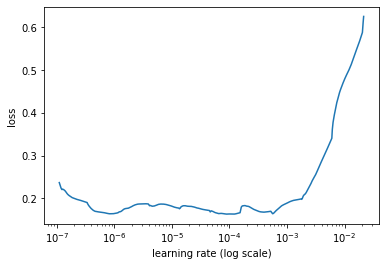

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

corpusname = 'JeLisLibre'
#corpusname = 'bibebook.com'
#corpusname = 'ljl'

import os
DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/2022_readi/first-submission/'+ corpusname + '_hotvector.csv'
#DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/'+ corpusname + '.csv'
#DATA_PATH = corpusname + '_hotvector.csv'

#class_names =  get_labels(DATA_PATH)   
class_names =  get_csv_fieldnames   (DATA_PATH)[2:]
print (class_names)    

(x_train, y_train), (x_test, y_test), preproc, model, learner = getFastText(DATA_PATH, class_names=class_names)

# recherche d'un bon taux d'apprentissage 
learner.lr_find()
learner.lr_plot()

In [ ]:
from sklearn.utils import class_weight
import numpy as np # ?

print (y_train[:2])
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)
print (list(class_weight))
class_weight_dict = dict()
for i in range (len(list(class_weight))):
  class_weight_dict[i] = list(class_weight)[i]
print (class_weight_dict)


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]]


TypeError: ignored

### home made evaluation metrics from ktrain confusion matrix 

In [ ]:
import numpy as np

def compute_evaluation_metrics(cm, round = -1, data_name = '', class_names=''): 
  # ktrain learner.validate(class_names=class_names) return the confusion matrix
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
  # np.array([[2,1,0], [3,4,5], [6,7,8]])
  true_pos = np.diag(cm)
  false_pos = np.sum(cm, axis=0) - true_pos
  false_neg = np.sum(cm, axis=1) - true_pos
  precision = true_pos / (true_pos + false_pos)
  recall = true_pos / (true_pos + false_neg)
  support = true_pos + false_neg
  total_support = np.sum(support)
  #precision = true_pos / np.sum(cm, axis=0)
  #recall = true_pos / np.sum(cm, axis=1)
  #F-Measure = (2 * Precision * Recall) / (Precision + Recall)
  fmeasure = (2*precision*recall)/(precision+recall)
  accuracy = np.sum(true_pos)/np.sum(support)
  macro_avg_precision = np.average(precision)
  macro_avg_recall = np.average(recall)
  macro_avg_fmeasure = np.average(fmeasure)
  # weighted average (averaging the support-weighted mean per label),
  weighted_average_precision=np.sum(precision*support)/np.sum(support)
  weighted_average_recall=np.sum(recall*support)/np.sum(support)
  weighted_average_fmeasure=np.sum(fmeasure*support)/np.sum(support)
  results = dict()
  results['data_name'] = data_name
  results['class_names'] = class_names
  results['true_pos'] = true_pos
  results['false_pos'] = false_pos
  results['false_neg'] = false_neg
  results['support'] = support
  results['precision'] = precision
  results['recall'] = recall
  results['fmeasure'] = fmeasure
  results['accuracy'] = accuracy
  results['macro_avg_precision'] = macro_avg_precision
  results['macro_avg_recall'] = macro_avg_recall
  results['macro_avg_fmeasure'] = macro_avg_fmeasure
  results['total_support'] = total_support
  results['weighted_average_precision'] = weighted_average_recall
  results['weighted_average_recall'] = weighted_average_recall
  results['weighted_average_fmeasure'] = weighted_average_fmeasure
  
  if round>0:
    results['precision'] = np.round(precision, round)
    results['recall'] = np.round(recall, round)
    results['fmeasure'] = np.round(fmeasure, round)
    results['accuracy'] = np.round(accuracy, round)
    results['macro_avg_precision'] = np.round(macro_avg_precision, round)
    results['macro_avg_recall'] = np.round(macro_avg_recall, round)
    results['macro_avg_fmeasure'] = np.round(macro_avg_fmeasure, round)
    results['weighted_average_precision'] = np.round(weighted_average_precision, round)
    results['weighted_average_recall'] = np.round(weighted_average_recall, round)
    results['weighted_average_fmeasure'] = np.round(weighted_average_fmeasure, round)
        
  return results

cm = np.array([[ 9, 10,  5,  2], [ 6, 36, 15,  8], [ 2, 13, 46, 11], [ 1,  7,  7, 28]])

print (cm)

import pprint 
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(compute_evaluation_metrics(cm))
pp.pprint(compute_evaluation_metrics(cm,round=2))
print (cm+cm)

pp.pprint(compute_evaluation_metrics(cm+cm,round=2))

[[ 9 10  5  2]
 [ 6 36 15  8]
 [ 2 13 46 11]
 [ 1  7  7 28]]
{   'accuracy': 0.5776699029126213,
    'class_names': '',
    'data_name': '',
    'false_neg': array([17, 29, 26, 15]),
    'false_pos': array([ 9, 30, 27, 21]),
    'fmeasure': array([0.40909091, 0.54961832, 0.63448276, 0.60869565]),
    'macro_avg_fmeasure': 0.5504719101240497,
    'macro_avg_precision': 0.5617550257961217,
    'macro_avg_recall': 0.5475129198966409,
    'precision': array([0.5       , 0.54545455, 0.63013699, 0.57142857]),
    'recall': array([0.34615385, 0.55384615, 0.63888889, 0.65116279]),
    'support': array([26, 65, 72, 43]),
    'total_support': 206,
    'true_pos': array([ 9, 36, 46, 28]),
    'weighted_average_fmeasure': 0.5738748841758554,
    'weighted_average_precision': 0.5776699029126213,
    'weighted_average_recall': 0.5776699029126213}
{   'accuracy': 0.58,
    'class_names': '',
    'data_name': '',
    'false_neg': array([17, 29, 26, 15]),
    'false_pos': array([ 9, 30, 27, 21]),
    '

### fasttext for all corpus several times

1.   Élément de liste
2.   Élément de liste



une fois que le learning rate idéal a été fixé (éventuellement en ne mettant qu'un corpus dans la liste des corpusname pour faire des tests) et que des méthodes définies comme getFastText

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')

corpusnames = ['ljl'] #, 'bibebook.com', 'JeLisLibre']

results_summary = list()
class_names_list = list()

for CORPUSNAME in corpusnames:
  DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/2022_readi/first-submission/'+ CORPUSNAME + '_hotvector.csv'
  #DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/'+ corpusname + '.csv'
  #DATA_PATH = corpusname + '_hotvector.csv'

  #class_names =  get_labels(DATA_PATH)   
  class_names =  get_csv_fieldnames   (DATA_PATH)[2:]
  class_names_list.append(class_names)
  #
  (x_train, y_train), (x_test, y_test), preproc, model, learner = getFastText(DATA_PATH, class_names=class_names)

  # pseudo cross validation by running n times the train/validation
  number_of_run = 5
  results = list()

  for RUN in range(number_of_run):
    print ('-------------------------------------------------------run', RUN)
    # train 
    # {0.05, 0.1, 0.25, 0.5}
    #learner.autofit(0.00001)
    learner.autofit(0.0001)
    #learner.autofit(0.0007, 5)
    #learner.autofit(0.0001, 10)

    # validate
    print ('run', RUN, 'CORPUSNAME', CORPUSNAME, 'class_names', class_names)
    results.append(learner.validate(class_names=class_names))

  cm_init = [[0]*len(class_names)]*len(class_names)
  for cm in results:
    cm_init += cm
  results_summary.append(cm_init)
  #print (cm_init)
  #pp.pprint(compute_evaluation_metrics(cm_init,round=2))

print ('-------------------------------------------------------------')
print ('total run', RUN)
for i in range(len(corpusnames)):
  print ('CORPUSNAME', corpusnames[i])
  r = compute_evaluation_metrics(results_summary[i],round=2, data_name=corpusnames[i], class_names=class_names_list[i])
  pp.pprint(r)

  multicol_list = list()
  for j in range(len(class_names_list[i])):
    multicol_list.append('\multicolumn{3}{|c|}{'+ class_names_list[i][j]+'}')
  multicol =  '('+corpusnames[i]+') &'  + '&'.join(multicol_list) + '\\\\'
  header = '&' + 'P&\tR&\tF1&\t' * len(r['precision']) + 'Acc.&\tMacro avg.\\\\'
  line = list()
  for i in range (len(r['precision'])):
    line.append(str(r['precision'][i]))
    line.append(str(r['recall'][i]))
    line.append(str(r['fmeasure'][i]))
  line.append(str(r['accuracy']))
  line.append(str(r['macro_avg_fmeasure']))

  print (multicol)
  print (header)
  print ('\t&'+'\t&'.join(line)+'\\\\')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
detected encoding: utf-8 (if wrong, set manually)
['level1', 'level2', 'level3', 'level4']
      level1  level2  level3  level4
22         1       0       0       0
1484       0       0       1       0
1270       0       0       1       0
581        0       1       0       0
260        0       1       0       0
['level1', 'level2', 'level3', 'level4']
      level1  level2  level3  level4
708        0       1       0       0
895        0       0       1       0
1365       0       0       1       0
1522       0       0       1       0
1052       0       0       1       0
language: fr
Word Counts: 19520
Nrows: 1854
1854 train sequences
train sequence lengths:
	mean : 164
	95percentile : 360
	99percentile : 515
x_train shape: (1854,150)
y_train shape: (1854, 4)
Is Multi-Label? False
206 test sequences
test sequence lengths:
	mean : 171
	95percentile : 404
	99pe

bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]


jll fasttext aprs recherche d'un bon taux d'apprentissage 

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001... i.e. 1e-04
 
Epoch 27: early stopping

```

ljl
Epoch 185: early stopping
Weights from best epoch have been loaded into model.
              precision    recall  f1-score   support

      level1       0.50      0.35      0.41        26
      level2       0.55      0.55      0.55        65
      level3       0.63      0.64      0.63        72
      level4       0.57      0.65      0.61        43

    accuracy                           0.58       206
   macro avg       0.56      0.55      0.55       206
weighted avg       0.57      0.58      0.57       206


bb
Epoch 123: early stopping
Weights from best epoch have been loaded into model.
                precision    recall  f1-score   support

intermédiaire       0.75      0.83      0.79       162
      avancée       0.81      0.70      0.75       141
        aisée       0.69      0.71      0.70        93

      accuracy                           0.76       396
     macro avg       0.75      0.75      0.75       396
  weighted avg       0.76      0.76      0.75       396


jll
Epoch 130: early stopping
Weights from best epoch have been loaded into model.
              precision    recall  f1-score   support

   cycle4_3e       0.76      0.74      0.75        89
   cycle4_4e       0.76      0.77      0.77        96
   cycle4_5e       0.97      0.96      0.97       116
   cycle3_6e       0.92      0.94      0.93       135

    accuracy                           0.87       436
   macro avg       0.85      0.85      0.85       436
weighted avg       0.87      0.87      0.87       436

-------------------------------------------------------------
total run 4
CORPUSNAME ljl
{   'accuracy': 0.66,
    'class_names': ['level1', 'level2', 'level3', 'level4'],
    'data_name': 'ljl',
    'false_neg': array([ 94, 121,  87,  46]),
    'false_pos': array([ 45, 143,  84,  76]),
    'fmeasure': array([0.31, 0.54, 0.75, 0.8 ]),
    'macro_avg_fmeasure': 0.6,
    'macro_avg_precision': 0.61,
    'macro_avg_recall': 0.6,
    'precision': array([0.41, 0.52, 0.75, 0.76]),
    'recall': array([0.25, 0.56, 0.74, 0.84]),
    'support': array([125, 275, 340, 290]),
    'total_support': 1030,
    'true_pos': array([ 31, 154, 253, 244]),
    'weighted_average_fmeasure': 0.65,
    'weighted_average_precision': 0.65,
    'weighted_average_recall': 0.66}
(ljl) &\multicolumn{3}{|c|}{level1}&\multicolumn{3}{|c|}{level2}&\multicolumn{3}{|c|}{level3}&\multicolumn{3}{|c|}{level4}\\
&P&	R&	F1&	P&	R&	F1&	P&	R&	F1&	P&	R&	F1&	Acc.&	Macro avg.\\
	&0.41	&0.25	&0.31	&0.52	&0.56	&0.54	&0.75	&0.74	&0.75	&0.76	&0.84	&0.8	&0.66	&0.6\\
CORPUSNAME bibebook.com
{   'accuracy': 0.77,
    'class_names': ['intermédiaire', 'avancée', 'aisée'],
    'data_name': 'bibebook.com',
    'false_neg': array([178, 138, 146]),
    'false_pos': array([196, 133, 133]),
    'fmeasure': array([0.78, 0.78, 0.74]),
    'macro_avg_fmeasure': 0.76,
    'macro_avg_precision': 0.77,
    'macro_avg_recall': 0.76,
    'precision': array([0.77, 0.78, 0.75]),
    'recall': array([0.78, 0.78, 0.73]),
    'support': array([825, 615, 540]),
    'total_support': 1980,
    'true_pos': array([647, 477, 394]),
    'weighted_average_fmeasure': 0.77,
    'weighted_average_precision': 0.77,
    'weighted_average_recall': 0.77}
(bb) &\multicolumn{3}{|c|}{intermédiaire}&\multicolumn{3}{|c|}{avancée}&\multicolumn{3}{|c|}{aisée}\\
&P&	R&	F1&	P&	R&	F1&	P&	R&	F1&	Acc.&	Macro avg.\\
	&0.77	&0.78	&0.78	&0.78	&0.78	&0.78	&0.75	&0.73	&0.74	&0.77	&0.76\\
CORPUSNAME JeLisLibre
{   'accuracy': 0.89,
    'class_names': ['cycle4_3e', 'cycle4_4e', 'cycle4_5e', 'cycle3_6e'],
    'data_name': 'JeLisLibre',
    'false_neg': array([ 81, 103,  32,  28]),
    'false_pos': array([86, 68, 18, 72]),
    'fmeasure': array([0.81, 0.8 , 0.96, 0.93]),
    'macro_avg_fmeasure': 0.88,
    'macro_avg_precision': 0.88,
    'macro_avg_recall': 0.87,
    'precision': array([0.81, 0.84, 0.97, 0.9 ]),
    'recall': array([0.82, 0.77, 0.95, 0.96]),
    'support': array([445, 450, 625, 660]),
    'total_support': 2180,
    'true_pos': array([364, 347, 593, 632]),
    'weighted_average_fmeasure': 0.89,
    'weighted_average_precision': 0.89,
    'weighted_average_recall': 0.89}
(jll) &\multicolumn{3}{|c|}{3e}&\multicolumn{3}{|c|}{4e}&\multicolumn{3}{|c|}{5e}&\multicolumn{3}{|c|}{6e}\\
&P&	R&	F1&	P&	R&	F1&	P&	R&	F1&	P&	R&	F1&	Acc.&	Macro avg.\\
	&0.81	&0.82	&0.81	&0.84	&0.77	&0.8	&0.97	&0.95	&0.96	&0.9	&0.96	&0.93	&0.89	&0.88\\
```

to latex

In [ ]:
jll_fasttext_result = {'accuracy': 0.87,
    'false_neg': [106,  80,  58,  32],
    'false_pos': [ 94, 108,  27,  47],
    'fmeasure': [0.78, 0.82, 0.92, 0.94],
    'macro_avg_fmeasure': 0.87,
    'macro_avg_precision': 0.87,
    'macro_avg_recall': 0.87,
    'precision': [0.79, 0.8 , 0.95, 0.93],
    'recall': [0.77, 0.84, 0.9 , 0.95],
    'support': [465, 510, 570, 635],
    'total_support': 2180,
    'weighted_average_fmeasure': 0.87,
    'weighted_average_precision': 0.87,
    'weighted_average_recall': 0.87}
r = jll_fasttext_result
# (jll) & \multicolumn{3}{|c|}{6e} 
header = '&P&\tR&\tF1&\t' * len(r['precision']) + 'Acc.&\tMacro avg.\\\\'
line = list()
for i in range (len(r['precision'])):
  line.append(str(r['precision'][i]))
  line.append(str(r['recall'][i]))
  line.append(str(r['fmeasure'][i]))
line.append(str(r['accuracy']))
line.append(str(r['macro_avg_fmeasure']))

print (header)
print ('\t&'+'\t&'.join(line)+'\\\\')

P&	R&	F1&	P&	R&	F1&	P&	R&	F1&	P&	R&	F1&	Acc.&	Macro avg.\\
0.79	&0.77	&0.78	&0.8	&0.84	&0.82	&0.95	&0.9	&0.92	&0.93	&0.95	&0.94	&0.87	&0.87\\


## ktrain bert

* https://huggingface.co/bert-base-multilingual-cased
* https://arxiv.org/pdf/1810.04805.pdf
* https://github.com/google-research/bert/blob/master/multilingual.md
* https://d2l.ai/chapter_natural-language-processing-pretraining/bert-dataset.html


In [ ]:
# ETAPE 1
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH, 
                      'text',
                      label_columns = class_names,
                      val_filepath=None, # if None, 10% of data will be used for validation
                      ##max_features=NUM_WORDS, 
                      #maxlen=MAXLEN,
                      #ngram_range=NGRAMS_SIZE,
                      preprocess_mode='bert' 
                      )

detected encoding: utf-8 (if wrong, set manually)
['cycle4_3e', 'cycle4_4e', 'cycle4_5e', 'cycle3_6e']
      cycle4_3e  cycle4_4e  cycle4_5e  cycle3_6e
1318          0          1          0          0
1373          0          1          0          0
1302          0          1          0          0
894           0          1          0          0
3758          0          0          0          1
['cycle4_3e', 'cycle4_4e', 'cycle4_5e', 'cycle3_6e']
      cycle4_3e  cycle4_4e  cycle4_5e  cycle3_6e
656           1          0          0          0
4308          0          0          0          1
3920          0          0          0          1
2365          0          0          1          0
3680          0          0          0          1
preprocessing train...
language: fr


Is Multi-Label? False
preprocessing test...
language: fr


In [ ]:
# a look at the format
print (type(x_train), len(x_train),len(x_train[0]), len(x_train[1]), x_train[0], x_train[1])
print()
print (type(y_train), len(y_train),y_train[:5])

<class 'list'> 2 3915 3915 [[  101 10453 11359 ...     0     0     0]
 [  101 51435 10246 ...     0     0     0]
 [  101 34090   177 ...     0     0     0]
 ...
 [  101 10131   117 ...     0     0     0]
 [  101 37063 10154 ...     0     0     0]
 [  101 10141 20025 ...     0     0     0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

<class 'numpy.ndarray'> 3915 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# ETAPE 2 et 3
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)


Is Multi-Label? False
maxlen is 400
done.


In [ ]:
# recherche d'un bon taux d'apprentissage 
learner.lr_find()
learner.lr_plot()

In [ ]:
# ETAPE 5
learner.fit_onecycle(2e-5, 1)
#learner.fit_onecycle(0.0001, 1)




begin training using onecycle policy with max lr of 2e-05...
653/653 [==============================] - 497s 716ms/step - loss: 0.7248 - accuracy: 0.6943 - val_loss: 0.2701 - val_accuracy: 0.8945


bert ljl learner.fit_onecycle(0.001, 1)


In [ ]:
learner.validate(class_names=class_names)

bert jll learner.fit_onecycle(2e-5, 1)


In [ ]:
learner.validate(class_names=class_names)

              precision    recall  f1-score   support

   cycle4_3e       0.95      0.76      0.85       102
   cycle4_4e       0.77      0.87      0.82       101
   cycle4_5e       0.94      0.95      0.95       109
   cycle3_6e       0.93      0.97      0.95       124

    accuracy                           0.89       436
   macro avg       0.90      0.89      0.89       436
weighted avg       0.90      0.89      0.89       436



array([[ 78,  19,   1,   4],
       [  4,  88,   5,   4],
       [  0,   4, 104,   1],
       [  0,   3,   1, 120]])

bert bb learner.fit_onecycle(2e-5, 1)


In [ ]:
learner.validate(class_names=class_names)

bert ljl  learner.fit_onecycle(2e-5, 1)


In [ ]:
learner.validate(class_names=class_names)

## Bert Transformer camembert/flaubert



prise en main avec les data examples https://github.com/amaiya/ktrain/blob/master/tutorials/tutorial-A3-hugging_face_transformers.ipynb

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target
print ('x_train', type(x_train), len(x_train), x_train[:5])
print ('y_train', type(y_train), len(y_train), y_train[:5])

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
x_train <class 'list'> 2257 ['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n', "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: Univer

Au départ je pensais utiliser etape 1 de Bert avec texts_from_csv  qui récupère les classes à prédire au bon format numpy et pour les data les recharger de manière indépendante. En effet texts_from_csv segmente à la bert (on ne sait pas si même tokenizer pour les autres modèles transformer).
Néanmoins j'ai constaté que pas le même nombre d'instances selon les deux approches... en effet texts_from_csv découper en folds train et valid... 10%

In [ ]:
import random
lines=[i for i in range(0,10)]
print (lines)

#
random.seed(9001)
random.shuffle(lines)
print ('wi seed', lines)

#
lines=[i for i in range(0,10)]
random.shuffle(lines)
print ('wo seed', lines)

#
lines=[i for i in range(0,10)]
random.shuffle(lines)
print ('wo seed 2', lines)

#
lines=[i for i in range(0,10)]
random.seed(9001)
random.shuffle(lines)
print ('wi seed 2', lines)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
wi seed [3, 1, 5, 6, 2, 7, 9, 8, 4, 0]
wo seed [3, 1, 6, 0, 7, 4, 2, 5, 8, 9]
wo seed 2 [2, 4, 0, 9, 5, 1, 8, 6, 7, 3]
wi seed 2 [3, 1, 5, 6, 2, 7, 9, 8, 4, 0]


In [ ]:
import csv
import numpy
import random

def loadTexts(DATA_PATH, random_seed = 42):
  with open(DATA_PATH, 'r' ) as f:
    csvreader = csv.reader(f)
    header = next(csvreader)
    return [line[1] for line in csvreader]
    #return [line[1] for line in lines]
  return None  

def loadCorpusForTransformer(DATA_PATH, random_seed = 42):
  with open(DATA_PATH, 'r' ) as f:
    #reader = csv.DictReader(f)
    #x_train = [line['text'] for line in reader]
    csvreader = csv.reader(f)
    header = next(csvreader)
    print (header)
    lines = [line for line in csvreader]
    random.seed(random_seed)
    random.shuffle(lines)
    x = [line[1] for line in lines]
    y = [[int(x) for x in line[2:len(line)]] for line in lines]
  
    percent_train = 90
    len_train = round(len(lines)/100* percent_train)
    print ('len_train', len_train) 
    x_train = x[:len_train]
    x_test = x[len_train:]
    y_train = y[:len_train]
    y_test = y[len_train:]
    return x_train, x_test, y_train, y_test
  return None  
  #for line in reader:
        # line is { 'workers': 'w0', 'constant': 7.334, 'age': -1.406, ... }
        # e.g. print( line[ 'workers' ] ) yields 'w0'
  #      print(line)


In [ ]:
x_train, x_test, y_train, y_test = loadCorpusForTransformer (DATA_PATH)
print ('x_train', type(x_train), len(x_train), x_train[:5])
print ('y_train', type(y_train), len(y_train), y_train[:5])
y_train = numpy.array(y_train)
print ('y_train', type(y_train), len(y_train), y_train[:5])


1. STEP 1: Preprocess Data and Build a Transformer Model

In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
MODEL_NAME = 'camembert-base'# https://huggingface.co/camembert-base ; https://camembert-model.fr/
#MODEL_NAME = 'flaubert/flaubert_base_cased' # https://huggingface.co/flaubert/flaubert_base_cased
# bert https://github.com/amaiya/ktrain/blob/master/ktrain/text/models.py
#MODEL_NAME = 'bert-base-multilingual-cased' # https://huggingface.co/bert-base-multilingual-cased ; https://github.com/deepset-ai/bert-tensorflow/blob/master/samples/bert_config.json
MODEL_NAME = 'bert-base-cased'

def getTransformer (model_name, x_train, y_train, x_test, y_test, class_names=class_names, batch_size=6):
  t = text.Transformer(model_name, 
                     #maxlen=500, 
                     class_names=class_names #,
                     #label_columns = class_names,
                     #val_filepath=None, # if None, 10% of data will be used for validation
                      ##max_features=NUM_WORDS, 
                      #maxlen=MAXLEN,
                      #ngram_range=NGRAMS_SIZE,
                     # preprocess_mode='bert' 
                     )
#model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
  trn = t.preprocess_train(x_train, y_train)
  val = t.preprocess_test(x_test, y_test)
  model = t.get_classifier() #     model (Model): A Keras Model instance
  learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=batch_size)
  print ('t',type(t), 
      '\ntrn', type(trn), 
      '\nval', type(val), 
      '\nmodel', type(model), 
      '\nlearner', type(learner))
  print (model.summary())
  return t, trn, val, model, learner



In [ ]:
t, trn, val, model, learner = getTransformer (MODEL_NAME, x_train, y_train, x_test, y_test, class_names)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

preprocessing train...
language: fr
train sequence lengths:
	mean : 145
	95percentile : 153
	99percentile : 204


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: fr
test sequence lengths:
	mean : 146
	95percentile : 153
	99percentile : 207


Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

<class 'ktrain.text.preprocessor.Transformer'> <class 'ktrain.text.dataset.TransformerDataset'> <class 'ktrain.text.dataset.TransformerDataset'> <class 'transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification'> <class 'ktrain.text.learner.TransformerTextClassLearner'>


In [ ]:
print ('t',type(t), 
      '\ntrn', type(trn), 
      '\nval', type(val), 
      '\nmodel', type(model), 
      '\nlearner', type(learner))
print (model.summary())

t <class 'ktrain.text.preprocessor.Transformer'> 
trn <class 'ktrain.text.dataset.TransformerDataset'> 
val <class 'ktrain.text.dataset.TransformerDataset'> 
model <class 'transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification'> 
learner <class 'ktrain.text.learner.TransformerTextClassLearner'>
Model: "tf_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_293 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3076      
                                                                 
Total params: 108,313,348
Trainable params: 108,313,348
Non-trainable params: 0
______________________________

2. STEP 2 [Optional]: Estimate a Good Learning Rate

Learning rates between 2e-5 and 5e-5 tend to work well with transformer models based on papers from Google. However, we will run our learning-rate-finder for two epochs to estimate the LR on this particular dataset.

As shown below, our results are consistent Google's findings.

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
652/652 [==============================] - 59s 89ms/step - loss: 0.1622 - accuracy: 0.9375


/usr/local/lib/python3.7/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


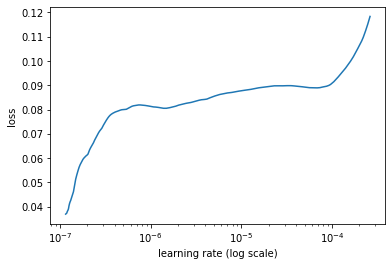

In [ ]:
#jll MODEL_NAME = 'distilbert-base-uncased'
learner.lr_find(show_plot=True, max_epochs=2)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
652/652 [==============================] - 20s 7ms/step - loss: 0.0321 - accuracy: 0.9848


/usr/local/lib/python3.7/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


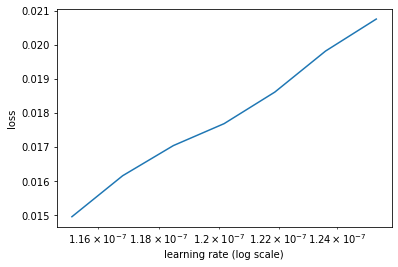

In [ ]:
#jll camembert
learner.lr_find(show_plot=True, max_epochs=2)

3. STEP 3: Train Model

In [ ]:
learner.fit_onecycle(8e-5, 4)
#learner.fit_onecycle(2e-5, 1) # initial bert value



begin training using onecycle policy with max lr of 8e-05...
Epoch 1/4
653/653 [==============================] - 198s 251ms/step - loss: 0.7780 - accuracy: 0.6913 - val_loss: 0.4331 - val_accuracy: 0.8460
Epoch 2/4
653/653 [==============================] - 152s 231ms/step - loss: 0.4999 - accuracy: 0.8187 - val_loss: 0.5382 - val_accuracy: 0.8069
Epoch 3/4
653/653 [==============================] - 156s 237ms/step - loss: 1.0552 - accuracy: 0.4895 - val_loss: 1.3793 - val_accuracy: 0.3241
Epoch 4/4
653/653 [==============================] - 163s 248ms/step - loss: 1.3933 - accuracy: 0.2727 - val_loss: 1.3695 - val_accuracy: 0.3241



STEP 4: Evaluate/Inspect Model


In [ ]:
# jll 'distilbert-base-uncased' fit_onecycle(8e-5, 4)
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

   cycle4_3e       0.89      0.76      0.82        85
   cycle4_4e       0.76      0.80      0.78        97
   cycle4_5e       0.94      0.85      0.89       112
   cycle3_6e       0.84      0.94      0.88       141

    accuracy                           0.85       435
   macro avg       0.86      0.84      0.84       435
weighted avg       0.86      0.85      0.85       435



array([[ 65,  14,   1,   5],
       [  4,  78,   4,  11],
       [  1,   6,  95,  10],
       [  3,   5,   1, 132]])

In [ ]:
# jll 'camembert-base' fit_onecycle(8e-5, 4)
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

   cycle4_3e       0.95      0.85      0.89        85
   cycle4_4e       0.86      0.94      0.90        97
   cycle4_5e       0.98      0.96      0.97       112
   cycle3_6e       0.96      0.98      0.97       141

    accuracy                           0.94       435
   macro avg       0.94      0.93      0.93       435
weighted avg       0.94      0.94      0.94       435



array([[ 72,  12,   0,   1],
       [  3,  91,   1,   2],
       [  0,   2, 107,   3],
       [  1,   1,   1, 138]])

In [ ]:
# jll flaubert/flaubert_base_cased fit_onecycle(8e-5, 4)
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

   cycle4_3e       0.00      0.00      0.00        85
   cycle4_4e       0.00      0.00      0.00        97
   cycle4_5e       0.00      0.00      0.00       112
   cycle3_6e       0.32      1.00      0.49       141

    accuracy                           0.32       435
   macro avg       0.08      0.25      0.12       435
weighted avg       0.11      0.32      0.16       435



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,   0,  85],
       [  0,   0,   0,  97],
       [  0,   0,   0, 112],
       [  0,   0,   0, 141]])

In [ ]:
# jll bert-base-multilingual-cased fit_onecycle(8e-5, 4)
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

   cycle4_3e       0.00      0.00      0.00        85
   cycle4_4e       0.00      0.00      0.00        97
   cycle4_5e       0.00      0.00      0.00       112
   cycle3_6e       0.32      1.00      0.49       141

    accuracy                           0.32       435
   macro avg       0.08      0.25      0.12       435
weighted avg       0.11      0.32      0.16       435



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,   0,  85],
       [  0,   0,   0,  97],
       [  0,   0,   0, 112],
       [  0,   0,   0, 141]])

In [ ]:
# jll 'camembert-base' fit_onecycle(8e-5, 4)
learner.fit_onecycle(2e-5, 1) 
learner.validate(class_names=t.get_classes())



begin training using onecycle policy with max lr of 2e-05...
653/653 [==============================] - 149s 205ms/step - loss: 0.9201 - accuracy: 0.6586 - val_loss: 0.3791 - val_accuracy: 0.9149
              precision    recall  f1-score   support

   cycle4_3e       0.92      0.80      0.86        85
   cycle4_4e       0.79      0.91      0.84        97
   cycle4_5e       0.96      0.93      0.95       112
   cycle3_6e       0.98      0.98      0.98       141

    accuracy                           0.91       435
   macro avg       0.91      0.90      0.91       435
weighted avg       0.92      0.91      0.92       435



array([[ 68,  15,   2,   0],
       [  6,  88,   2,   1],
       [  0,   6, 104,   2],
       [  0,   3,   0, 138]])

In [ ]:
# jll bert-base-multilingual-cased 
learner.fit_onecycle(2e-5, 1) 
learner.validate(class_names=t.get_classes())



begin training using onecycle policy with max lr of 2e-05...
653/653 [==============================] - 151s 230ms/step - loss: 1.3874 - accuracy: 0.2817 - val_loss: 1.3718 - val_accuracy: 0.3241
              precision    recall  f1-score   support

   cycle4_3e       0.00      0.00      0.00        85
   cycle4_4e       0.00      0.00      0.00        97
   cycle4_5e       0.00      0.00      0.00       112
   cycle3_6e       0.32      1.00      0.49       141

    accuracy                           0.32       435
   macro avg       0.08      0.25      0.12       435
weighted avg       0.11      0.32      0.16       435



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,   0,  85],
       [  0,   0,   0,  97],
       [  0,   0,   0, 112],
       [  0,   0,   0, 141]])

In [ ]:
# jll 'bert-base-cased'
learner.fit_onecycle(2e-5, 1) 
learner.validate(class_names=t.get_classes())



begin training using onecycle policy with max lr of 2e-05...
653/653 [==============================] - 155s 206ms/step - loss: 1.0816 - accuracy: 0.5317 - val_loss: 0.7422 - val_accuracy: 0.7448
              precision    recall  f1-score   support

   cycle4_3e       0.79      0.72      0.75        85
   cycle4_4e       0.65      0.62      0.63        97
   cycle4_5e       0.86      0.78      0.82       112
   cycle3_6e       0.71      0.82      0.76       141

    accuracy                           0.74       435
   macro avg       0.75      0.73      0.74       435
weighted avg       0.75      0.74      0.74       435



array([[ 61,  14,   3,   7],
       [ 14,  60,   3,  20],
       [  1,   3,  87,  21],
       [  1,  16,   8, 116]])

### bert for all corpus, several models several times

require running ktrain installation and some function definition in previous cells (get_csv_fieldnames, loadCorpusForTransformer, getTransformer) + uploading data in hotvector.csv format

In [ ]:

#MODEL_NAME = 'distilbert-base-uncased'
#MODEL_NAME = 'camembert-base'# https://huggingface.co/camembert-base ; https://camembert-model.fr/
#MODEL_NAME = 'flaubert/flaubert_base_cased' # https://huggingface.co/flaubert/flaubert_base_cased
# https://discuss.huggingface.co/t/helsinki-nlp-opus-mt-en-fr-missing-tf-model-h5-file/13467/3
# 404 Client Error: Not Found for url: https://huggingface.co/flaubert/flaubert_base_cased/resolve/main/tf_model.h5
# bert https://github.com/amaiya/ktrain/blob/master/ktrain/text/models.py
#MODEL_NAME = 'bert-base-multilingual-cased' # https://huggingface.co/bert-base-multilingual-cased ; https://github.com/deepset-ai/bert-tensorflow/blob/master/samples/bert_config.json
#MODEL_NAME = 'bert-base-cased'

from google.colab import drive
import os

drive.mount('/content/gdrive')

corpusnames = ['ljl', 'bibebook.com', 'JeLisLibre']
corpusnames = ['ljl']



model_names = ['bert-base-multilingual-cased', 'camembert-base', 'flaubert/flaubert_base_cased'] #]
model_names = ['camembert-base' ] #]

# PSEUDO CROSS VALIDATION by running several times the run and averaging the results
# if number_of_run = -1 then lr_find, and fit_onecycle(2e-5, 1), fit_onecycle(5e-5, 1)
number_of_run = 2

for MODEL_NAME in model_names:
  print ('-------------------------------------------------------------------')

  results_summary = list()
  class_names_list = list()
  
  for CORPUSNAME in corpusnames:
    DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/2022_readi/first-submission/'+ CORPUSNAME + '_hotvector.csv'
    #DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/'+ corpusname + '.csv'
    #DATA_PATH = corpusname + '_hotvector.csv'

    #class_names =  get_labels(DATA_PATH)   
    class_names =  get_csv_fieldnames   (DATA_PATH)[2:]
    class_names_list.append(class_names)

    x_train, x_test, y_train, y_test = loadCorpusForTransformer (DATA_PATH)

    print ('CORPUS_NAME', CORPUSNAME, 'MODEL_NAME', MODEL_NAME, 'class_names', class_names)

    print ('--> getTransformer')
    t, trn, val, model, learner = getTransformer (MODEL_NAME, x_train, y_train, x_test, y_test, class_names)

     # EXPLORATION
    if number_of_run <0:
      print ('--> lr_find')
      learner.lr_find(show_plot=True, max_epochs=2)

      #
      print ('--> fit_onecycle 2.5')
      learner.fit_onecycle(2e-5, 1) 
      learner.validate(class_names=t.get_classes())

      #
      print ('--> fit_onecycle 5e-5')
      learner.fit_onecycle(5e-5, 1) 
      learner.validate(class_names=t.get_classes())

    # PSEUDO CROSS VALIDATION by running n times the train/validation
    
    results = list()

    for RUN in range(number_of_run):
      print ('-------------------------------------------------------run', RUN)
      # train 
      # {0.05, 0.1, 0.25, 0.5}
      #learner.autofit(0.00001)
      learner.autofit(0.0001)
      #learner.autofit(0.0007, 5)
      #learner.autofit(0.0001, 10)

      # validate
      print ('MODEL_NAME',MODEL_NAME, 'run', RUN, 'CORPUSNAME', CORPUSNAME, 'class_names', class_names)
      results.append(learner.validate(class_names=class_names))

    cm_init = [[0]*len(class_names)]*len(class_names)
    for cm in results:
      cm_init += cm
    results_summary.append(cm_init)
    pp.pprint(compute_evaluation_metrics(cm_init,round=2, data_name=CORPUSNAME, class_names=class_names))

      
  print ('-------------------------------------------------------------')
  print ('total run', RUN, 'MODEL_NAME',MODEL_NAME)
  for i in range(len(corpusnames)):
    print ('CORPUSNAME', corpusnames[i], 'CORPUSNAME', corpusnames[i])
    r = compute_evaluation_metrics(results_summary[i],round=2, data_name=corpusnames[i], class_names=class_names_list[i])
    pp.pprint(r)

    multicol_list = list()
    for j in range(len(class_names_list[i])):
      multicol_list.append('\multicolumn{3}{|c|}{'+ class_names_list[i][j]+'}')
    multicol =  '('+corpusnames[i]+') &'  + '&'.join(multicol_list) + '\\\\'
    header = '&' + 'P&\tR&\tF1&\t' * len(r['precision']) + 'Acc.&\tMacro avg.\\\\'
    line = list()
    for i in range (len(r['precision'])):
      line.append(str(r['precision'][i]))
      line.append(str(r['recall'][i]))
      line.append(str(r['fmeasure'][i]))
    line.append(str(r['accuracy']))
    line.append(str(r['macro_avg_fmeasure']))

    print (multicol)
    print (header)
    print ('\t&'+'\t&'.join(line)+'\\\\')
    print()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-------------------------------------------------------------------
['id', 'text', 'level1', 'level2', 'level3', 'level4']
len_train 1854
CORPUS_NAME ljl MODEL_NAME camembert-base class_names ['level1', 'level2', 'level3', 'level4']
--> getTransformer
preprocessing train...
language: fr
train sequence lengths:
	mean : 195
	95percentile : 424
	99percentile : 608


Is Multi-Label? False
preprocessing test...
language: fr
test sequence lengths:
	mean : 178
	95percentile : 389
	99percentile : 495


t <class 'ktrain.text.preprocessor.Transformer'> 
trn <class 'ktrain.text.dataset.TransformerDataset'> 
val <class 'ktrain.text.dataset.TransformerDataset'> 
model <class 'transformers.models.camembert.modeling_tf_camembert.TFCamembertForSequenceClassification'> 
learner <class 'ktrain.text.learner.TransformerTextClassLearner'>
Model: "tf_camembert_for_sequence_classification_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 110031360 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 593668    
 ficationHead)                                                   
                                                                 
Total params: 110,625,028
Trainable params: 110,625,028
Non-trainable params: 0
__________



```
ljl-cam & 0.56 & 0.32 & 0.41 & 0.59 & 0.67 & 0.63 & 0.59 & 0.71 & 0.64 & 0.72 & 0.53 & 0.61 & 0.61 & 0.57 \\

MODEL_NAME camembert-base total run 4 CORPUSNAME ljl CORPUSNAME ljl
{   'accuracy': 0.61,
    'class_names': 'bli',
    'data_name': 'bla',
    'false_neg': array([ 85, 108, 100, 110]),
    'false_pos': array([ 32, 149, 173,  49]),
    'fmeasure': array([0.41, 0.63, 0.64, 0.61]),
    'macro_avg_fmeasure': 0.57,
    'macro_avg_precision': 0.61,
    'macro_avg_recall': 0.56,
    'precision': array([0.56, 0.59, 0.59, 0.72]),
    'recall': array([0.32, 0.67, 0.71, 0.53]),
    'support': array([125, 325, 345, 235]),
    'total_support': 1030,
    'true_pos': array([ 40, 217, 245, 125]),
    'weighted_average_fmeasure': 0.6,
    'weighted_average_precision': 0.61,
    'weighted_average_recall': 0.61}

    bb-cam & 0.71 & 0.71 & 0.71 &  0.83 & 0.8  & 0.81 & 0.8  & 0.84 0.82 & 0.79 & 0.78 \\

MODEL_NAME camembert-base total run 4 CORPUSNAME bibebook.com CORPUSNAME bibebook.com
{   'accuracy': 0.79,
    'class_names': 'bli',
    'data_name': 'bla',
    'false_neg': array([172, 101, 140]),
    'false_pos': array([145, 127, 141]),
    'fmeasure': array([0.81, 0.82, 0.71]),
    'macro_avg_fmeasure': 0.78,
    'macro_avg_precision': 0.78,
    'macro_avg_recall': 0.78,
    'precision': array([0.83, 0.8 , 0.71]),
    'recall': array([0.8 , 0.84, 0.71]),
    'support': array([870, 615, 490]),
    'total_support': 1975,
    'true_pos': array([698, 514, 350]),
    'weighted_average_fmeasure': 0.79,
    'weighted_average_precision': 0.79,
    'weighted_average_recall': 0.79}


      jll-cam2 & 0.96 & 0.95& 0.96 &
              & 0.92 & 0.93 &0.93 & 
              & 0.87 & 0.88& 0.87 & 
              & 0.92 & 0.91 & 0.92 & 0.92& 0.92\\

    {   'accuracy': 0.92,
    'class_names': ['cycle4_3e', 'cycle4_4e', 'cycle4_5e', 'cycle3_6e'],
    'data_name': 'JeLisLibre',
    'false_neg': array([18, 24, 15, 12]),
    'false_pos': array([16, 25, 17, 11]),
    'fmeasure': array([0.92, 0.87, 0.93, 0.96]),
    'macro_avg_fmeasure': 0.92,
    'macro_avg_precision': 0.92,
    'macro_avg_recall': 0.92,
    'precision': array([0.92, 0.87, 0.92, 0.96]),
    'recall': array([0.91, 0.88, 0.93, 0.95]),
    'support': array([204, 194, 214, 258]),
    'total_support': 870,
    'true_pos': array([186, 170, 199, 246]),
    'weighted_average_fmeasure': 0.92,
    'weighted_average_precision': 0.92,
    'weighted_average_recall': 0.92}
    ```



## testing Is Multi-Label? True 

différent de multi-class

https://nbviewer.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-04-text-classification.ipynb#Multi-Label-Text-Classification:--Identifying-Toxic-Online-Comments

In [ ]:
!wget https://raw.githubusercontent.com/iampukar/toxic-comments-classification/master/train.csv

In [ ]:

#MODEL_NAME = 'distilbert-base-uncased'
#MODEL_NAME = 'camembert-base'# https://huggingface.co/camembert-base ; https://camembert-model.fr/
#MODEL_NAME = 'flaubert/flaubert_base_cased' # https://huggingface.co/flaubert/flaubert_base_cased
# https://discuss.huggingface.co/t/helsinki-nlp-opus-mt-en-fr-missing-tf-model-h5-file/13467/3
# 404 Client Error: Not Found for url: https://huggingface.co/flaubert/flaubert_base_cased/resolve/main/tf_model.h5
# bert https://github.com/amaiya/ktrain/blob/master/ktrain/text/models.py
#MODEL_NAME = 'bert-base-multilingual-cased' # https://huggingface.co/bert-base-multilingual-cased ; https://github.com/deepset-ai/bert-tensorflow/blob/master/samples/bert_config.json
#MODEL_NAME = 'bert-base-cased'

from google.colab import drive
import os

drive.mount('/content/gdrive')

corpusnames = ['ljl', 'bibebook.com', 'JeLisLibre']


model_names = [ 'camembert-base' ] #, 'flaubert/flaubert_base_cased', 'bert-base-multilingual-cased'] #]

# PSEUDO CROSS VALIDATION by running several times the run and averaging the results
# if number_of_run = -1 then lr_find, and fit_onecycle(2e-5, 1), fit_onecycle(5e-5, 1)
number_of_run = 5

for MODEL_NAME in model_names:
  print ('-------------------------------------------------------------------')


  results_summary = list()
  class_names_list = list()

  for CORPUSNAME in corpusnames:
    DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/2022_readi/first-submission/'+ CORPUSNAME + '_hotvector.csv'
    #DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/'+ corpusname + '.csv'
    #DATA_PATH = corpusname + '_hotvector.csv'

    #class_names =  get_labels(DATA_PATH)   
    class_names =  get_csv_fieldnames   (DATA_PATH)[2:]
    class_names_list.append(class_names)
    
    x_train, x_test, y_train, y_test = loadCorpusForTransformer (DATA_PATH)

    print ('-------------------------------------------------------------------')
    print ('MODEL_NAME', MODEL_NAME, 'CORPUS_NAME', CORPUSNAME,  'class_names', class_names)

    print ('--> getTransformer')
    t, trn, val, model, learner = getTransformer (MODEL_NAME, x_train, y_train, x_test, y_test, class_names)

    # EXPLORATION
    if number_of_run <0:
      print ('--> lr_find')
      learner.lr_find(show_plot=True, max_epochs=2)

      #
      print ('--> fit_onecycle 2.5')
      learner.fit_onecycle(2e-5, 1) 
      learner.validate(class_names=t.get_classes())

      #
      print ('--> fit_onecycle 5e-5')
      learner.fit_onecycle(5e-5, 1) 
      learner.validate(class_names=t.get_classes())

    # PSEUDO CROSS VALIDATION by running n times the train/validation
    
    results = list()

    for RUN in range(number_of_run):
      print ('-------------------------------------------------------run', RUN)
      # train 
      # {0.05, 0.1, 0.25, 0.5}
      #learner.autofit(0.00001)
      learner.autofit(0.0001)
      #learner.autofit(0.0007, 5)
      #learner.autofit(0.0001, 10)

      # validate
      print ('MODEL_NAME', MODEL_NAME, 'run', RUN, 'CORPUSNAME', CORPUSNAME, 'class_names', class_names)
      results.append(learner.validate(class_names=class_names))

    cm_init = [[0]*len(class_names)]*len(class_names)
    for cm in results:
      cm_init += cm
    print (compute_evaluation_metrics(cm_init,round=2, data_name=CORPUSNAME, class_names=class_names)
    results_summary.append(cm_init)

      
  print ('-------------------------------------------------------------')
  for i in range(len(corpusnames)):
    print ('MODEL_NAME',MODEL_NAME,'total run', RUN, 'CORPUSNAME', corpusnames[i])
    r = compute_evaluation_metrics(results_summary[i],round=2, data_name=corpusnames[i], class_names=class_names_list[i])
    pp.pprint(r)

    multicol_list = list()
    for j in range(len(class_names_list[i])):
      multicol_list.append('\multicolumn{3}{|c|}{'+ class_names_list[i][j]+'}')
    multicol =  '('+corpusnames[i]+') &'  + '&'.join(multicol_list) + '\\\\'
    header = '&' + 'P&\tR&\tF1&\t' * len(r['precision']) + 'Acc.&\tMacro avg.\\\\'
    line = list()
    for i in range (len(r['precision'])):
      line.append(str(r['precision'][i]))
      line.append(str(r['recall'][i]))
      line.append(str(r['fmeasure'][i]))
    line.append(str(r['accuracy']))
    line.append(str(r['macro_avg_fmeasure']))

    print (multicol)
    print (header)
    print ('\t&'+'\t&'.join(line)+'\\\\')
    print()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-------------------------------------------------------------------
['id', 'text', 'level1', 'level2', 'level3', 'level4']
len_train 1854
-------------------------------------------------------------------
MODEL_NAME camembert-base CORPUS_NAME ljl class_names ['level1', 'level2', 'level3', 'level4']
--> getTransformer
preprocessing train...
language: fr
train sequence lengths:
	mean : 195
	95percentile : 424
	99percentile : 608


Is Multi-Label? False
preprocessing test...
language: fr
test sequence lengths:
	mean : 178
	95percentile : 389
	99percentile : 495


t <class 'ktrain.text.preprocessor.Transformer'> 
trn <class 'ktrain.text.dataset.TransformerDataset'> 
val <class 'ktrain.text.dataset.TransformerDataset'> 
model <class 'transformers.models.camembert.modeling_tf_camembert.TFCamembertForSequenceClassification'> 
learner <class 'ktrain.text.learner.TransformerTextClassLearner'>
Model: "tf_camembert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 110031360 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 593668    
 ficationHead)                                                   
                                                                 
Total params: 110,625,028
Trainable params: 110,625,028
Non-trainable params: 0
__________

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


309/309 [==============================] - 45s 146ms/step - loss: 1.1788 - accuracy: 0.4304 - val_loss: 1.1379 - val_accuracy: 0.4612
Epoch 2/1024
309/309 [==============================] - 45s 144ms/step - loss: 1.2784 - accuracy: 0.3587 - val_loss: 1.3237 - val_accuracy: 0.3350
Epoch 3/1024
309/309 [==============================] - ETA: 0s - loss: 1.2880 - accuracy: 0.3625
Epoch 00003: Reducing Max LR on Plateau: new max lr will be 5e-05 (if not early_stopping).
309/309 [==============================] - 45s 143ms/step - loss: 1.2880 - accuracy: 0.3625 - val_loss: 1.2377 - val_accuracy: 0.4612
Epoch 4/1024
309/309 [==============================] - 45s 144ms/step - loss: 1.0739 - accuracy: 0.4995 - val_loss: 1.0362 - val_accuracy: 0.4660
Epoch 5/1024
309/309 [==============================] - 45s 144ms/step - loss: 0.8972 - accuracy: 0.5885 - val_loss: 1.0127 - val_accuracy: 0.5388
Epoch 6/1024
309/309 [==============================] - 45s 143ms/step - loss: 0.7855 - accuracy: 0.66

Is Multi-Label? False
preprocessing test...
language: fr
test sequence lengths:
	mean : 160
	95percentile : 248
	99percentile : 323


t <class 'ktrain.text.preprocessor.Transformer'> 
trn <class 'ktrain.text.dataset.TransformerDataset'> 
val <class 'ktrain.text.dataset.TransformerDataset'> 
model <class 'transformers.models.camembert.modeling_tf_camembert.TFCamembertForSequenceClassification'> 
learner <class 'ktrain.text.learner.TransformerTextClassLearner'>
Model: "tf_camembert_for_sequence_classification_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 110031360 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 592899    
 ficationHead)                                                   
                                                                 
Total params: 110,624,259
Trainable params: 110,624,259
Non-trainable params: 0
__________

Is Multi-Label? False
preprocessing test...
language: fr
test sequence lengths:
	mean : 146
	95percentile : 153
	99percentile : 207


t <class 'ktrain.text.preprocessor.Transformer'> 
trn <class 'ktrain.text.dataset.TransformerDataset'> 
val <class 'ktrain.text.dataset.TransformerDataset'> 
model <class 'transformers.models.camembert.modeling_tf_camembert.TFCamembertForSequenceClassification'> 
learner <class 'ktrain.text.learner.TransformerTextClassLearner'>
Model: "tf_camembert_for_sequence_classification_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 110031360 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 593668    
 ficationHead)                                                   
                                                                 
Total params: 110,625,028
Trainable params: 110,625,028
Non-trainable params: 0
__________

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


653/653 [==============================] - 95s 144ms/step - loss: 1.3819 - accuracy: 0.2812 - val_loss: 1.3927 - val_accuracy: 0.2966
Epoch 2/1024
653/653 [==============================] - 94s 143ms/step - loss: 1.3800 - accuracy: 0.2893 - val_loss: 1.3878 - val_accuracy: 0.2966
Epoch 3/1024
653/653 [==============================] - 94s 143ms/step - loss: 1.3794 - accuracy: 0.2903 - val_loss: 1.3911 - val_accuracy: 0.2460
Epoch 4/1024
653/653 [==============================] - 94s 143ms/step - loss: 1.3776 - accuracy: 0.2914 - val_loss: 1.3835 - val_accuracy: 0.2966
Epoch 5/1024
653/653 [==============================] - 94s 142ms/step - loss: 1.3783 - accuracy: 0.2873 - val_loss: 1.3913 - val_accuracy: 0.2966
Epoch 6/1024
653/653 [==============================] - ETA: 0s - loss: 1.3777 - accuracy: 0.2814
Epoch 00006: Reducing Max LR on Plateau: new max lr will be 5e-05 (if not early_stopping).
653/653 [==============================] - 94s 142ms/step - loss: 1.3777 - accuracy: 0.28

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: ignored

In [ ]:
DATA_PATH = 'train.csv'

NUM_WORDS = 50000
MAXLEN = 150
trn, val, preproc = text.texts_from_csv(DATA_PATH,
                     'comment_text',
                      label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"],
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

In [ ]:
DATA_PATH = 'train.csv'
DATA_PATH = 'JeLisLibre_hotvector.csv'

NUM_WORDS = 50000
MAXLEN = 150
trn, val, preproc = text.texts_from_csv(DATA_PATH,
                     'text',
                      label_columns = ['cycle4_3e', 'cycle4_4e', 'cycle4_5e', 'cycle3_6e'] #["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"],
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

## ppl corpus ljl, bb, jll, vikidia fr

In [ ]:
import csv

def loadTexts(DATA_PATH, random_seed = 42):
  with open(DATA_PATH, 'r' ) as f:
    csvreader = csv.reader(f)
    header = next(csvreader)
    lines = [line for line in csvreader]
    texts = [line[1] for line in lines]
    categories = [line[2:] for line in lines]
  return texts, categories  


corpus_names = ['ljl', 'bibebook.com', 'JeLisLibre']    
pppl_corpus = dict()
for CORPUS_NAME in corpus_names:
  #DATA_PATH = os.getcwd()+'/gdrive/MyDrive/data/'+ CORPUS_NAME + '_hotvector.csv'
  DATA_PATH = CORPUS_NAME + '_hotvector.csv'
  x, y = loadTexts(DATA_PATH)
  pppl_current_corpus = list()
  for t in x:
    pppl_current_corpus.append(gpt2_pppl_score(t.strip()))
  pppl_corpus[CORPUS_NAME] = pppl_current_corpus


In [ ]:
for c in pppl_corpus:
  print (c, sorted(pppl_corpus[c], reverse=True))


ljl [3594.7068, 719.01575, 635.58997, 540.3725, 373.94168, 349.0523, 293.60245, 266.09216, 264.68723, 264.4087, 262.61377, 262.52676, 262.52676, 221.37263, 209.6756, 205.31067, 204.50714, 204.36269, 196.9827, 182.34999, 179.57753, 176.74953, 173.8362, 168.26028, 160.20071, 155.96909, 155.30116, 152.1697, 152.08344, 148.06827, 144.84465, 143.2184, 142.55627, 139.66013, 137.09326, 136.48868, 134.71843, 134.69882, 131.59201, 130.17587, 125.374886, 122.981285, 122.90491, 122.781075, 120.42085, 120.42085, 120.12613, 117.72558, 117.61297, 116.38983, 116.10879, 115.87831, 115.70052, 115.42924, 114.88222, 114.328094, 113.577484, 113.3249, 112.83202, 112.552864, 112.000084, 111.477875, 111.36658, 111.248055, 110.84657, 110.81317, 110.72851, 110.58477, 110.35464, 110.19367, 109.7669, 108.44441, 107.50835, 106.861595, 106.78657, 106.500275, 106.400795, 106.27306, 106.1628, 106.14377, 104.477234, 104.11538, 103.99689, 103.4046, 103.37118, 103.32682, 103.0437, 102.41889, 102.35006, 102.346054, 101.

In [ ]:
!wget https://github.com/ionmadrazo/VikiWiki/raw/master/data.zip
!unzip data

--2022-05-18 16:20:07--  https://github.com/ionmadrazo/VikiWiki/raw/master/data.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ionmadrazo/VikiWiki/master/data.zip [following]
--2022-05-18 16:20:07--  https://raw.githubusercontent.com/ionmadrazo/VikiWiki/master/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18745690 (18M) [application/zip]
Saving to: ‘data.zip.3’

data.zip.3          100%[===================>]  17.88M  --.-KB/s    in 0.05s   

2022-05-18 16:20:07 (347 MB/s) - ‘data.zip.3’ saved [18745690/18745690]

Archive:  data.zip
replace data/vikidia/ca/%C3%80frica? [y]es, 

In [ ]:
import glob
vikidia_file_paths = glob.glob('./data/vikidia/fr/*')
wikipedia_file_paths = glob.glob('./data/wikipedia/fr/*')
print (len(vikidia_file_paths))
print (len(wikipedia_file_paths))

448
448


In [ ]:
vikidia_pppls = list()
for p in vikidia_file_paths:
  with open(p, 'r') as f:
    #print (p)
    lines = f.readlines()
    #print ('-----------------------------')
    t = ' '.join([l.strip() for l in lines])
    #print (len(t), t)
    if (len(t) >0):
      #print (gpt2_pppl_score(t.strip()))
      vikidia_pppls.append(gpt2_pppl_score(t.strip()))
    else:
      print (p,'is an empty file')

./data/vikidia/fr/Polygone is an empty file
./data/vikidia/fr/Cygne_(homonymie) is an empty file
./data/vikidia/fr/Roseau_(homonymie) is an empty file
./data/vikidia/fr/Si%C3%A8ge is an empty file
./data/vikidia/fr/Charles_IX is an empty file
./data/vikidia/fr/Menchevik is an empty file
./data/vikidia/fr/Indre_(homonymie) is an empty file
./data/vikidia/fr/Mike_Byrne is an empty file
./data/vikidia/fr/Siam is an empty file
./data/vikidia/fr/Caract%C3%A8re is an empty file
./data/vikidia/fr/La_loire is an empty file
./data/vikidia/fr/Brevet_(homonymie) is an empty file
./data/vikidia/fr/Aveyron is an empty file
./data/vikidia/fr/Arques is an empty file
./data/vikidia/fr/Palais_du_Reichstag is an empty file
./data/vikidia/fr/Chine_(homonymie) is an empty file
./data/vikidia/fr/Octave_(musique) is an empty file
./data/vikidia/fr/Gandhi is an empty file
./data/vikidia/fr/Italien_(homonymie) is an empty file


In [ ]:
wikipedia_pppls = list()
for p in wikipedia_file_paths:
  with open(p, 'r') as f:
    #print (p)
    lines = f.readlines()
    #print ('-----------------------------')
    t = ' '.join([l.strip() for l in lines])
    #print (len(t), t)
    if (len(t) >0):
      #print (gpt2_pppl_score(t.strip()))
      wikipedia_pppls.append(gpt2_pppl_score(t.strip()))
    else:
      print (p,'is an empty file')

./data/wikipedia/fr/Bal%C3%A9nopt%C3%A9rid%C3%A9 is an empty file
./data/wikipedia/fr/Jour_(calendrier) is an empty file
./data/wikipedia/fr/Les_coccinelles is an empty file
./data/wikipedia/fr/Solar_impulse is an empty file
./data/wikipedia/fr/Hennes_et_Mauritz is an empty file
./data/wikipedia/fr/Colombe_poignard%C3%A9e_et_jet_d%27eau is an empty file
./data/wikipedia/fr/Orthographe_des_noms_d%27astres_et_de_plan%C3%A8tes is an empty file
./data/wikipedia/fr/C%C3%A9ramique_antique is an empty file
./data/wikipedia/fr/Coron_(architecture) is an empty file
./data/wikipedia/fr/Araipama is an empty file
./data/wikipedia/fr/Troisi%C3%A8me_voyage_de_Chritophe_Colomb is an empty file
./data/wikipedia/fr/Liste_des_pays_d%27Europe_orientale_(ONU) is an empty file
./data/wikipedia/fr/The_Lady_and_the_Unicorn_Sight_det4.jpg is an empty file
./data/wikipedia/fr/Indre_(homonymie) is an empty file
./data/wikipedia/fr/Reproduction_des_plantes is an empty file
./data/wikipedia/fr/Alouette_du_d%C3%A9

In [ ]:
print (sorted(vikidia_pppls, reverse=True))
print (sorted(wikipedia_pppls, reverse=True))

[1735.5237, 203.26523, 111.79279, 109.88788, 91.97894, 76.10353, 67.03306, 66.42853, 61.722244, 57.993717, 48.68847, 46.476177, 46.16809, 43.458572, 41.891697, 41.820477, 41.011242, 40.20203, 40.053616, 39.372578, 39.33974, 37.664944, 37.194633, 36.982597, 36.70982, 36.262894, 35.340073, 35.13884, 35.130833, 35.112404, 35.047894, 34.520958, 34.165092, 34.139107, 33.724564, 33.080242, 32.91113, 32.86141, 31.30173, 30.782465, 30.256634, 30.100405, 30.039192, 29.977835, 29.822052, 29.80727, 29.770685, 29.337063, 29.046263, 28.857805, 28.391665, 28.146004, 27.943756, 27.858112, 27.741848, 27.626987, 27.335508, 27.228846, 27.081524, 26.691425, 26.34637, 25.881344, 25.673872, 25.665972, 25.64805, 25.535975, 25.336254, 25.336254, 25.042562, 25.039682, 24.954142, 24.787472, 24.782648, 24.684069, 24.589191, 24.308504, 24.264605, 24.115759, 24.074749, 23.994953, 23.923351, 23.79022, 23.509232, 23.317486, 23.218027, 23.1601, 23.01054, 22.969568, 22.900494, 22.830545, 22.825521, 22.708456, 22.5613

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['pppl'] = vikidia_pppls
print (df)
df.describe()
#df['pppl'] = [round(d) for d in vikidia_pppls]
#df.describe()


          pppl
0    12.533995
1     9.005553
2    34.520958
3    31.301729
4    17.811438
..         ...
424  14.008555
425  14.536216
426  21.866722
427  29.770685
428  13.493127

[429 rows x 1 columns]


,pppl
count,429.000000
mean,22.384390
std,84.268700
min,4.418949
25%,11.216662
50%,14.891494
75%,21.505323
max,1735.523682


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


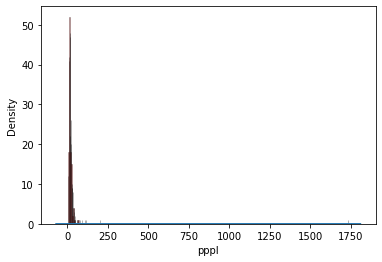

In [ ]:
import seaborn as sns
# https://hossainlab.github.io/dataviz/notebooks/SB01-Distribution%20Plots.html
%matplotlib inline
sns.distplot(df['pppl']) #,bins=5)

import matplotlib.pyplot as plt
plt.hist(df['pppl'], edgecolor='black', bins=1000 , alpha=.3, density=False, color='red')
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['pppl'] = wikipedia_pppls
print (df)
df.describe()
#df['pppl'] = [round(d) for d in vikidia_pppls]
#df.describe()


           pppl
0     16.613516
1     13.539260
2     99.087471
3     40.594799
4    127.961494
..          ...
322    5.014621
323  143.843460
324   43.368530
325   13.432104
326   33.489193

[327 rows x 1 columns]


,pppl
count,327.000000
mean,37.660686
std,36.115974
min,4.766364
25%,16.637971
50%,28.580305
75%,42.785143
max,250.676254


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


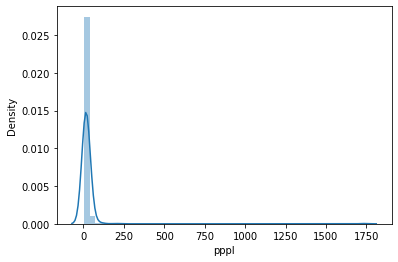

In [ ]:

import seaborn as sns
# https://hossainlab.github.io/dataviz/notebooks/SB01-Distribution%20Plots.html
%matplotlib inline
sns.distplot(df['pppl']) #,bins=5)

import matplotlib.pyplot as plt
plt.hist(df['pppl'], edgecolor='black', bins=1000 , alpha=.3, density=False, color='red')
plt.show()

In [ ]:
ljl_pppls = [3594.7068, 719.01575, 635.58997, 540.3725, 373.94168, 349.0523, 293.60245, 266.09216, 264.68723, 264.4087, 262.61377, 262.52676, 262.52676, 221.37263, 209.6756, 205.31067, 204.50714, 204.36269, 196.9827, 182.34999, 179.57753, 176.74953, 173.8362, 168.26028, 160.20071, 155.96909, 155.30116, 152.1697, 152.08344, 148.06827, 144.84465, 143.2184, 142.55627, 139.66013, 137.09326, 136.48868, 134.71843, 134.69882, 131.59201, 130.17587, 125.374886, 122.981285, 122.90491, 122.781075, 120.42085, 120.42085, 120.12613, 117.72558, 117.61297, 116.38983, 116.10879, 115.87831, 115.70052, 115.42924, 114.88222, 114.328094, 113.577484, 113.3249, 112.83202, 112.552864, 112.000084, 111.477875, 111.36658, 111.248055, 110.84657, 110.81317, 110.72851, 110.58477, 110.35464, 110.19367, 109.7669, 108.44441, 107.50835, 106.861595, 106.78657, 106.500275, 106.400795, 106.27306, 106.1628, 106.14377, 104.477234, 104.11538, 103.99689, 103.4046, 103.37118, 103.32682, 103.0437, 102.41889, 102.35006, 102.346054, 101.837585, 101.82865, 101.70098, 101.698654, 101.515656, 101.46107, 101.43949, 101.111694, 101.00255, 100.51741, 99.08383, 99.08077, 98.87744, 98.054695, 97.50658, 97.50643, 97.32458, 97.13908, 97.013306, 96.868706, 96.640976, 96.47936, 96.2113, 96.19906, 96.14054, 95.96133, 95.72482, 94.98197, 94.82579, 94.72845, 94.51738, 94.489624, 94.38205, 94.042465, 94.03233, 93.82482, 93.77469, 93.68927, 93.44607, 93.41226, 93.27663, 93.23999, 93.06228, 92.90044, 92.08282, 91.55996, 91.43599, 91.39145, 91.168205, 90.92431, 90.46715, 90.45615, 90.42893, 90.24681, 90.204475, 90.14186, 89.96671, 89.21246, 89.04416, 88.995255, 88.83994, 88.801445, 88.46191, 88.39757, 88.18067, 88.13993, 88.110985, 87.91399, 87.48318, 87.27048, 87.210915, 87.1422, 86.87753, 86.84937, 86.767456, 86.411415, 86.40042, 86.18965, 85.8366, 85.5135, 85.319176, 85.20741, 85.00105, 84.94959, 84.83968, 84.79794, 84.503494, 84.335266, 84.02383, 83.92027, 83.71413, 83.62496, 83.59828, 83.57469, 83.42399, 83.33743, 83.324394, 82.97929, 82.797905, 82.72679, 82.39716, 81.96564, 81.80243, 81.7165, 81.45049, 81.42773, 81.3836, 81.34542, 80.96224, 80.86192, 80.81097, 80.789665, 80.59036, 80.376366, 80.36878, 80.21024, 80.075226, 80.063736, 79.779434, 79.00078, 78.84828, 78.83178, 78.789246, 78.70944, 78.62194, 78.615295, 78.50015, 78.47755, 78.40016, 78.395744, 78.259796, 78.222824, 78.120544, 78.069336, 78.05943, 77.97885, 77.74458, 77.64978, 77.59655, 77.44053, 77.13346, 76.93606, 76.897766, 76.801834, 76.79872, 76.73803, 76.72914, 76.40351, 76.228065, 76.16339, 76.01874, 76.01004, 75.86624, 75.67677, 75.60915, 75.52554, 75.45154, 75.371506, 75.09463, 75.072784, 75.00029, 74.89507, 74.638916, 74.632126, 74.46871, 74.440094, 74.42497, 74.4232, 74.41426, 74.29963, 74.23252, 74.11937, 74.06959, 74.06554, 74.00111, 73.93285, 73.92626, 73.78103, 73.69401, 73.67433, 73.60769, 73.58357, 73.58228, 73.2706, 73.2187, 73.20892, 73.17841, 72.91524, 72.87794, 72.79729, 72.79389, 72.73591, 72.68456, 72.67895, 72.55633, 72.53295, 72.35929, 72.27981, 72.236496, 72.22165, 72.19469, 72.1365, 72.04128, 72.02672, 72.01209, 71.994064, 71.819786, 71.80129, 71.692154, 71.65114, 71.52409, 71.43329, 71.4057, 71.38841, 71.3222, 71.31298, 71.312035, 71.304825, 71.25968, 71.258286, 71.24763, 71.16942, 71.1666, 71.16332, 71.07467, 70.76342, 70.71313, 70.71002, 70.65506, 70.65006, 70.649124, 70.5226, 70.43657, 70.326965, 70.32568, 70.26196, 70.18201, 70.146706, 70.03495, 69.93114, 69.89576, 69.8789, 69.861, 69.644806, 69.612404, 69.605675, 69.593056, 69.48207, 69.43137, 69.40523, 69.39122, 69.32151, 69.2736, 69.12541, 69.05978, 69.01547, 68.95382, 68.91665, 68.86613, 68.840515, 68.781815, 68.74588, 68.72824, 68.62555, 68.44525, 68.37763, 68.36827, 68.35497, 68.291306, 68.26432, 68.25875, 68.22296, 68.151985, 68.13281, 68.11271, 67.98318, 67.86217, 67.84858, 67.78604, 67.71952, 67.538284, 67.48774, 67.41557, 67.2497, 67.08368, 67.08288, 67.06864, 67.05866, 67.02522, 66.99091, 66.90223, 66.891, 66.8887, 66.88, 66.7111, 66.59595, 66.59328, 66.468315, 66.452156, 66.44097, 66.372696, 66.23694, 66.15061, 66.13731, 66.08236, 66.054665, 65.974266, 65.974236, 65.96326, 65.95672, 65.87261, 65.809975, 65.74169, 65.7043, 65.673485, 65.566635, 65.56256, 65.55409, 65.547806, 65.44615, 65.341125, 65.332726, 65.2888, 65.22474, 65.177444, 65.15837, 65.0929, 65.03068, 64.94365, 64.93455, 64.923996, 64.839226, 64.80828, 64.732216, 64.723785, 64.65026, 64.50941, 64.4964, 64.4528, 64.4351, 64.17443, 63.914368, 63.865807, 63.728607, 63.69801, 63.684406, 63.53024, 63.519936, 63.48866, 63.480755, 63.389313, 63.363598, 63.3198, 63.10661, 63.051655, 62.948013, 62.771046, 62.721443, 62.61497, 62.55355, 62.362083, 62.28315, 62.25524, 62.182945, 62.17962, 62.130123, 62.07664, 62.068356, 61.93735, 61.926243, 61.91078, 61.838284, 61.80807, 61.79569, 61.737846, 61.735256, 61.722954, 61.701088, 61.685, 61.556156, 61.510323, 61.34524, 61.251114, 61.202602, 61.141342, 61.139065, 61.08594, 61.067917, 61.049545, 60.937256, 60.929436, 60.88201, 60.85644, 60.77837, 60.7249, 60.61806, 60.576015, 60.48928, 60.411537, 60.39581, 60.269714, 60.160316, 59.995937, 59.969482, 59.959675, 59.779514, 59.772415, 59.757595, 59.711105, 59.685146, 59.604656, 59.598686, 59.55789, 59.549664, 59.51224, 59.410404, 59.375088, 59.363766, 59.318546, 59.29962, 59.28447, 59.143833, 59.10529, 59.05061, 59.04903, 59.039856, 59.01956, 59.002987, 58.86133, 58.81947, 58.74592, 58.73634, 58.661606, 58.635628, 58.57867, 58.5357, 58.448902, 58.444386, 58.40639, 58.399315, 58.333992, 58.303764, 58.281807, 58.278084, 58.207153, 58.203518, 58.17746, 58.13326, 58.12112, 58.02555, 57.94302, 57.94255, 57.87945, 57.847702, 57.81383, 57.733448, 57.58083, 57.510586, 57.50392, 57.45689, 57.456673, 57.427174, 57.42148, 57.41236, 57.39933, 57.34885, 57.297028, 57.23859, 57.20721, 57.168133, 57.11522, 57.042545, 57.012856, 56.895393, 56.646133, 56.602905, 56.60131, 56.52315, 56.48929, 56.48104, 56.437428, 56.397396, 56.379116, 56.371346, 56.350517, 56.348854, 56.30088, 56.272057, 56.13283, 56.08299, 56.00963, 55.947647, 55.941994, 55.941647, 55.865784, 55.84442, 55.830734, 55.82661, 55.79973, 55.748905, 55.633766, 55.563725, 55.508713, 55.479397, 55.36531, 55.293335, 55.25135, 55.222115, 55.155483, 55.143673, 55.135475, 55.11986, 55.108295, 55.083336, 54.996414, 54.9574, 54.9573, 54.85935, 54.76317, 54.71324, 54.653187, 54.5915, 54.589764, 54.55282, 54.537163, 54.509212, 54.432835, 54.39262, 54.17279, 54.171856, 54.086666, 54.066143, 54.048332, 54.024776, 54.022976, 54.015278, 54.011948, 53.99326, 53.963646, 53.880585, 53.875137, 53.873528, 53.838333, 53.775677, 53.724648, 53.68282, 53.649925, 53.619156, 53.562336, 53.550262, 53.521, 53.514675, 53.483448, 53.404427, 53.389187, 53.369473, 53.35746, 53.351215, 53.32358, 53.31461, 53.2401, 53.209816, 53.19764, 53.13781, 53.104183, 53.057102, 53.04088, 53.038486, 53.02563, 53.011684, 52.998035, 52.979477, 52.943027, 52.93722, 52.78771, 52.78192, 52.635277, 52.615906, 52.596626, 52.527462, 52.476482, 52.46528, 52.443348, 52.424694, 52.42136, 52.380814, 52.366795, 52.364395, 52.22966, 52.19838, 52.07918, 52.07051, 52.057133, 52.033443, 51.976246, 51.965973, 51.91951, 51.884007, 51.832275, 51.724926, 51.70342, 51.69229, 51.668842, 51.63803, 51.605946, 51.521942, 51.505905, 51.46131, 51.411148, 51.32678, 51.325405, 51.31596, 51.31183, 51.271484, 51.245953, 51.243008, 51.22289, 51.16983, 51.125603, 51.077793, 51.07588, 51.06934, 51.029907, 51.019054, 51.00389, 50.999695, 50.99127, 50.962406, 50.94654, 50.9156, 50.87683, 50.869297, 50.86817, 50.852333, 50.804924, 50.769505, 50.723408, 50.691723, 50.68468, 50.666702, 50.609642, 50.571945, 50.515278, 50.47214, 50.452183, 50.32682, 50.27192, 50.24691, 50.17899, 50.14115, 50.13366, 50.07779, 50.072605, 49.989166, 49.947613, 49.946922, 49.929028, 49.83334, 49.824627, 49.797302, 49.788258, 49.77069, 49.741154, 49.717995, 49.705414, 49.65655, 49.589638, 49.508682, 49.507935, 49.472797, 49.447536, 49.44523, 49.402573, 49.39979, 49.388824, 49.255016, 49.25416, 49.25078, 49.17769, 49.13608, 49.10422, 49.05642, 49.023468, 48.98439, 48.920002, 48.89178, 48.87431, 48.869205, 48.7594, 48.743465, 48.707485, 48.676445, 48.639145, 48.56698, 48.56596, 48.468433, 48.462692, 48.442593, 48.411625, 48.262302, 48.178276, 48.135963, 48.10213, 48.073822, 48.069103, 48.039818, 47.990547, 47.98824, 47.962822, 47.8807, 47.81406, 47.8112, 47.795475, 47.77501, 47.76524, 47.72519, 47.71751, 47.673912, 47.66089, 47.636772, 47.62739, 47.491978, 47.488197, 47.46696, 47.4585, 47.435783, 47.39842, 47.379234, 47.310413, 47.279404, 47.265396, 47.241127, 47.22763, 47.225193, 47.14805, 47.131813, 47.1038, 47.093834, 47.078495, 47.022186, 47.020435, 46.988663, 46.93284, 46.92324, 46.8837, 46.857304, 46.845318, 46.809734, 46.785892, 46.758995, 46.73636, 46.734695, 46.73123, 46.72633, 46.691364, 46.685444, 46.653954, 46.61934, 46.59257, 46.553776, 46.54108, 46.537106, 46.495117, 46.426815, 46.30599, 46.290165, 46.289463, 46.2844, 46.22064, 46.214268, 46.204563, 46.16206, 46.141914, 46.10914, 46.09982, 46.073658, 46.04177, 46.03072, 46.017963, 45.989506, 45.977993, 45.96015, 45.942642, 45.904617, 45.89002, 45.88128, 45.849186, 45.831566, 45.71995, 45.696762, 45.636627, 45.62133, 45.605965, 45.583755, 45.578396, 45.544266, 45.480213, 45.473774, 45.391018, 45.372883, 45.36249, 45.357967, 45.34895, 45.344917, 45.34312, 45.26406, 45.256718, 45.16667, 45.155235, 45.15364, 45.142826, 45.09315, 45.04421, 45.02222, 44.89251, 44.864624, 44.826263, 44.810078, 44.746376, 44.73551, 44.734562, 44.698986, 44.69283, 44.633762, 44.618855, 44.595497, 44.544765, 44.52395, 44.505417, 44.48494, 44.46102, 44.45497, 44.44875, 44.43154, 44.38523, 44.36298, 44.33641, 44.227123, 44.19129, 44.146786, 44.139107, 44.122997, 44.1227, 44.11457, 44.080326, 43.970997, 43.90698, 43.898914, 43.89375, 43.87637, 43.85265, 43.83869, 43.801315, 43.772335, 43.761257, 43.748306, 43.64559, 43.60499, 43.60118, 43.503204, 43.482513, 43.458824, 43.4481, 43.440258, 43.336296, 43.332947, 43.322186, 43.29684, 43.27514, 43.267105, 43.263733, 43.25095, 43.225243, 43.177845, 43.11874, 43.07622, 43.067753, 42.986656, 42.97887, 42.95711, 42.937233, 42.925034, 42.91957, 42.88566, 42.88047, 42.87172, 42.86171, 42.825226, 42.811134, 42.79271, 42.711, 42.708405, 42.69695, 42.66933, 42.664825, 42.66213, 42.622375, 42.607838, 42.602425, 42.588306, 42.528526, 42.495403, 42.47409, 42.466362, 42.463383, 42.42124, 42.408195, 42.388424, 42.3863, 42.379086, 42.364197, 42.36361, 42.2603, 42.25371, 42.242065, 42.221413, 42.209892, 42.167713, 42.164707, 42.085106, 42.04885, 42.033844, 41.982613, 41.972263, 41.9705, 41.935318, 41.933456, 41.914963, 41.902084, 41.856934, 41.856785, 41.84392, 41.801426, 41.79364, 41.757057, 41.757, 41.753403, 41.66188, 41.658424, 41.654667, 41.64617, 41.6165, 41.59698, 41.52582, 41.52319, 41.50009, 41.47087, 41.455242, 41.451687, 41.44773, 41.432713, 41.393475, 41.387165, 41.302822, 41.270267, 41.238884, 41.174347, 41.15454, 41.100277, 41.04629, 41.03046, 41.011486, 41.0026, 40.988358, 40.966507, 40.948242, 40.862408, 40.850266, 40.794716, 40.76138, 40.744465, 40.715664, 40.709877, 40.70686, 40.70379, 40.669743, 40.65283, 40.642033, 40.62668, 40.619713, 40.611847, 40.60139, 40.586273, 40.586166, 40.56404, 40.555073, 40.509552, 40.484005, 40.479305, 40.472767, 40.344913, 40.33106, 40.330837, 40.283672, 40.24797, 40.241, 40.228977, 40.224735, 40.18027, 40.085464, 40.06146, 40.02366, 40.0001, 39.986404, 39.978928, 39.963703, 39.933903, 39.91829, 39.89789, 39.842815, 39.828224, 39.823364, 39.790348, 39.76273, 39.739433, 39.719883, 39.673393, 39.658554, 39.570637, 39.54926, 39.475883, 39.457527, 39.42095, 39.419464, 39.397175, 39.367844, 39.36416, 39.35972, 39.354977, 39.353306, 39.342293, 39.331867, 39.3147, 39.2845, 39.27798, 39.2756, 39.272717, 39.2621, 39.25176, 39.203342, 39.1974, 39.174534, 39.119602, 39.11699, 39.098305, 39.097153, 39.083744, 39.082897, 39.051155, 39.002422, 38.98897, 38.984417, 38.981117, 38.9611, 38.96034, 38.94836, 38.929424, 38.927223, 38.922268, 38.91504, 38.8893, 38.886253, 38.876785, 38.850563, 38.835613, 38.823467, 38.81358, 38.78303, 38.740902, 38.719585, 38.713753, 38.683765, 38.67321, 38.615036, 38.57509, 38.565594, 38.535545, 38.52621, 38.512234, 38.46896, 38.388294, 38.363247, 38.343605, 38.33436, 38.322533, 38.307938, 38.25023, 38.239124, 38.12973, 38.127995, 38.123314, 38.08879, 38.08208, 37.95622, 37.93979, 37.933735, 37.906425, 37.895214, 37.86847, 37.85822, 37.838127, 37.83037, 37.83037, 37.827354, 37.768845, 37.74733, 37.73072, 37.72051, 37.720455, 37.702732, 37.686764, 37.634487, 37.632534, 37.61574, 37.604107, 37.574707, 37.532215, 37.524445, 37.46928, 37.467045, 37.439594, 37.3807, 37.366577, 37.36102, 37.317505, 37.299084, 37.292038, 37.279316, 37.238247, 37.238075, 37.20792, 37.17238, 37.151196, 37.10629, 37.086174, 37.08181, 37.08057, 37.053635, 37.04927, 37.04853, 37.028748, 36.873817, 36.841393, 36.834377, 36.796825, 36.79522, 36.748543, 36.69742, 36.684727, 36.656662, 36.615566, 36.550648, 36.543064, 36.529705, 36.50691, 36.487644, 36.473373, 36.47094, 36.46964, 36.436638, 36.417847, 36.391647, 36.389812, 36.319355, 36.30003, 36.27316, 36.250748, 36.220753, 36.16545, 36.15636, 36.120308, 36.087242, 36.080147, 36.07385, 36.066933, 36.05477, 36.05103, 35.982445, 35.98, 35.972588, 35.919506, 35.89985, 35.876045, 35.846527, 35.80513, 35.751797, 35.748104, 35.735382, 35.724285, 35.716984, 35.70801, 35.70408, 35.684235, 35.682728, 35.650192, 35.634117, 35.551785, 35.54854, 35.545536, 35.538452, 35.52735, 35.501793, 35.460003, 35.452515, 35.441673, 35.39429, 35.390827, 35.38841, 35.366764, 35.33306, 35.331924, 35.263004, 35.261055, 35.233746, 35.20758, 35.190403, 35.176426, 35.062904, 35.00123, 34.991608, 34.976955, 34.97581, 34.973434, 34.96353, 34.94448, 34.933346, 34.903107, 34.868473, 34.83551, 34.80887, 34.787148, 34.772663, 34.756786, 34.749905, 34.7402, 34.72691, 34.697563, 34.68886, 34.672253, 34.654472, 34.639305, 34.62754, 34.622086, 34.608173, 34.60351, 34.57189, 34.539505, 34.538025, 34.52563, 34.50572, 34.490955, 34.47673, 34.342228, 34.322266, 34.253845, 34.244328, 34.221756, 34.18948, 34.152676, 34.135826, 34.103603, 34.080727, 34.0728, 34.059025, 34.035736, 33.996693, 33.98473, 33.978798, 33.965195, 33.91855, 33.8993, 33.88906, 33.85937, 33.827766, 33.827106, 33.79596, 33.767647, 33.759876, 33.753284, 33.731724, 33.724964, 33.720978, 33.67748, 33.63421, 33.614113, 33.595276, 33.58191, 33.566124, 33.535744, 33.523224, 33.463245, 33.45697, 33.447365, 33.439236, 33.41471, 33.409435, 33.34598, 33.269382, 33.253647, 33.13735, 33.13166, 33.131245, 33.118233, 33.110367, 33.10635, 33.08939, 33.05528, 32.99153, 32.933773, 32.89203, 32.89168, 32.87981, 32.84923, 32.849075, 32.82699, 32.806282, 32.796394, 32.795483, 32.79159, 32.761887, 32.757366, 32.752018, 32.72463, 32.715836, 32.684868, 32.675854, 32.67391, 32.671562, 32.66455, 32.6616, 32.63589, 32.62905, 32.627987, 32.595448, 32.56712, 32.55421, 32.493057, 32.493046, 32.466564, 32.42181, 32.38126, 32.34949, 32.343033, 32.31182, 32.30951, 32.275486, 32.27171, 32.26076, 32.222862, 32.208725, 32.162834, 32.151184, 32.139378, 32.13135, 32.105434, 32.055965, 32.027927, 32.02618, 32.02464, 31.97401, 31.959452, 31.919968, 31.861296, 31.84485, 31.814548, 31.811274, 31.771498, 31.766685, 31.719053, 31.70982, 31.692375, 31.673616, 31.66908, 31.654568, 31.60154, 31.575558, 31.544113, 31.543991, 31.438044, 31.405254, 31.389519, 31.365183, 31.35948, 31.358154, 31.343178, 31.330336, 31.270111, 31.268196, 31.26801, 31.266855, 31.248863, 31.231, 31.212383, 31.186255, 31.181688, 31.164555, 31.160023, 31.137514, 31.134457, 31.122389, 31.082258, 31.0713, 31.013216, 30.98285, 30.976202, 30.967583, 30.953691, 30.942858, 30.90435, 30.900917, 30.883085, 30.88047, 30.855915, 30.851421, 30.844103, 30.800186, 30.776375, 30.745888, 30.727346, 30.726572, 30.70992, 30.708069, 30.674374, 30.648676, 30.642935, 30.616367, 30.615252, 30.544779, 30.527946, 30.52488, 30.440233, 30.416658, 30.40953, 30.384077, 30.342813, 30.307684, 30.301535, 30.29391, 30.288923, 30.281805, 30.258755, 30.25146, 30.244333, 30.230011, 30.222273, 30.176397, 30.13319, 30.112743, 30.07278, 30.070145, 30.02468, 30.005753, 29.976679, 29.97077, 29.952953, 29.952705, 29.944963, 29.925098, 29.87163, 29.827444, 29.816607, 29.796318, 29.703365, 29.690693, 29.669634, 29.665049, 29.64601, 29.621931, 29.619747, 29.616173, 29.575928, 29.527973, 29.473316, 29.40731, 29.361853, 29.34904, 29.334501, 29.324497, 29.31076, 29.295801, 29.243814, 29.234537, 29.215172, 29.203772, 29.179544, 29.168032, 29.125027, 29.08115, 29.005487, 28.970194, 28.94635, 28.915096, 28.902437, 28.875326, 28.825651, 28.806614, 28.798353, 28.794884, 28.783175, 28.773542, 28.715446, 28.684696, 28.674236, 28.670528, 28.65266, 28.643932, 28.63567, 28.611998, 28.604654, 28.551004, 28.54381, 28.506094, 28.491161, 28.490406, 28.434837, 28.426382, 28.35362, 28.337725, 28.318268, 28.300629, 28.24005, 28.239496, 28.21923, 28.207245, 28.20124, 28.196856, 28.195726, 28.132427, 28.10643, 28.057163, 28.031536, 28.027538, 28.019936, 27.992212, 27.91401, 27.897337, 27.89024, 27.8891, 27.84165, 27.802938, 27.7587, 27.757906, 27.689814, 27.689678, 27.68451, 27.653101, 27.632778, 27.625643, 27.620216, 27.562721, 27.559757, 27.548687, 27.543518, 27.53581, 27.513103, 27.51218, 27.49416, 27.484238, 27.47035, 27.463703, 27.408575, 27.404057, 27.349953, 27.340149, 27.320042, 27.292345, 27.290321, 27.225504, 27.2052, 27.203741, 27.198664, 27.193398, 27.143688, 27.140474, 27.09619, 27.08035, 27.053864, 27.03563, 26.921253, 26.825397, 26.792664, 26.7562, 26.717113, 26.71386, 26.70774, 26.678999, 26.669798, 26.640396, 26.629208, 26.611866, 26.581398, 26.568703, 26.524973, 26.520205, 26.493984, 26.48511, 26.477787, 26.397512, 26.374836, 26.374535, 26.374485, 26.345993, 26.322536, 26.311214, 26.286608, 26.276798, 26.267443, 26.19238, 26.191246, 26.16163, 26.14042, 26.12045, 26.119627, 26.083303, 26.04719, 26.045605, 26.020624, 26.002436, 25.97137, 25.951921, 25.929241, 25.915762, 25.838118, 25.823935, 25.79007, 25.780848, 25.779408, 25.768667, 25.75341, 25.685837, 25.681555, 25.619102, 25.612066, 25.56258, 25.549177, 25.536072, 25.510178, 25.413746, 25.384941, 25.340815, 25.313557, 25.30561, 25.305202, 25.297161, 25.271255, 25.261974, 25.247131, 25.238794, 25.22922, 25.22454, 25.191525, 25.073076, 25.06726, 25.057133, 25.056002, 25.028397, 24.991837, 24.962883, 24.889496, 24.86364, 24.8194, 24.791752, 24.780993, 24.770058, 24.678574, 24.662092, 24.654346, 24.648859, 24.623457, 24.583967, 24.566183, 24.563314, 24.55414, 24.51565, 24.5135, 24.510916, 24.49852, 24.474222, 24.462397, 24.462349, 24.448067, 24.428524, 24.413815, 24.40884, 24.381222, 24.343428, 24.284264, 24.27273, 24.212801, 24.178202, 24.175343, 24.142859, 24.1343, 24.101822, 24.073235, 24.071053, 24.050201, 24.039062, 24.028973, 24.016714, 24.01334, 23.99849, 23.823494, 23.808825, 23.78313, 23.746483, 23.720022, 23.646652, 23.635904, 23.617775, 23.605228, 23.574087, 23.55562, 23.5543, 23.548647, 23.545113, 23.539478, 23.521873, 23.511322, 23.23102, 23.148981, 23.134789, 23.133963, 23.052889, 23.0362, 23.034775, 23.033287, 23.032227, 22.987606, 22.962122, 22.888678, 22.886047, 22.883339, 22.831732, 22.816998, 22.803497, 22.778076, 22.770082, 22.746946, 22.512182, 22.511791, 22.510315, 22.500662, 22.49741, 22.431858, 22.344936, 22.342045, 22.21169, 22.196283, 22.069502, 22.03605, 21.965107, 21.935318, 21.910145, 21.832659, 21.831205, 21.753042, 21.730907, 21.7099, 21.709806, 21.686764, 21.6763, 21.66018, 21.65516, 21.648851, 21.591293, 21.584944, 21.540909, 21.509132, 21.497044, 21.473686, 21.4332, 21.423637, 21.375875, 21.306053, 21.299166, 21.255032, 21.20882, 21.19166, 21.163803, 21.140116, 20.99464, 20.993694, 20.97828, 20.968058, 20.965649, 20.962542, 20.940195, 20.860304, 20.789494, 20.753742, 20.743834, 20.730192, 20.726593, 20.669216, 20.648462, 20.58602, 20.584837, 20.501802, 20.375132, 20.3018, 20.273306, 20.267824, 20.23763, 20.230085, 20.224415, 20.060286, 20.004158, 19.99952, 19.964937, 19.952715, 19.952274, 19.91638, 19.834167, 19.817505, 19.81358, 19.698866, 19.673594, 19.669811, 19.620855, 19.591839, 19.566105, 19.554499, 19.500183, 19.473671, 19.424976, 19.418652, 19.386911, 19.368492, 19.356438, 19.347935, 19.34495, 19.31179, 19.302353, 19.28277, 19.25112, 19.201626, 19.156763, 19.105148, 19.053839, 19.036587, 19.016138, 18.993261, 18.98569, 18.830793, 18.813396, 18.808615, 18.703547, 18.672281, 18.669952, 18.614347, 18.546326, 18.524067, 18.467447, 18.424698, 18.374857, 18.373547, 18.248615, 18.172617, 18.156788, 18.146109, 18.06539, 18.041712, 18.004383, 17.962317, 17.882011, 17.815516, 17.805248, 17.75241, 17.723911, 17.71694, 17.58563, 17.503614, 17.499237, 17.287909, 17.172003, 17.155598, 17.041843, 16.89696, 16.892242, 16.881351, 16.862625, 16.843594, 16.732824, 16.661907, 16.591381, 16.58691, 16.445171, 16.265488, 16.2148, 16.148733, 16.126028, 16.086353, 16.016026, 15.972591, 15.688681, 15.631053, 15.536364, 15.527981, 15.476668, 15.454062, 15.327189, 15.316862, 15.239812, 15.195633, 15.167585, 15.135726, 15.0558405, 15.051717, 15.014191, 14.962005, 14.947382, 14.878097, 14.861841, 14.733875, 14.674793, 14.651678, 14.631845, 14.629945, 14.584758, 14.580759, 14.547329, 14.531475, 14.436336, 14.239628, 14.121076, 14.063749, 14.00315, 13.988704, 13.823531, 13.690734, 13.641117, 13.5893135, 13.319053, 13.26828, 13.167375, 13.078256, 12.992317, 12.941191, 12.698249, 12.682141, 12.601227, 12.588854, 12.56379, 12.517898, 12.293437, 12.227531, 12.139319, 12.0980625, 11.965474, 11.848193, 11.573447, 11.382659, 10.259041, 9.915282, 9.58496, 9.386069, 9.354426, 9.319956, 9.141924, 9.123788, 8.945671, 8.578872, 8.316286, 8.033029, 7.609985, 7.3754344, 7.3459435, 6.936665, 4.7183886]

bb_pppls = [10240.533, 10240.522, 10214.529, 9591.875, 9364.042, 8740.809, 7251.1475, 6820.716, 6448.517, 6347.0947, 6209.0825, 6172.4014, 5760.602, 5721.385, 5672.8555, 5545.483, 5533.903, 5185.6323, 4974.9604, 4890.8994, 4878.0894, 4580.212, 4564.5356, 4458.756, 4229.7866, 4175.313, 4152.666, 4069.9312, 3917.7153, 3888.462, 3878.5217, 3723.8315, 3715.3572, 3640.2065, 3518.6492, 3490.112, 3464.2961, 3448.6812, 3373.081, 3188.776, 3163.6255, 3163.336, 3147.3152, 3098.9104, 3059.9316, 3016.5767, 3012.463, 2993.0645, 2967.2998, 2966.3318, 2937.0984, 2907.542, 2854.476, 2788.84, 2689.1125, 2686.398, 2666.7217, 2603.0112, 2581.027, 2567.4387, 2538.3381, 2521.6646, 2495.98, 2477.7542, 2475.5764, 2474.867, 2387.0396, 2379.8489, 2333.393, 2314.571, 2311.4575, 2305.3816, 2270.3066, 2243.7603, 2241.378, 2216.6072, 2190.4038, 2186.8188, 2186.2412, 2184.597, 2176.5469, 2174.0698, 2156.0908, 2136.1226, 2126.7832, 2104.2156, 2084.551, 2081.2297, 2072.8972, 2069.0222, 2050.5698, 2044.3431, 2005.0927, 1992.8483, 1981.6532, 1953.3779, 1926.5197, 1924.3263, 1907.753, 1887.9731, 1876.0475, 1875.6907, 1874.1279, 1859.5096, 1843.6335, 1838.6372, 1828.3016, 1726.5167, 1724.7583, 1719.702, 1694.1785, 1669.3552, 1668.8226, 1659.5128, 1647.2072, 1620.0055, 1599.8413, 1593.2456, 1576.1592, 1571.9268, 1541.942, 1536.2256, 1518.4576, 1517.2677, 1506.3823, 1493.8993, 1493.113, 1469.7338, 1462.3811, 1456.6431, 1455.6672, 1449.5754, 1448.9971, 1447.7505, 1420.389, 1412.3391, 1400.3203, 1395.9448, 1395.7765, 1383.0364, 1372.9877, 1318.2672, 1316.9937, 1310.5988, 1309.1927, 1300.7549, 1289.7957, 1276.614, 1272.38, 1270.2261, 1240.214, 1215.9838, 1212.1675, 1210.2172, 1209.6437, 1197.4381, 1184.4214, 1178.1106, 1165.5729, 1156.0248, 1155.4362, 1147.9467, 1139.4858, 1129.8655, 1120.0479, 1112.3867, 1109.5339, 1094.3436, 1074.4423, 1072.0503, 1046.4406, 1042.3416, 1037.9397, 1028.0059, 1008.2754, 1001.7009, 941.8383, 930.25543, 925.66956, 920.75665, 920.21497, 890.0384, 881.3859, 878.2466, 876.72516, 835.6521, 828.97974, 819.8354, 812.5982, 807.26086, 804.8207, 794.70715, 788.7021, 788.4464, 786.7527, 786.3416, 767.7726, 766.92163, 753.8436, 735.6095, 721.8526, 720.6654, 712.9282, 707.23413, 694.7999, 693.5094, 685.0818, 684.1837, 680.49536, 677.895, 677.0496, 676.50684, 673.3439, 670.2386, 653.6444, 651.8802, 641.5537, 640.1936, 631.0811, 629.44385, 629.08856, 622.0017, 608.18787, 607.831, 605.3455, 603.39105, 599.5965, 588.2937, 574.0727, 569.09503, 567.9868, 560.89813, 555.04956, 550.1037, 548.97955, 546.01276, 541.477, 540.42944, 536.5942, 534.22015, 524.6769, 517.51587, 510.21112, 510.18048, 507.2033, 505.80417, 505.5064, 504.15933, 503.41705, 502.2704, 484.6788, 483.41724, 478.6191, 475.49673, 471.87628, 466.70425, 463.63263, 462.47073, 458.00504, 454.51126, 450.24966, 448.44406, 442.74866, 438.7137, 426.50153, 415.5078, 412.44577, 409.8733, 406.5739, 396.54025, 392.01666, 388.02286, 376.66043, 367.60663, 364.45312, 360.99326, 359.5864, 348.13406, 347.7328, 339.07956, 327.8544, 326.95175, 325.1154, 323.7446, 322.549, 319.35657, 318.24414, 314.74744, 306.42535, 303.82248, 297.09494, 283.66495, 280.71866, 279.7783, 278.32697, 275.56012, 271.5546, 270.71912, 269.84055, 266.2785, 261.05002, 260.60626, 260.15222, 259.99557, 250.15419, 248.54536, 244.29788, 243.36366, 242.26096, 241.03394, 238.69756, 236.92325, 234.38039, 229.26682, 226.09174, 224.15521, 221.157, 216.47815, 212.7181, 210.15154, 209.27763, 208.95027, 206.2766, 205.074, 193.55959, 192.39114, 190.52846, 190.43645, 189.20024, 188.85378, 188.38614, 185.06708, 183.39656, 182.94492, 182.1402, 179.34375, 178.13383, 175.8231, 175.7796, 175.30458, 175.08478, 173.75323, 172.64403, 169.29016, 166.22856, 166.0626, 165.13516, 164.01454, 163.78969, 161.81256, 161.4685, 160.2157, 158.1186, 157.24649, 156.25397, 155.65096, 155.41933, 155.4017, 154.64468, 154.25243, 154.00293, 152.77437, 152.42743, 151.99847, 151.81233, 151.43404, 151.01128, 150.378, 148.0596, 146.61809, 146.44145, 146.30435, 146.18477, 146.09496, 145.53883, 144.98741, 143.92642, 143.2337, 141.22227, 139.41621, 139.36104, 138.97144, 138.34189, 137.37465, 137.1149, 137.08803, 135.24098, 134.20805, 133.38777, 133.31566, 132.75572, 132.51128, 132.3572, 131.88531, 131.34409, 130.39482, 129.83035, 129.73622, 128.88126, 128.66725, 128.63954, 128.4148, 128.07979, 127.99579, 127.96228, 127.491615, 127.38928, 127.064964, 127.036, 126.82362, 126.523415, 126.21742, 126.01753, 125.86872, 125.84603, 125.4342, 125.37387, 124.64254, 124.52236, 124.51345, 124.42941, 123.61772, 123.57059, 123.037186, 122.8435, 122.41395, 121.95194, 120.96805, 120.74441, 120.397255, 120.33883, 119.471085, 119.04192, 118.27593, 118.19468, 118.12059, 117.931725, 117.68578, 117.39512, 117.38959, 117.35314, 117.34699, 116.88124, 116.71133, 116.31814, 115.85063, 115.75737, 115.70566, 115.47466, 115.214066, 114.62182, 114.10393, 114.01424, 112.995316, 112.88261, 112.19209, 112.18694, 111.96175, 111.83854, 111.829475, 111.73269, 111.717445, 111.46241, 111.42936, 111.33116, 110.997894, 110.85853, 110.6382, 110.55572, 110.23808, 109.61401, 109.52859, 109.436386, 109.33499, 109.18641, 109.16002, 108.89804, 108.79419, 108.78604, 108.55044, 108.40622, 108.13203, 107.75134, 107.52249, 107.47733, 107.36162, 107.36162, 107.36162, 107.36162, 107.36162, 107.36162, 107.24573, 107.138596, 106.99156, 106.948364, 106.87429, 106.58801, 106.4334, 106.36143, 106.24939, 106.133896, 105.926704, 105.79283, 105.34, 105.244705, 105.23145, 104.93251, 104.8279, 104.66227, 104.54995, 104.321014, 103.99223, 103.99168, 103.91609, 103.77497, 103.76755, 103.535255, 103.28603, 103.23291, 103.05324, 102.73467, 102.72522, 102.537056, 102.28068, 102.07575, 101.96781, 101.88086, 101.848114, 101.26777, 101.23567, 101.220375, 101.154076, 101.045265, 101.03279, 100.8903, 100.65752, 100.5248, 100.399765, 100.39891, 100.38832, 100.24487, 100.159164, 100.158966, 99.991234, 99.579796, 99.55658, 99.554825, 99.32983, 99.25336, 98.91063, 98.84666, 98.84203, 98.65364, 98.49683, 98.397736, 98.26003, 98.16305, 98.157616, 97.885864, 97.7041, 97.18541, 97.150795, 97.14788, 96.78505, 96.6519, 96.588974, 96.4958, 96.40119, 96.324646, 96.170715, 95.75244, 95.73692, 95.685165, 95.52984, 95.40252, 95.1096, 95.10601, 95.01929, 94.95811, 94.93837, 94.89116, 94.79157, 94.75045, 94.70862, 94.692955, 94.65382, 94.544205, 94.47904, 94.16034, 94.152306, 94.06681, 94.02601, 93.92393, 93.736374, 93.584305, 93.51057, 93.49375, 93.41694, 93.40353, 93.31463, 93.266975, 93.1938, 93.117226, 93.02451, 93.01458, 92.87546, 92.789055, 92.64683, 92.61335, 92.503365, 92.50036, 92.338806, 92.33867, 92.12889, 92.05814, 92.00895, 91.9518, 91.72762, 91.59461, 91.574745, 91.37742, 91.31923, 91.31469, 91.25481, 91.15403, 91.09772, 90.98025, 90.910255, 90.851105, 90.79502, 90.76632, 90.73214, 90.646904, 90.61613, 90.54283, 90.52933, 90.526, 90.3209, 90.22688, 90.1819, 90.151886, 90.09529, 90.080894, 89.99816, 89.90157, 89.86942, 89.81819, 89.75991, 89.72607, 89.64879, 89.35487, 89.30635, 89.133286, 89.11849, 89.04497, 89.03593, 88.86245, 88.675186, 88.648346, 88.6087, 88.59513, 88.55197, 88.1776, 88.16234, 87.58903, 87.53551, 87.47401, 87.464035, 87.355125, 87.325134, 87.106384, 87.088486, 87.04294, 87.03921, 86.931694, 86.78259, 86.549934, 86.51911, 86.42724, 86.30653, 86.23116, 86.15148, 86.1415, 86.00844, 85.854324, 85.839966, 85.8039, 85.760254, 85.646774, 85.34465, 85.140274, 85.09579, 84.943886, 84.87769, 84.82807, 84.55645, 84.5149, 84.501595, 84.47259, 84.35856, 84.340256, 84.33116, 84.32726, 84.2266, 84.18099, 84.16128, 84.1273, 84.03993, 83.979355, 83.951904, 83.85955, 83.81219, 83.80406, 83.72842, 83.72801, 83.56218, 83.51649, 83.48439, 83.44305, 83.39932, 83.35671, 83.29901, 83.29322, 83.234764, 83.222824, 83.20731, 83.17066, 83.14271, 83.06009, 83.014786, 82.89612, 82.76242, 82.74064, 82.69035, 82.60657, 82.58499, 82.56892, 82.52779, 82.46434, 82.46033, 82.407295, 82.404465, 82.39629, 82.37339, 82.355644, 82.30664, 82.24164, 82.23258, 82.1267, 82.083755, 82.05682, 82.00571, 81.99323, 81.99218, 81.983925, 81.97908, 81.97779, 81.860214, 81.80859, 81.661964, 81.628136, 81.619225, 81.554214, 81.54026, 81.476555, 81.41895, 81.35062, 81.266365, 81.16568, 81.11902, 81.11484, 81.091324, 81.08147, 81.0604, 80.972664, 80.86038, 80.797134, 80.78177, 80.73456, 80.68817, 80.65887, 80.567764, 80.54388, 80.48137, 80.45298, 80.39131, 80.367516, 80.29891, 80.27177, 80.22413, 80.1462, 80.04338, 79.958206, 79.932625, 79.93023, 79.91951, 79.9058, 79.8904, 79.872314, 79.83066, 79.70525, 79.59799, 79.52481, 79.25176, 79.23166, 79.1746, 79.136696, 79.1339, 79.12983, 79.08355, 79.01502, 78.76697, 78.76693, 78.70081, 78.67504, 78.66044, 78.62239, 78.560814, 78.48328, 78.47448, 78.31941, 78.27431, 78.262184, 78.22726, 78.1493, 78.11376, 78.07823, 78.07253, 78.060074, 78.04552, 78.016266, 78.009384, 77.98492, 77.91838, 77.84911, 77.78756, 77.71441, 77.67854, 77.63245, 77.61169, 77.598694, 77.58911, 77.53611, 77.45659, 77.45412, 77.37217, 77.343285, 77.343285, 77.30218, 77.290634, 77.23803, 77.223694, 77.19351, 77.184166, 77.12081, 77.1153, 77.079185, 77.04193, 77.02915, 76.9645, 76.93536, 76.90371, 76.81956, 76.806404, 76.76496, 76.726135, 76.72244, 76.61277, 76.535614, 76.52292, 76.46346, 76.45515, 76.382195, 76.35296, 76.34145, 76.29312, 76.267006, 76.258026, 76.1756, 76.068634, 76.06188, 75.96561, 75.94138, 75.92267, 75.91677, 75.892624, 75.88165, 75.811134, 75.799385, 75.73056, 75.72258, 75.71929, 75.627464, 75.57931, 75.563225, 75.53564, 75.47475, 75.464676, 75.45039, 75.43827, 75.433556, 75.339226, 75.31394, 75.225716, 75.10451, 75.02197, 74.92341, 74.914185, 74.904045, 74.88751, 74.80724, 74.751366, 74.749405, 74.68375, 74.65711, 74.650276, 74.63326, 74.57489, 74.550606, 74.41575, 74.36336, 74.324394, 74.28322, 74.22951, 74.101036, 74.041595, 73.95944, 73.89004, 73.88267, 73.88246, 73.75722, 73.75666, 73.75092, 73.73664, 73.5735, 73.57239, 73.56582, 73.53208, 73.50156, 73.400154, 73.36297, 73.31369, 73.26686, 73.24188, 73.232285, 73.102844, 73.080536, 73.06339, 72.98627, 72.98495, 72.96821, 72.82048, 72.816, 72.81198, 72.76258, 72.60576, 72.55101, 72.50511, 72.46201, 72.453476, 72.40371, 72.34342, 72.17476, 72.15762, 72.082275, 72.0729, 72.062546, 72.021355, 72.00883, 71.97374, 71.94125, 71.92743, 71.915665, 71.87593, 71.87466, 71.84365, 71.77692, 71.765656, 71.752754, 71.736336, 71.71308, 71.70939, 71.69663, 71.60684, 71.59953, 71.58656, 71.565544, 71.5331, 71.46795, 71.44719, 71.419975, 71.38321, 71.37473, 71.3507, 71.34666, 71.31829, 71.27858, 71.27722, 71.24919, 71.21366, 71.17, 71.13044, 71.11759, 71.11128, 71.09257, 71.086334, 71.060196, 71.0584, 71.03297, 70.97947, 70.92686, 70.925125, 70.907715, 70.898254, 70.85992, 70.8459, 70.819595, 70.790184, 70.67591, 70.65057, 70.64946, 70.587776, 70.57438, 70.56374, 70.5483, 70.532295, 70.513054, 70.49886, 70.49228, 70.478836, 70.46482, 70.4624, 70.442444, 70.42415, 70.40696, 70.27779, 70.26652, 70.17578, 69.96278, 69.95425, 69.91723, 69.83479, 69.63767, 69.63648, 69.51559, 69.48099, 69.41432, 69.3304, 69.32025, 69.21931, 69.15043, 69.13378, 69.055824, 69.048485, 69.04829, 69.03726, 68.9906, 68.90935, 68.86717, 68.852234, 68.825714, 68.8162, 68.798645, 68.78989, 68.75702, 68.68356, 68.60752, 68.4367, 68.3941, 68.23315, 68.23299, 68.18182, 68.17246, 68.16583, 68.15075, 68.11176, 68.09621, 68.02863, 67.988655, 67.952484, 67.94895, 67.92384, 67.90431, 67.88308, 67.86111, 67.849556, 67.70296, 67.694466, 67.6362, 67.616844, 67.590965, 67.57827, 67.54746, 67.53854, 67.5115, 67.48012, 67.45969, 67.447174, 67.41293, 67.354294, 67.3532, 67.328064, 67.28842, 67.27646, 67.23579, 67.204575, 67.19742, 67.189606, 67.15982, 67.05953, 67.04597, 67.03354, 66.978676, 66.9576, 66.94739, 66.94005, 66.92246, 66.871956, 66.868355, 66.84005, 66.83205, 66.82488, 66.82488, 66.793465, 66.67055, 66.667305, 66.66371, 66.64833, 66.63345, 66.62997, 66.62936, 66.61357, 66.52301, 66.51778, 66.43404, 66.40508, 66.401024, 66.382286, 66.38092, 66.35441, 66.34463, 66.29473, 66.288155, 66.28787, 66.22674, 66.222, 66.21963, 66.20063, 66.152405, 66.13963, 66.10641, 66.06761, 66.02512, 66.01354, 65.989716, 65.97408, 65.91178, 65.90805, 65.88159, 65.857155, 65.837814, 65.82952, 65.78092, 65.74571, 65.712135, 65.67852, 65.67304, 65.65889, 65.608376, 65.5636, 65.55725, 65.518776, 65.51425, 65.44072, 65.434235, 65.39054, 65.38645, 65.36176, 65.3487, 65.28781, 65.26602, 65.24969, 65.23792, 65.213165, 65.19495, 65.13699, 65.10936, 65.0931, 65.08642, 65.07273, 65.06641, 64.96603, 64.87826, 64.85716, 64.85441, 64.84736, 64.74394, 64.70991, 64.706635, 64.67492, 64.67341, 64.6284, 64.59996, 64.56554, 64.53768, 64.50199, 64.50043, 64.50036, 64.497955, 64.47573, 64.46952, 64.45725, 64.45719, 64.44773, 64.436844, 64.43375, 64.42607, 64.39375, 64.38092, 64.354706, 64.27126, 64.19185, 64.19133, 64.1435, 64.13653, 64.13059, 64.10712, 64.09776, 64.04299, 64.00757, 63.97605, 63.966957, 63.92982, 63.90385, 63.900043, 63.882977, 63.87159, 63.85405, 63.85322, 63.83524, 63.834568, 63.742527, 63.735992, 63.732403, 63.731007, 63.693546, 63.67041, 63.6389, 63.630558, 63.584366, 63.539024, 63.51412, 63.51291, 63.469524, 63.457, 63.452404, 63.41242, 63.396786, 63.354202, 63.346737, 63.29595, 63.289467, 63.280773, 63.265835, 63.25622, 63.23915, 63.226723, 63.21189, 63.20409, 63.128757, 63.048046, 63.04753, 63.046455, 63.035305, 63.030766, 62.98785, 62.981785, 62.952244, 62.944565, 62.937393, 62.937363, 62.897488, 62.885822, 62.88558, 62.85614, 62.83885, 62.831055, 62.808804, 62.80554, 62.78622, 62.757072, 62.755695, 62.755516, 62.73924, 62.69761, 62.6581, 62.655975, 62.64848, 62.60727, 62.605415, 62.469677, 62.467205, 62.46568, 62.4273, 62.414864, 62.391468, 62.38085, 62.37728, 62.36779, 62.35147, 62.346504, 62.34641, 62.275433, 62.275375, 62.267593, 62.246307, 62.214855, 62.19979, 62.18152, 62.16124, 62.104683, 62.098965, 62.098637, 62.06001, 62.020187, 61.985718, 61.963345, 61.959915, 61.949844, 61.9279, 61.92362, 61.922054, 61.857277, 61.827614, 61.82157, 61.799137, 61.798462, 61.783173, 61.7776, 61.73744, 61.729134, 61.7183, 61.696384, 61.692764, 61.67091, 61.66582, 61.605247, 61.55941, 61.524754, 61.514492, 61.513195, 61.484604, 61.478184, 61.478043, 61.455967, 61.43499, 61.395866, 61.349915, 61.349247, 61.328915, 61.315792, 61.257317, 61.244755, 61.21375, 61.17438, 61.158722, 61.152596, 61.10977, 61.08088, 61.019653, 61.008392, 61.00755, 61.000458, 60.994434, 60.844807, 60.795273, 60.742558, 60.69748, 60.696064, 60.690155, 60.636356, 60.609127, 60.577545, 60.575176, 60.570095, 60.5692, 60.565937, 60.54451, 60.541996, 60.531864, 60.51648, 60.51334, 60.464478, 60.464134, 60.422714, 60.31361, 60.29835, 60.26609, 60.259193, 60.249428, 60.23487, 60.21499, 60.198483, 60.19619, 60.18379, 60.064266, 60.060947, 60.040386, 60.012905, 60.00264, 59.99428, 59.986786, 59.97944, 59.95036, 59.94922, 59.94896, 59.894493, 59.882275, 59.866882, 59.859177, 59.838375, 59.812927, 59.80814, 59.791286, 59.77244, 59.721363, 59.692005, 59.684834, 59.682243, 59.67806, 59.64918, 59.64008, 59.63269, 59.618927, 59.59176, 59.584084, 59.553154, 59.519398, 59.50674, 59.487846, 59.481148, 59.48112, 59.469894, 59.4587, 59.416073, 59.414, 59.40525, 59.353207, 59.272743, 59.232285, 59.216385, 59.190155, 59.16558, 59.068913, 59.027973, 59.02384, 59.01945, 59.017933, 58.996914, 58.97762, 58.946495, 58.93151, 58.89005, 58.88997, 58.888927, 58.877216, 58.86473, 58.859703, 58.8558, 58.839504, 58.839077, 58.80413, 58.729195, 58.717182, 58.699493, 58.68976, 58.669273, 58.635292, 58.60242, 58.58971, 58.56728, 58.55647, 58.51672, 58.448654, 58.44536, 58.404633, 58.40394, 58.394413, 58.37907, 58.355717, 58.294647, 58.290226, 58.27647, 58.250134, 58.239384, 58.197243, 58.19458, 58.15605, 58.151863, 58.13567, 58.13176, 58.10477, 58.094433, 58.061504, 58.049522, 58.00395, 57.967728, 57.93479, 57.929485, 57.92921, 57.90563, 57.901592, 57.889362, 57.835613, 57.790985, 57.732567, 57.69134, 57.673187, 57.644352, 57.60739, 57.606342, 57.603653, 57.597225, 57.58207, 57.579323, 57.540874, 57.520683, 57.498306, 57.480072, 57.459465, 57.45136, 57.445496, 57.423424, 57.396343, 57.357304, 57.292084, 57.272858, 57.271404, 57.271297, 57.265697, 57.262997, 57.25202, 57.250874, 57.242577, 57.217087, 57.20738, 57.190277, 57.18823, 57.168682, 57.161976, 57.12813, 57.121155, 57.091072, 57.0844, 57.080345, 57.05806, 57.0237, 57.020874, 57.018837, 56.99603, 56.993046, 56.96378, 56.956306, 56.94124, 56.933334, 56.916695, 56.911243, 56.90644, 56.905952, 56.905518, 56.8756, 56.816994, 56.80396, 56.791996, 56.781807, 56.761673, 56.754444, 56.751335, 56.745815, 56.743107, 56.725925, 56.724686, 56.72347, 56.65335, 56.650024, 56.64381, 56.616703, 56.611683, 56.60944, 56.609413, 56.586903, 56.54531, 56.520588, 56.467525, 56.46413, 56.461815, 56.431698, 56.43129, 56.420853, 56.419403, 56.40262, 56.350113, 56.32639, 56.32569, 56.314148, 56.306465, 56.30499, 56.303703, 56.26028, 56.256016, 56.23169, 56.231445, 56.230667, 56.224583, 56.181488, 56.175037, 56.0908, 56.078953, 56.075985, 56.0708, 56.069492, 56.069492, 55.999084, 55.968918, 55.931004, 55.92597, 55.887043, 55.88094, 55.845913, 55.838905, 55.819294, 55.79574, 55.778873, 55.76188, 55.76135, 55.726982, 55.65483, 55.646732, 55.579803, 55.561626, 55.549065, 55.54409, 55.52643, 55.4645, 55.456226, 55.453846, 55.431614, 55.414383, 55.406982, 55.394566, 55.346992, 55.286694, 55.280495, 55.27114, 55.26716, 55.22596, 55.173218, 55.1492, 55.139206, 55.080032, 55.058445, 55.050064, 54.975464, 54.96841, 54.9562, 54.93723, 54.93178, 54.920464, 54.899597, 54.88143, 54.87761, 54.86534, 54.85857, 54.839558, 54.837044, 54.835815, 54.818035, 54.801205, 54.772835, 54.763405, 54.762936, 54.750168, 54.66614, 54.624943, 54.59836, 54.590523, 54.566032, 54.523857, 54.503483, 54.44559, 54.414165, 54.411118, 54.384308, 54.345875, 54.336506, 54.326626, 54.300064, 54.27954, 54.209568, 54.1725, 54.10782, 54.095898, 54.07581, 54.053448, 54.03065, 54.01051, 54.00909, 54.00281, 53.99228, 53.99005, 53.966846, 53.93356, 53.91529, 53.89669, 53.862667, 53.850914, 53.783154, 53.715137, 53.710445, 53.706375, 53.69574, 53.685383, 53.67651, 53.6604, 53.659718, 53.653465, 53.63788, 53.632534, 53.629704, 53.620117, 53.616333, 53.599792, 53.490593, 53.461777, 53.450928, 53.435345, 53.423542, 53.42113, 53.356354, 53.345913, 53.33956, 53.320126, 53.291374, 53.279434, 53.234486, 53.226795, 53.207775, 53.17492, 53.158245, 53.144623, 53.137417, 53.134872, 53.129017, 53.036125, 53.022705, 53.01592, 53.008858, 53.005733, 52.932617, 52.932156, 52.917107, 52.870987, 52.868847, 52.863853, 52.808804, 52.775913, 52.775787, 52.7545, 52.74511, 52.744892, 52.701275, 52.69483, 52.689514, 52.669342, 52.663277, 52.661587, 52.657127, 52.647675, 52.63361, 52.631596, 52.612995, 52.59536, 52.580013, 52.575523, 52.56596, 52.52952, 52.521454, 52.50858, 52.504307, 52.48864, 52.461555, 52.44797, 52.44607, 52.388187, 52.37394, 52.371113, 52.363888, 52.34787, 52.32979, 52.321095, 52.29873, 52.297695, 52.296387, 52.281723, 52.281063, 52.250214, 52.24781, 52.222622, 52.2202, 52.20156, 52.176888, 52.169994, 52.134613, 52.124454, 52.09645, 52.078724, 52.066303, 52.064304, 52.03244, 52.012966, 52.002647, 51.999046, 51.97043, 51.944298, 51.907635, 51.899216, 51.87492, 51.872753, 51.84208, 51.841297, 51.823208, 51.757244, 51.72998, 51.707222, 51.67181, 51.65671, 51.650024, 51.629032, 51.61472, 51.519253, 51.494137, 51.49227, 51.484245, 51.47704, 51.43518, 51.419636, 51.376816, 51.339787, 51.317635, 51.30774, 51.28568, 51.221333, 51.218563, 51.200684, 51.198853, 51.194115, 51.193714, 51.189816, 51.16389, 51.130196, 51.124676, 51.122566, 51.10624, 51.10514, 51.073643, 51.06445, 51.01824, 50.987602, 50.974995, 50.935986, 50.93114, 50.928455, 50.927197, 50.926727, 50.92107, 50.906567, 50.88452, 50.88206, 50.854343, 50.847565, 50.8466, 50.812885, 50.799355, 50.78434, 50.77303, 50.765816, 50.75296, 50.746937, 50.680874, 50.659874, 50.63241, 50.617725, 50.612755, 50.609512, 50.59497, 50.594826, 50.548584, 50.531887, 50.531403, 50.53022, 50.50812, 50.444195, 50.435833, 50.432938, 50.408073, 50.40208, 50.37864, 50.360542, 50.268955, 50.22773, 50.21995, 50.199623, 50.15922, 50.144817, 50.10294, 50.06152, 50.058857, 50.048996, 50.03053, 50.028038, 50.020317, 49.982605, 49.96703, 49.958668, 49.934746, 49.933434, 49.928326, 49.928, 49.893135, 49.88349, 49.881565, 49.87896, 49.85043, 49.823208, 49.8209, 49.814373, 49.80382, 49.75469, 49.744568, 49.73651, 49.727077, 49.718616, 49.706524, 49.691326, 49.659332, 49.645573, 49.627438, 49.619186, 49.594055, 49.58857, 49.583775, 49.583298, 49.578655, 49.571808, 49.567757, 49.567734, 49.565983, 49.52317, 49.505962, 49.50357, 49.460247, 49.45203, 49.440643, 49.40991, 49.383247, 49.37007, 49.350433, 49.34702, 49.28685, 49.26643, 49.25976, 49.228203, 49.226704, 49.2242, 49.222244, 49.22215, 49.219437, 49.202244, 49.19949, 49.184483, 49.17353, 49.17145, 49.15152, 49.114605, 49.102875, 49.09957, 49.06958, 49.06793, 49.050064, 49.048138, 49.041824, 49.020054, 48.947334, 48.914165, 48.9046, 48.89537, 48.89381, 48.88242, 48.878822, 48.878086, 48.867855, 48.805725, 48.763226, 48.74818, 48.7229, 48.71938, 48.70964, 48.703125, 48.669106, 48.655964, 48.620342, 48.601135, 48.58668, 48.57842, 48.577873, 48.572315, 48.571217, 48.55527, 48.543175, 48.51418, 48.511883, 48.50514, 48.49629, 48.493946, 48.492004, 48.445744, 48.416058, 48.401226, 48.392654, 48.392525, 48.374546, 48.34089, 48.307755, 48.28243, 48.27376, 48.264904, 48.24119, 48.22322, 48.19367, 48.18905, 48.14161, 48.13555, 48.115597, 48.114532, 48.10557, 48.084015, 48.030838, 48.011936, 48.004486, 47.998226, 47.981358, 47.966457, 47.929993, 47.925694, 47.914814, 47.904156, 47.899178, 47.873253, 47.859318, 47.858562, 47.80909, 47.77936, 47.776047, 47.762573, 47.749756, 47.746742, 47.72828, 47.72326, 47.682938, 47.68006, 47.664528, 47.623657, 47.61715, 47.601807, 47.60177, 47.588608, 47.55754, 47.540134, 47.539494, 47.527138, 47.50179, 47.49288, 47.48907, 47.452717, 47.450962, 47.440636, 47.437874, 47.425594, 47.42295, 47.389854, 47.372772, 47.372684, 47.36323, 47.32922, 47.32201, 47.311855, 47.29166, 47.290604, 47.286415, 47.273384, 47.223675, 47.186207, 47.027843, 47.01695, 46.99775, 46.996494, 46.978508, 46.973267, 46.973022, 46.970657, 46.96813, 46.94966, 46.94509, 46.913002, 46.905567, 46.897774, 46.894497, 46.893368, 46.881996, 46.88087, 46.878902, 46.877148, 46.838875, 46.82562, 46.823643, 46.81656, 46.813328, 46.812794, 46.795197, 46.79261, 46.790733, 46.78139, 46.77774, 46.75575, 46.748707, 46.739513, 46.7302, 46.72154, 46.681957, 46.676704, 46.668648, 46.63524, 46.617237, 46.61566, 46.60589, 46.58516, 46.576443, 46.552887, 46.54293, 46.52073, 46.503265, 46.498276, 46.47643, 46.45761, 46.453598, 46.45312, 46.446636, 46.43575, 46.43563, 46.42506, 46.41628, 46.406834, 46.368664, 46.363655, 46.334713, 46.309853, 46.30089, 46.287666, 46.237423, 46.222973, 46.222073, 46.220295, 46.21553, 46.195015, 46.19225, 46.187984, 46.183483, 46.177956, 46.175003, 46.16694, 46.16687, 46.15695, 46.143776, 46.089787, 46.078194, 46.049126, 46.004475, 46.000687, 45.99889, 45.997597, 45.987476, 45.939194, 45.92984, 45.89457, 45.893642, 45.89027, 45.884365, 45.85381, 45.821163, 45.814533, 45.794506, 45.78176, 45.773983, 45.73868, 45.70644, 45.652122, 45.62018, 45.614468, 45.59259, 45.579433, 45.57428, 45.53552, 45.531956, 45.53148, 45.507156, 45.50206, 45.45786, 45.445908, 45.413967, 45.400707, 45.40022, 45.384872, 45.374954, 45.33763, 45.326164, 45.30709, 45.30352, 45.295322, 45.291813, 45.291122, 45.273705, 45.266495, 45.255608, 45.24463, 45.243065, 45.24234, 45.210964, 45.20242, 45.19163, 45.17037, 45.16985, 45.1544, 45.147003, 45.11879, 45.102505, 45.102306, 45.081196, 45.064583, 45.05455, 45.03567, 45.028633, 45.016197, 45.0012, 44.989704, 44.97084, 44.965748, 44.959915, 44.953293, 44.884716, 44.88354, 44.88075, 44.875526, 44.870785, 44.8702, 44.868935, 44.833073, 44.811047, 44.78913, 44.770237, 44.765194, 44.753872, 44.75288, 44.74586, 44.732548, 44.722576, 44.706852, 44.70035, 44.698177, 44.66506, 44.65983, 44.639584, 44.637985, 44.629166, 44.62372, 44.618725, 44.610928, 44.603718, 44.600338, 44.559544, 44.5573, 44.550026, 44.54941, 44.54205, 44.53452, 44.532272, 44.516113, 44.51433, 44.49341, 44.48451, 44.47301, 44.46525, 44.46518, 44.434155, 44.416435, 44.38925, 44.368797, 44.362198, 44.34843, 44.313995, 44.28556, 44.267498, 44.2468, 44.23896, 44.225124, 44.20111, 44.200962, 44.16837, 44.157734, 44.138443, 44.128654, 44.112354, 44.104046, 44.093666, 44.089294, 44.081516, 44.07866, 44.053173, 44.05173, 44.0362, 44.018326, 44.00782, 43.99247, 43.990856, 43.988464, 43.975693, 43.97151, 43.961994, 43.949223, 43.91286, 43.880543, 43.879486, 43.86599, 43.841225, 43.839844, 43.836468, 43.824, 43.817192, 43.79394, 43.762276, 43.749504, 43.73427, 43.7218, 43.719433, 43.684216, 43.656456, 43.642826, 43.63976, 43.635166, 43.617714, 43.59539, 43.590904, 43.587368, 43.585884, 43.582466, 43.56472, 43.55491, 43.551853, 43.541576, 43.534103, 43.532005, 43.5135, 43.50508, 43.47697, 43.47671, 43.476048, 43.460415, 43.43504, 43.422874, 43.408916, 43.407406, 43.36417, 43.34608, 43.34336, 43.340275, 43.31344, 43.29548, 43.274162, 43.264515, 43.240322, 43.217888, 43.187653, 43.173233, 43.147976, 43.1433, 43.14119, 43.14054, 43.137547, 43.127663, 43.125805, 43.110683, 43.10915, 43.075462, 43.06072, 43.05939, 43.05157, 43.049385, 43.030186, 43.02918, 43.0251, 42.988277, 42.98594, 42.966824, 42.94524, 42.901974, 42.891163, 42.887974, 42.879425, 42.878117, 42.843292, 42.831585, 42.83123, 42.817425, 42.80141, 42.800777, 42.784565, 42.772686, 42.77199, 42.764057, 42.761368, 42.756596, 42.749138, 42.74357, 42.720043, 42.681633, 42.666924, 42.664257, 42.656395, 42.613342, 42.582592, 42.56752, 42.55273, 42.53358, 42.511948, 42.51147, 42.48672, 42.483345, 42.463295, 42.43106, 42.42137, 42.41307, 42.376804, 42.362904, 42.360085, 42.34926, 42.33573, 42.30683, 42.295296, 42.227436, 42.221313, 42.214035, 42.210754, 42.207172, 42.19519, 42.187393, 42.13952, 42.133736, 42.12751, 42.113087, 42.10874, 42.099365, 42.096855, 42.08909, 42.082115, 42.07823, 42.061523, 42.056175, 42.036087, 42.030117, 42.02782, 41.976448, 41.948273, 41.939327, 41.937286, 41.913338, 41.91298, 41.903145, 41.897648, 41.884853, 41.870407, 41.860615, 41.857334, 41.79111, 41.76532, 41.7592, 41.7566, 41.75616, 41.748207, 41.70901, 41.701714, 41.691067, 41.68058, 41.649963, 41.646973, 41.645855, 41.640026, 41.621223, 41.6193, 41.61839, 41.609715, 41.599373, 41.56156, 41.548244, 41.531574, 41.49716, 41.496243, 41.49549, 41.48878, 41.486935, 41.418583, 41.412754, 41.409992, 41.4072, 41.391968, 41.37464, 41.344257, 41.32976, 41.29837, 41.28569, 41.26365, 41.258503, 41.24791, 41.236, 41.227974, 41.22175, 41.201477, 41.197315, 41.185177, 41.17829, 41.174255, 41.163548, 41.16028, 41.15573, 41.08364, 41.079483, 41.0354, 41.03357, 41.031555, 41.031445, 41.02651, 41.019135, 41.016754, 41.013714, 40.992123, 40.987675, 40.96322, 40.960224, 40.929405, 40.92238, 40.922184, 40.92128, 40.896202, 40.886414, 40.884422, 40.877697, 40.865677, 40.865116, 40.849083, 40.836464, 40.827663, 40.798763, 40.774635, 40.73589, 40.73207, 40.71833, 40.697174, 40.690273, 40.6824, 40.67683, 40.650528, 40.648647, 40.640854, 40.62962, 40.626026, 40.619614, 40.61757, 40.60417, 40.595993, 40.592575, 40.561172, 40.548874, 40.53878, 40.479095, 40.473866, 40.472866, 40.469086, 40.459816, 40.458946, 40.449516, 40.41758, 40.416218, 40.413822, 40.407143, 40.392212, 40.3744, 40.37212, 40.367867, 40.352997, 40.344803, 40.322624, 40.309006, 40.305923, 40.289215, 40.28339, 40.275143, 40.25718, 40.242393, 40.232944, 40.230576, 40.214397, 40.200737, 40.18836, 40.169415, 40.164074, 40.15894, 40.156227, 40.147953, 40.12774, 40.123333, 40.122395, 40.12192, 40.121033, 40.11389, 40.096172, 40.076897, 40.06582, 40.04626, 40.0139, 40.012497, 40.005554, 40.00186, 39.9877, 39.973755, 39.967583, 39.956203, 39.94025, 39.916748, 39.874752, 39.845764, 39.820503, 39.781757, 39.754093, 39.740894, 39.724796, 39.71016, 39.709393, 39.70082, 39.65515, 39.65153, 39.589363, 39.504536, 39.495316, 39.493233, 39.484676, 39.483837, 39.472645, 39.47056, 39.46332, 39.450733, 39.438095, 39.437317, 39.427677, 39.422047, 39.421906, 39.418976, 39.41186, 39.388985, 39.38196, 39.38016, 39.369007, 39.360573, 39.352577, 39.349903, 39.338974, 39.318924, 39.313873, 39.292408, 39.286644, 39.277016, 39.23607, 39.22165, 39.217045, 39.19377, 39.185604, 39.165737, 39.120914, 39.10974, 39.106674, 39.10423, 39.099907, 39.09282, 39.087074, 39.084427, 39.080017, 39.067654, 39.06108, 38.998753, 38.98109, 38.956852, 38.945465, 38.883724, 38.866756, 38.83678, 38.83667, 38.83059, 38.829525, 38.813354, 38.812153, 38.800613, 38.789383, 38.787186, 38.782974, 38.782967, 38.77348, 38.754658, 38.740883, 38.72518, 38.72027, 38.68847, 38.688103, 38.68742, 38.68672, 38.676556, 38.668488, 38.650875, 38.63942, 38.63465, 38.616047, 38.593204, 38.568386, 38.55092, 38.54911, 38.545807, 38.541782, 38.527634, 38.524323, 38.47864, 38.475662, 38.47491, 38.46948, 38.46855, 38.467094, 38.464104, 38.462097, 38.460667, 38.421055, 38.36657, 38.343838, 38.338993, 38.33125, 38.321945, 38.32037, 38.311207, 38.27369, 38.252644, 38.22048, 38.185734, 38.172066, 38.169144, 38.165012, 38.148773, 38.103596, 38.096775, 38.087574, 38.085793, 38.072994, 38.062954, 38.058723, 38.05174, 38.051674, 38.034943, 38.034344, 38.02936, 38.016056, 38.0078, 37.996883, 37.984943, 37.950954, 37.932354, 37.931465, 37.879185, 37.877815, 37.86627, 37.850155, 37.818214, 37.80607, 37.7985, 37.79458, 37.78918, 37.776634, 37.744038, 37.739506, 37.71336, 37.697792, 37.69515, 37.682056, 37.677464, 37.674557, 37.664867, 37.647346, 37.63663, 37.63641, 37.634926, 37.601303, 37.595325, 37.578873, 37.57252, 37.56914, 37.56581, 37.564495, 37.54111, 37.54016, 37.501854, 37.479168, 37.469772, 37.438374, 37.436337, 37.434536, 37.42994, 37.429634, 37.39994, 37.378544, 37.372566, 37.37238, 37.351337, 37.33272, 37.332253, 37.326046, 37.292076, 37.27571, 37.263313, 37.253506, 37.220314, 37.194653, 37.188858, 37.171406, 37.165188, 37.153847, 37.14348, 37.14188, 37.11596, 37.111137, 37.099186, 37.07296, 37.066906, 37.02878, 37.01679, 37.003216, 36.999634, 36.971962, 36.952824, 36.95208, 36.933113, 36.92368, 36.91516, 36.91211, 36.864227, 36.849136, 36.848263, 36.824005, 36.817436, 36.81612, 36.80853, 36.78762, 36.772373, 36.753334, 36.7475, 36.730305, 36.683662, 36.674103, 36.644833, 36.587948, 36.568993, 36.567398, 36.562126, 36.561687, 36.56147, 36.55109, 36.548412, 36.539574, 36.530994, 36.52251, 36.51279, 36.490097, 36.46348, 36.463127, 36.443157, 36.410892, 36.38823, 36.370358, 36.366257, 36.351727, 36.346153, 36.34308, 36.341827, 36.318436, 36.300858, 36.297375, 36.296803, 36.291298, 36.26415, 36.25496, 36.23357, 36.207275, 36.195156, 36.174065, 36.14141, 36.110096, 36.106495, 36.084774, 36.081142, 36.080532, 36.06671, 36.051426, 36.04285, 36.04155, 36.03618, 35.997635, 35.99718, 35.98851, 35.971966, 35.960724, 35.953064, 35.94726, 35.923103, 35.88183, 35.87914, 35.864326, 35.812744, 35.787872, 35.781208, 35.757362, 35.75005, 35.748432, 35.74555, 35.735428, 35.701626, 35.695286, 35.66902, 35.668575, 35.620373, 35.590584, 35.589413, 35.587418, 35.578754, 35.56429, 35.560455, 35.55151, 35.547554, 35.523212, 35.52288, 35.521572, 35.499187, 35.482006, 35.47983, 35.469086, 35.463604, 35.458904, 35.45493, 35.424202, 35.422638, 35.410183, 35.40744, 35.39714, 35.37251, 35.371067, 35.363052, 35.36299, 35.35893, 35.341503, 35.341183, 35.341133, 35.341114, 35.306286, 35.30602, 35.305527, 35.264683, 35.24449, 35.236267, 35.229664, 35.224594, 35.174362, 35.16962, 35.152912, 35.144608, 35.143497, 35.13111, 35.12437, 35.122883, 35.115494, 35.11094, 35.08576, 35.078438, 35.07016, 35.05076, 35.049515, 35.01013, 35.00749, 34.992207, 34.987347, 34.985924, 34.97799, 34.96048, 34.94499, 34.9404, 34.92671, 34.918465, 34.918015, 34.917206, 34.911648, 34.91011, 34.868504, 34.8645, 34.830963, 34.82147, 34.81499, 34.77752, 34.775204, 34.7498, 34.748867, 34.748047, 34.721455, 34.71572, 34.70534, 34.704147, 34.697605, 34.683926, 34.68305, 34.661144, 34.652805, 34.651005, 34.64551, 34.63967, 34.61534, 34.59624, 34.580128, 34.56988, 34.5608, 34.557125, 34.548557, 34.547974, 34.51844, 34.507694, 34.45205, 34.443974, 34.43392, 34.394573, 34.394253, 34.380276, 34.369, 34.368366, 34.355762, 34.345196, 34.34314, 34.335598, 34.328968, 34.316048, 34.312866, 34.302044, 34.30074, 34.29273, 34.286007, 34.259567, 34.257, 34.246998, 34.232353, 34.212894, 34.193455, 34.18657, 34.17856, 34.156796, 34.131783, 34.123886, 34.11344, 34.07807, 34.07577, 34.073723, 34.056637, 34.030792, 34.01335, 34.00337, 33.998928, 33.99653, 33.99448, 33.99376, 33.964405, 33.89656, 33.891945, 33.886555, 33.874092, 33.86836, 33.86117, 33.859585, 33.837826, 33.83315, 33.82177, 33.788914, 33.77236, 33.76817, 33.758476, 33.752216, 33.73911, 33.71304, 33.695293, 33.690666, 33.686905, 33.677227, 33.668648, 33.63049, 33.626675, 33.621727, 33.601612, 33.59472, 33.590332, 33.55795, 33.55025, 33.53995, 33.526615, 33.520348, 33.519558, 33.50249, 33.50059, 33.47159, 33.467426, 33.450638, 33.444725, 33.43247, 33.424137, 33.413548, 33.409016, 33.401455, 33.382126, 33.376072, 33.35289, 33.330116, 33.321136, 33.32001, 33.310127, 33.307922, 33.290478, 33.27472, 33.26615, 33.224808, 33.207886, 33.192734, 33.180298, 33.167076, 33.159706, 33.14742, 33.140514, 33.129135, 33.12845, 33.123703, 33.11374, 33.083153, 33.078716, 33.061493, 33.04405, 33.019505, 33.014336, 33.007084, 32.975616, 32.975567, 32.972813, 32.948776, 32.918358, 32.91343, 32.91051, 32.90588, 32.901043, 32.898952, 32.894073, 32.877705, 32.859474, 32.829548, 32.82273, 32.797188, 32.796627, 32.78895, 32.76776, 32.689545, 32.668556, 32.663143, 32.65722, 32.65689, 32.649433, 32.64232, 32.6421, 32.623863, 32.62141, 32.61278, 32.600903, 32.599472, 32.59736, 32.583553, 32.548164, 32.542114, 32.541992, 32.499317, 32.481564, 32.481056, 32.454536, 32.44844, 32.446453, 32.438168, 32.430794, 32.421593, 32.416683, 32.41569, 32.40955, 32.385567, 32.382977, 32.37153, 32.32686, 32.32388, 32.301193, 32.293343, 32.28346, 32.264877, 32.262047, 32.259922, 32.236534, 32.231777, 32.231625, 32.225624, 32.20028, 32.198597, 32.17704, 32.17084, 32.166557, 32.165245, 32.150314, 32.10198, 32.08585, 32.07542, 32.01863, 31.99629, 31.969374, 31.966677, 31.96618, 31.960304, 31.955408, 31.943647, 31.928867, 31.920454, 31.910328, 31.907778, 31.906206, 31.893108, 31.891695, 31.874987, 31.863283, 31.84973, 31.84722, 31.825535, 31.822102, 31.802181, 31.798285, 31.76599, 31.744497, 31.723188, 31.697773, 31.697372, 31.64114, 31.555883, 31.536703, 31.525812, 31.523579, 31.489122, 31.43157, 31.388336, 31.367994, 31.361425, 31.343235, 31.341959, 31.30815, 31.302866, 31.277723, 31.263454, 31.224056, 31.219597, 31.215368, 31.213812, 31.200571, 31.194181, 31.19126, 31.191078, 31.17772, 31.168005, 31.146048, 31.135786, 31.121077, 31.117054, 31.091225, 31.089134, 31.081968, 31.055668, 31.019766, 31.011877, 30.983492, 30.957907, 30.956974, 30.940327, 30.929598, 30.901619, 30.890812, 30.882887, 30.87738, 30.841352, 30.838095, 30.827515, 30.825567, 30.820547, 30.778942, 30.732058, 30.715065, 30.709866, 30.686247, 30.678267, 30.677563, 30.66498, 30.652363, 30.623375, 30.609123, 30.597921, 30.48491, 30.429365, 30.425907, 30.381516, 30.349434, 30.338879, 30.311167, 30.294483, 30.272, 30.266026, 30.261301, 30.2524, 30.242504, 30.221624, 30.214727, 30.212158, 30.204575, 30.197996, 30.16739, 30.161985, 30.151035, 30.123064, 30.118654, 30.103464, 30.094013, 30.089949, 30.079674, 30.076075, 30.076056, 30.06941, 30.052086, 30.051409, 29.980438, 29.976944, 29.974558, 29.97129, 29.952196, 29.938461, 29.904045, 29.897087, 29.879822, 29.858463, 29.809267, 29.795853, 29.790333, 29.785025, 29.76546, 29.752144, 29.739302, 29.703644, 29.689692, 29.670107, 29.656649, 29.621027, 29.613705, 29.612396, 29.593449, 29.566803, 29.548742, 29.545233, 29.540524, 29.538889, 29.50197, 29.497444, 29.464352, 29.452496, 29.44645, 29.44179, 29.437908, 29.43578, 29.401777, 29.39359, 29.351875, 29.31926, 29.306297, 29.292017, 29.29141, 29.28613, 29.246782, 29.23166, 29.223274, 29.202385, 29.18531, 29.154064, 29.143196, 29.135227, 29.111486, 29.057775, 29.044338, 29.01526, 29.00932, 29.005922, 28.99714, 28.996395, 28.978395, 28.950085, 28.946077, 28.934132, 28.921158, 28.893467, 28.888767, 28.887646, 28.88463, 28.879711, 28.876856, 28.868374, 28.867004, 28.865286, 28.848413, 28.84636, 28.84277, 28.808771, 28.774158, 28.763775, 28.740042, 28.703653, 28.676321, 28.66956, 28.659672, 28.628885, 28.625633, 28.620457, 28.591805, 28.567865, 28.562479, 28.523302, 28.500046, 28.499735, 28.485748, 28.480059, 28.468256, 28.459694, 28.42683, 28.42386, 28.420244, 28.415495, 28.380827, 28.37803, 28.366724, 28.349535, 28.348932, 28.33894, 28.337467, 28.325943, 28.319939, 28.262642, 28.217064, 28.211637, 28.186163, 28.175554, 28.158195, 28.1543, 28.14918, 28.148783, 28.111233, 28.10173, 28.065615, 28.062569, 28.019663, 27.98257, 27.974571, 27.974571, 27.94664, 27.935427, 27.923677, 27.922071, 27.909706, 27.843336, 27.820766, 27.807564, 27.798986, 27.78229, 27.735458, 27.702555, 27.682255, 27.667553, 27.651869, 27.640295, 27.598677, 27.562399, 27.529148, 27.520569, 27.520086, 27.488472, 27.48254, 27.4473, 27.422573, 27.419079, 27.411232, 27.405182, 27.396395, 27.370958, 27.360111, 27.352053, 27.343733, 27.33867, 27.298449, 27.231173, 27.21129, 27.207418, 27.205414, 27.187155, 27.183882, 27.152002, 27.083933, 27.061218, 27.0396, 27.024088, 27.002596, 27.001863, 26.977325, 26.962826, 26.961966, 26.959015, 26.926317, 26.89314, 26.861492, 26.855404, 26.853092, 26.808653, 26.80798, 26.75245, 26.746267, 26.735918, 26.720478, 26.718813, 26.715782, 26.701239, 26.664602, 26.632694, 26.607586, 26.606514, 26.59922, 26.596277, 26.565168, 26.548183, 26.547085, 26.52754, 26.505152, 26.473438, 26.468199, 26.436604, 26.433893, 26.41336, 26.40491, 26.364878, 26.355337, 26.347483, 26.33041, 26.290018, 26.255512, 26.216022, 26.207893, 26.20338, 26.186125, 26.181192, 26.146416, 26.136047, 26.111101, 26.109426, 26.089962, 26.028032, 26.023935, 26.023088, 26.009684, 26.006866, 25.98725, 25.981737, 25.977983, 25.955355, 25.936085, 25.930817, 25.905401, 25.865837, 25.859201, 25.844751, 25.828423, 25.812601, 25.798672, 25.764814, 25.760202, 25.745161, 25.73371, 25.728949, 25.726501, 25.72168, 25.697819, 25.692865, 25.662397, 25.649141, 25.630407, 25.614904, 25.599384, 25.580763, 25.573147, 25.559864, 25.500559, 25.488092, 25.470772, 25.431543, 25.424347, 25.412468, 25.398453, 25.39105, 25.380852, 25.359606, 25.352654, 25.30277, 25.269915, 25.225622, 25.193525, 25.187017, 25.151953, 25.142014, 25.138414, 25.114183, 25.085638, 25.020676, 25.010422, 25.005701, 24.995007, 24.987011, 24.963762, 24.959948, 24.936947, 24.909595, 24.877985, 24.85427, 24.849903, 24.810608, 24.795433, 24.764439, 24.760996, 24.755825, 24.747042, 24.729816, 24.726933, 24.708094, 24.654217, 24.65125, 24.639402, 24.630531, 24.588491, 24.572416, 24.53342, 24.39643, 24.347828, 24.326683, 24.319527, 24.294117, 24.290815, 24.25373, 24.23957, 24.205126, 24.164555, 24.162281, 24.15395, 24.137436, 24.11883, 24.109446, 24.106487, 24.088552, 24.074749, 24.074478, 24.043041, 24.016296, 23.999361, 23.983452, 23.965906, 23.962996, 23.94419, 23.833265, 23.824236, 23.81219, 23.799068, 23.790094, 23.767982, 23.766481, 23.74997, 23.736887, 23.711035, 23.70815, 23.676128, 23.667673, 23.657084, 23.645517, 23.64142, 23.631834, 23.618036, 23.577314, 23.576515, 23.542297, 23.534424, 23.528076, 23.48905, 23.464022, 23.425116, 23.34331, 23.318316, 23.257904, 23.24649, 23.23303, 23.209394, 23.20117, 23.142939, 23.132673, 23.07522, 23.060936, 23.017864, 23.009867, 23.001587, 22.963058, 22.947603, 22.939802, 22.927607, 22.905289, 22.804815, 22.782385, 22.753355, 22.751066, 22.740509, 22.718668, 22.695574, 22.694439, 22.693554, 22.685053, 22.585054, 22.576477, 22.5076, 22.507244, 22.446688, 22.367483, 22.363993, 22.283916, 22.254602, 22.249746, 22.233767, 22.217669, 22.186964, 22.173666, 22.159481, 22.116875, 22.098536, 22.065874, 22.053595, 22.039806, 22.027897, 22.020351, 22.010715, 21.803745, 21.790068, 21.761389, 21.711437, 21.654379, 21.647726, 21.64304, 21.607428, 21.599655, 21.562672, 21.51451, 21.402199, 21.38981, 21.386196, 21.294844, 21.249094, 21.233253, 21.222378, 21.218714, 21.171465, 21.170712, 21.146664, 21.053337, 21.050215, 21.048449, 21.015293, 21.009205, 20.983982, 20.912964, 20.883104, 20.883085, 20.799736, 20.782846, 20.59819, 20.580153, 20.561295, 20.483091, 20.466206, 20.428965, 20.379831, 20.237785, 20.212355, 20.202188, 20.088934, 20.043102, 20.028217, 20.026272, 19.998728, 19.968487, 19.89753, 19.847841, 19.832083, 19.778402, 19.750122, 19.733889, 19.733183, 19.686329, 19.658754, 19.655033, 19.63564, 19.559486, 19.435575, 19.41454, 19.389778, 19.31178, 19.280682, 19.267323, 19.251099, 19.218388, 19.208622, 19.145754, 19.140862, 19.136755, 19.103104, 19.066906, 19.065098, 18.98937, 18.947403, 18.899776, 18.83114, 18.780487, 18.689846, 18.645998, 18.611856, 18.574268, 18.399233, 18.371399, 18.343824, 18.325888, 18.279955, 18.270086, 18.237432, 18.042818, 18.001547, 17.9839, 17.91898, 17.894112, 17.876205, 17.793072, 17.709335, 17.703827, 17.604794, 17.580881, 17.561007, 17.556217, 17.534893, 17.520374, 17.488298, 17.449486, 17.43558, 17.360119, 17.358728, 17.193117, 17.163813, 17.147522, 17.084663, 16.867327, 16.8275, 16.82229, 16.746563, 16.626356, 16.446148, 16.221916, 16.172724, 16.149921, 15.899086, 15.811208, 15.745902, 15.69356, 15.6522875, 15.629632, 15.257522, 15.2153225, 15.145145, 15.050966, 14.999667, 14.997054, 14.9265995, 14.919504, 14.836098, 14.653312, 14.584976, 14.484008, 14.4608555, 14.111874, 14.042117, 13.809127, 13.709868, 13.609963, 13.407084, 13.368465, 13.330771, 13.2468, 12.723821, 12.712872, 12.63785, 12.480063, 12.441228, 12.398665, 12.256101, 12.113354, 11.4857435, 11.43186, 10.751603, 10.730282, 10.568799, 10.221532, 9.994749]

jll_pppls = [463.4211, 447.91492, 427.1919, 377.86334, 373.98627, 369.12003, 361.92743, 355.923, 317.49704, 315.85095, 305.83243, 300.2151, 296.27625, 285.20337, 283.14047, 283.02493, 282.07092, 276.0944, 272.2926, 270.66077, 269.9201, 268.5632, 264.4266, 263.54962, 262.90332, 257.27725, 255.16495, 252.52934, 249.10364, 245.27779, 244.93007, 244.21518, 240.83046, 236.826, 236.252, 233.18858, 231.39597, 230.94038, 227.89217, 227.7958, 219.67505, 219.41469, 218.94116, 217.50682, 215.92804, 214.87216, 214.7135, 213.86877, 213.41513, 209.79219, 209.31367, 206.63582, 205.71906, 203.92278, 203.00934, 201.13535, 200.59627, 200.13643, 200.06601, 199.44434, 198.01456, 196.93883, 194.97252, 191.55237, 191.24254, 188.37233, 187.06404, 187.03194, 184.39542, 183.61172, 183.39148, 183.33109, 182.92912, 182.85551, 182.66048, 181.95627, 179.90761, 179.69652, 178.62675, 178.3902, 178.22356, 177.92662, 176.9801, 176.15189, 176.09093, 175.82603, 175.8184, 175.67787, 175.53827, 174.9375, 174.8912, 174.89044, 174.29985, 174.29137, 174.00412, 173.70312, 173.39131, 172.43176, 172.13731, 171.7324, 171.52191, 170.33, 170.311, 169.77423, 169.73813, 168.82672, 168.79123, 168.65855, 168.44919, 167.3533, 166.69203, 166.54102, 166.35632, 166.28279, 165.47931, 165.31204, 165.3096, 165.15492, 164.87096, 164.63142, 164.46393, 164.15546, 163.6281, 162.99825, 162.68959, 162.2266, 162.15884, 162.07542, 161.72902, 161.34413, 161.2869, 161.20924, 161.18819, 160.6656, 160.30714, 159.96056, 159.93066, 159.80252, 159.2344, 159.0277, 158.56589, 158.44035, 158.12132, 157.64546, 157.60336, 157.60065, 157.44675, 157.31662, 157.18578, 156.81656, 156.5133, 156.47324, 156.24228, 156.06401, 155.92737, 155.47284, 155.4492, 155.44395, 155.42928, 155.27318, 155.03577, 154.77252, 154.46942, 154.45483, 153.70001, 153.35286, 153.22787, 153.12547, 152.92125, 152.89964, 152.76534, 152.7241, 152.7118, 152.50108, 151.85713, 151.74321, 151.45218, 150.8149, 150.59743, 150.31956, 150.1062, 150.08493, 150.07407, 149.82668, 149.76074, 149.47002, 149.04199, 148.44514, 148.3971, 148.25606, 148.08247, 148.05536, 147.83243, 147.56693, 147.03214, 146.9682, 146.65855, 146.64403, 146.64018, 146.4129, 146.37624, 146.30318, 146.12498, 145.87045, 145.79001, 145.68611, 145.5505, 145.4997, 145.49443, 145.43369, 145.43228, 145.22958, 145.14409, 144.84512, 144.84512, 144.76215, 144.75702, 144.75337, 144.51384, 144.50806, 144.48422, 144.33046, 144.27039, 144.2481, 144.15672, 144.12585, 144.07515, 143.58937, 143.51283, 143.33694, 142.36832, 142.20784, 142.01234, 141.9766, 141.73898, 141.58334, 141.24785, 141.2041, 141.19142, 140.44899, 140.44899, 140.37238, 140.28137, 140.20361, 140.2002, 139.91176, 139.90869, 139.1808, 139.13211, 138.59648, 138.49924, 138.42622, 138.38687, 138.05832, 137.62471, 137.49287, 137.31413, 137.29993, 137.14766, 136.99988, 136.9138, 136.7387, 136.73766, 136.68758, 136.64548, 136.62704, 136.60144, 136.56276, 136.55072, 136.51353, 136.50436, 136.45547, 136.38568, 135.9716, 135.89284, 135.71115, 135.58888, 135.418, 135.03813, 135.01135, 134.52173, 134.35255, 134.2894, 133.90306, 133.85078, 133.80785, 133.73875, 133.41512, 133.35007, 133.0502, 132.90443, 132.86263, 132.73053, 131.8342, 131.63388, 131.54759, 131.54077, 131.37114, 131.21527, 131.21527, 131.15134, 131.13564, 131.13564, 131.07286, 131.02531, 130.86803, 130.79858, 130.5796, 130.49034, 130.08113, 129.95744, 129.83592, 129.6834, 129.56473, 129.35144, 129.26093, 128.92969, 128.92865, 128.64236, 128.60745, 128.54155, 128.29881, 128.25417, 128.21106, 128.20274, 128.03761, 128.01642, 127.91598, 127.81069, 127.783325, 127.76572, 127.681564, 127.61009, 127.53308, 127.47368, 127.3668, 127.34841, 127.34028, 127.297356, 127.227325, 127.0472, 126.84648, 126.80862, 126.80397, 126.569275, 126.52124, 126.411606, 126.23464, 126.068436, 125.95361, 125.94261, 125.808235, 125.71445, 125.57365, 125.44724, 125.40814, 125.27873, 125.12627, 125.06709, 125.02487, 124.90063, 124.83216, 124.55306, 124.536316, 124.48496, 124.47237, 124.30714, 124.15144, 124.14417, 124.0602, 124.0269, 123.97327, 123.690895, 123.6725, 123.615135, 123.59998, 123.42578, 123.39182, 123.282326, 123.14295, 123.07609, 122.97432, 122.94459, 122.9226, 122.608536, 122.54231, 122.27749, 122.14376, 121.92095, 121.7595, 121.706024, 121.63873, 121.5637, 121.49439, 121.43207, 121.412155, 121.24941, 121.00099, 120.991356, 120.94976, 120.80619, 120.79669, 120.617226, 120.58508, 120.51822, 120.49965, 120.43159, 120.42637, 120.40541, 120.36069, 120.278076, 120.15041, 120.07482, 119.98085, 119.94457, 119.9026, 119.873955, 119.87281, 119.78893, 119.74667, 119.57174, 119.55246, 119.434, 119.42341, 119.37194, 119.24661, 119.101425, 118.95028, 118.814575, 118.794464, 118.75528, 118.610176, 118.34063, 118.27463, 118.16966, 118.162, 118.110634, 117.83273, 117.82555, 117.77937, 117.751236, 117.74696, 117.7267, 117.70514, 117.69639, 117.653244, 117.59217, 117.551414, 117.48287, 117.40851, 117.4075, 117.20032, 117.15662, 117.03284, 117.02976, 116.762375, 116.60986, 116.53021, 116.51816, 116.25121, 116.068596, 116.02904, 115.9964, 115.97947, 115.93418, 115.903564, 115.73512, 115.71189, 115.66726, 115.62999, 115.35947, 115.343796, 115.31899, 115.314644, 115.27776, 115.27654, 115.26176, 114.99338, 114.98443, 114.94184, 114.88211, 114.87488, 114.807304, 114.79734, 114.71554, 114.66856, 114.42747, 114.41808, 114.252625, 114.24166, 114.138374, 114.04904, 113.91908, 113.87216, 113.79486, 113.78971, 113.789604, 113.723045, 113.71432, 113.67425, 113.669, 113.669, 113.622604, 113.60381, 113.59725, 113.527664, 113.383606, 113.37652, 113.35171, 113.349335, 113.25732, 113.237076, 113.13345, 112.95717, 112.938225, 112.93683, 112.87442, 112.78539, 112.5614, 112.48762, 112.39508, 112.30498, 112.19952, 112.05623, 111.99378, 111.99127, 111.94974, 111.93927, 111.93927, 111.90737, 111.89381, 111.79648, 111.61841, 111.442116, 111.36631, 111.36461, 111.27135, 111.17297, 111.1676, 111.161995, 110.62343, 110.57982, 110.44334, 110.42453, 110.35189, 110.34432, 110.34001, 110.30933, 110.28666, 110.21854, 110.135475, 110.086334, 110.02671, 110.02209, 109.76449, 109.70645, 109.67879, 109.526245, 109.376656, 109.33155, 109.2946, 109.24536, 109.20218, 109.19484, 109.121445, 109.10282, 108.86861, 108.832214, 108.80586, 108.787964, 108.652855, 108.64369, 108.32147, 108.292816, 108.27949, 108.22555, 108.20594, 108.17813, 108.16658, 108.02796, 108.011955, 107.87596, 107.71723, 107.65613, 107.605934, 107.596504, 107.536896, 107.50849, 107.33064, 107.29692, 107.20421, 107.085175, 107.00488, 106.971054, 106.92439, 106.92342, 106.877304, 106.764725, 106.736275, 106.690834, 106.68264, 106.638954, 106.63595, 106.58562, 106.57836, 106.57449, 106.540596, 106.49276, 106.45732, 106.41412, 106.22488, 106.20746, 106.192566, 106.18948, 106.13081, 105.94701, 105.9463, 105.90746, 105.86843, 105.816956, 105.81489, 105.801575, 105.67309, 105.63098, 105.614456, 105.470985, 105.451965, 105.367424, 105.26935, 105.18832, 105.09682, 104.97485, 104.968544, 104.942024, 104.93232, 104.9169, 104.8937, 104.89169, 104.6994, 104.67336, 104.669014, 104.66861, 104.57951, 104.50025, 104.481865, 104.47868, 104.47693, 104.46772, 104.43983, 104.4342, 104.36688, 104.3663, 104.242455, 104.22217, 104.140755, 103.94623, 103.88176, 103.86348, 103.8312, 103.817184, 103.75607, 103.718376, 103.714226, 103.659294, 103.60454, 103.55969, 103.55134, 103.44011, 103.423, 103.392715, 103.359146, 103.35605, 103.323074, 103.29007, 103.29007, 103.26073, 103.231674, 103.19329, 103.141975, 103.07039, 103.04327, 103.00387, 102.97784, 102.96641, 102.85119, 102.782845, 102.658134, 102.64453, 102.59975, 102.55499, 102.50489, 102.43682, 102.33405, 102.29917, 102.26439, 102.2428, 102.22154, 102.04456, 102.013084, 101.978455, 101.85701, 101.77588, 101.733864, 101.72417, 101.68846, 101.59479, 101.56063, 101.42247, 101.40592, 101.34018, 101.31366, 101.30038, 101.25807, 101.22447, 101.18972, 101.14689, 101.06421, 100.982704, 100.8824, 100.82648, 100.81445, 100.76408, 100.58853, 100.539375, 100.49911, 100.498, 100.480804, 100.470985, 100.45522, 100.38666, 100.37564, 100.284515, 100.2236, 100.18772, 100.1666, 100.16312, 100.10143, 100.0405, 100.024376, 99.953186, 99.947235, 99.93585, 99.92798, 99.9114, 99.89582, 99.818115, 99.76154, 99.69733, 99.687065, 99.59504, 99.46695, 99.44783, 99.42858, 99.423935, 99.38653, 99.37103, 99.35844, 99.34474, 99.33423, 99.25985, 99.15955, 99.12873, 99.021065, 98.99538, 98.970184, 98.9613, 98.93568, 98.87381, 98.857124, 98.52507, 98.49163, 98.43927, 98.41693, 98.40079, 98.37963, 98.317535, 98.20299, 98.15027, 98.110725, 98.07387, 98.01772, 97.8615, 97.78188, 97.746925, 97.71314, 97.70685, 97.68215, 97.68215, 97.68215, 97.68215, 97.68215, 97.68215, 97.68215, 97.68188, 97.62968, 97.597885, 97.57634, 97.569496, 97.52852, 97.517166, 97.46595, 97.44842, 97.44842, 97.419106, 97.3573, 97.2471, 97.2, 97.14412, 97.0817, 97.05981, 97.04042, 96.96525, 96.95221, 96.86765, 96.84881, 96.659966, 96.6197, 96.608406, 96.59468, 96.54435, 96.429794, 96.34898, 96.33144, 96.274826, 96.23214, 96.22879, 96.21769, 96.21769, 96.13023, 96.12395, 96.09947, 96.09581, 96.09238, 95.96526, 95.89706, 95.83904, 95.734406, 95.668465, 95.64041, 95.56689, 95.531525, 95.51695, 95.49727, 95.472916, 95.4234, 95.40542, 95.39187, 95.390594, 95.30598, 95.136856, 95.135315, 94.97192, 94.94642, 94.87568, 94.85773, 94.851166, 94.80713, 94.79785, 94.73482, 94.66095, 94.655975, 94.63995, 94.63995, 94.603325, 94.53685, 94.523735, 94.46796, 94.466064, 94.40455, 94.40234, 94.29711, 94.29369, 94.28043, 94.28043, 94.19545, 94.18509, 94.11105, 94.0954, 94.04762, 94.02798, 94.01843, 94.01816, 93.99391, 93.949196, 93.8856, 93.88417, 93.863266, 93.85999, 93.84313, 93.82276, 93.76229, 93.73664, 93.67368, 93.65805, 93.65162, 93.6313, 93.62537, 93.61897, 93.61136, 93.49064, 93.46831, 93.45186, 93.44299, 93.38705, 93.333534, 93.307014, 93.29185, 93.28904, 93.2179, 93.2179, 93.2179, 93.2179, 93.2179, 93.195984, 93.19518, 93.152664, 93.13974, 93.038185, 93.00491, 92.96271, 92.91901, 92.89916, 92.8627, 92.8457, 92.841324, 92.81052, 92.80821, 92.80096, 92.78525, 92.70667, 92.69111, 92.67404, 92.612686, 92.56126, 92.56126, 92.5549, 92.5473, 92.516556, 92.50283, 92.496216, 92.48528, 92.478485, 92.43855, 92.40435, 92.40126, 92.38178, 92.32894, 92.31785, 92.23248, 92.20606, 92.20202, 92.18755, 92.15788, 92.133766, 92.13139, 92.09279, 92.04708, 92.02145, 92.01417, 92.006615, 92.00132, 91.98816, 91.9382, 91.92247, 91.815186, 91.77294, 91.74994, 91.69228, 91.68906, 91.66972, 91.64779, 91.64779, 91.60951, 91.592476, 91.58016, 91.5122, 91.5122, 91.50356, 91.474594, 91.382385, 91.35362, 91.34579, 91.31369, 91.294754, 91.27055, 91.259026, 91.24653, 91.22857, 91.22791, 91.22295, 91.218864, 91.16173, 91.13017, 91.104416, 91.02928, 91.02352, 91.01323, 90.97947, 90.95279, 90.95045, 90.918365, 90.875374, 90.853615, 90.82308, 90.79801, 90.74542, 90.68452, 90.66808, 90.6367, 90.62642, 90.598976, 90.570465, 90.5665, 90.49722, 90.49044, 90.47457, 90.41733, 90.41126, 90.40544, 90.405174, 90.35104, 90.3265, 90.32417, 90.32417, 90.24225, 90.20538, 90.19458, 90.16486, 90.035934, 90.01473, 90.013824, 90.005714, 89.996574, 89.983696, 89.9746, 89.965645, 89.92515, 89.90633, 89.87045, 89.84415, 89.795876, 89.75991, 89.728424, 89.67521, 89.6628, 89.64609, 89.615364, 89.610115, 89.548386, 89.44819, 89.44806, 89.35887, 89.30456, 89.25488, 89.2545, 89.2496, 89.22488, 89.05906, 89.05048, 89.04279, 88.97528, 88.93676, 88.90941, 88.86833, 88.853, 88.84749, 88.8239, 88.782906, 88.734184, 88.72349, 88.70555, 88.69734, 88.69104, 88.68753, 88.68072, 88.629654, 88.615166, 88.608444, 88.57727, 88.57529, 88.479454, 88.44218, 88.42682, 88.39538, 88.39011, 88.346245, 88.31696, 88.31663, 88.243256, 88.16847, 88.16486, 88.11035, 88.10362, 88.08057, 88.049614, 88.03501, 87.98792, 87.901405, 87.809586, 87.803925, 87.78756, 87.71253, 87.70041, 87.70028, 87.685684, 87.62788, 87.62788, 87.62124, 87.576164, 87.43405, 87.38761, 87.38608, 87.35991, 87.351204, 87.32163, 87.31115, 87.28263, 87.2711, 87.271065, 87.26224, 87.233406, 87.2255, 87.21777, 87.21366, 87.19228, 87.18526, 87.12704, 87.103226, 87.05481, 87.05219, 87.01493, 86.922325, 86.886734, 86.88565, 86.875374, 86.81434, 86.78272, 86.73626, 86.68227, 86.67321, 86.66164, 86.65726, 86.59963, 86.58014, 86.5626, 86.539116, 86.52737, 86.52443, 86.50801, 86.46014, 86.45131, 86.44801, 86.43544, 86.4293, 86.41586, 86.412605, 86.368866, 86.345764, 86.33568, 86.33168, 86.32077, 86.153984, 86.153984, 86.15299, 86.13206, 86.12679, 86.119446, 86.09768, 86.06755, 86.045395, 85.99211, 85.977554, 85.904945, 85.753265, 85.74656, 85.74533, 85.71214, 85.67382, 85.63167, 85.55416, 85.52503, 85.49776, 85.49592, 85.495316, 85.49465, 85.491806, 85.47803, 85.465355, 85.453575, 85.39016, 85.352135, 85.315636, 85.284805, 85.260735, 85.221306, 85.20529, 85.165405, 85.12805, 85.10796, 85.08447, 85.064835, 85.050674, 84.98172, 84.953156, 84.81696, 84.76342, 84.75975, 84.75975, 84.749405, 84.72564, 84.717155, 84.70807, 84.65913, 84.5984, 84.579155, 84.54239, 84.47932, 84.47601, 84.414406, 84.38028, 84.370224, 84.367004, 84.336876, 84.28875, 84.09894, 84.00652, 84.00171, 83.999626, 83.99057, 83.931, 83.87195, 83.87195, 83.842606, 83.842606, 83.69812, 83.68036, 83.67015, 83.66364, 83.66256, 83.59605, 83.55182, 83.52509, 83.46349, 83.425896, 83.367714, 83.35674, 83.337715, 83.30414, 83.29579, 83.284874, 83.267525, 83.21287, 83.17078, 83.169624, 83.157974, 83.11242, 83.10109, 83.04911, 83.01617, 83.000694, 82.99634, 82.95718, 82.942024, 82.91209, 82.89568, 82.85972, 82.81173, 82.80443, 82.79289, 82.79254, 82.767555, 82.763565, 82.75015, 82.74585, 82.71926, 82.71737, 82.68973, 82.68854, 82.68006, 82.61874, 82.586136, 82.58608, 82.50764, 82.48813, 82.45639, 82.42184, 82.41913, 82.36621, 82.321594, 82.29021, 82.2298, 82.22278, 82.217445, 82.2093, 82.2091, 82.17868, 82.175514, 82.16682, 82.15706, 82.15376, 82.061485, 82.02494, 82.02213, 82.00238, 81.968285, 81.943985, 81.943985, 81.93714, 81.92641, 81.87298, 81.87275, 81.83637, 81.83282, 81.758865, 81.735985, 81.733925, 81.73294, 81.71237, 81.7052, 81.67906, 81.66337, 81.64328, 81.61798, 81.52773, 81.51919, 81.50881, 81.46518, 81.44304, 81.43197, 81.42369, 81.412315, 81.37122, 81.32793, 81.3258, 81.32145, 81.29866, 81.277214, 81.27652, 81.25564, 81.23813, 81.23487, 81.18441, 81.141655, 81.118904, 81.075165, 80.99568, 80.93418, 80.92824, 80.9231, 80.917816, 80.90362, 80.87769, 80.86752, 80.80743, 80.78936, 80.78551, 80.78331, 80.773026, 80.710075, 80.70699, 80.685524, 80.62542, 80.60584, 80.59828, 80.55386, 80.54699, 80.53746, 80.518684, 80.496376, 80.48855, 80.42513, 80.41417, 80.36345, 80.34897, 80.34187, 80.300476, 80.2751, 80.26965, 80.22026, 80.19693, 80.18041, 80.174484, 80.142494, 80.11996, 80.075836, 80.06407, 80.04743, 80.04556, 80.03805, 80.034615, 80.01007, 80.008965, 80.00691, 79.87468, 79.837395, 79.79831, 79.76996, 79.76886, 79.73847, 79.70928, 79.6581, 79.6581, 79.65738, 79.64856, 79.626015, 79.590065, 79.58361, 79.5684, 79.5572, 79.49142, 79.48705, 79.47455, 79.47197, 79.45844, 79.45689, 79.403595, 79.403595, 79.38626, 79.37547, 79.340546, 79.33869, 79.30616, 79.2969, 79.29587, 79.276825, 79.23835, 79.192566, 79.17025, 79.165085, 79.097244, 79.06737, 79.03563, 79.00944, 78.99476, 78.97393, 78.96598, 78.96516, 78.96516, 78.96217, 78.94196, 78.88691, 78.84134, 78.83956, 78.795074, 78.76739, 78.749275, 78.67283, 78.66787, 78.66221, 78.65523, 78.641884, 78.6015, 78.55201, 78.5489, 78.53983, 78.406815, 78.389206, 78.37586, 78.37235, 78.35041, 78.34507, 78.34321, 78.307945, 78.292, 78.26536, 78.24961, 78.24569, 78.237404, 78.12501, 78.042946, 78.04213, 78.02423, 78.02423, 78.015076, 78.01381, 77.92024, 77.91957, 77.88016, 77.77228, 77.724304, 77.684326, 77.59729, 77.58741, 77.54281, 77.5373, 77.53064, 77.48714, 77.47328, 77.44875, 77.436424, 77.434135, 77.42203, 77.4039, 77.380135, 77.380135, 77.36594, 77.35748, 77.35623, 77.347565, 77.283936, 77.23129, 77.174, 77.1722, 77.15579, 77.13604, 77.05751, 77.03807, 77.00656, 76.990776, 76.93958, 76.93422, 76.930374, 76.92172, 76.90433, 76.90004, 76.86819, 76.85473, 76.83663, 76.80355, 76.78788, 76.7605, 76.6957, 76.69139, 76.660706, 76.593956, 76.53331, 76.5123, 76.466415, 76.46408, 76.44902, 76.44075, 76.41895, 76.37768, 76.35124, 76.3143, 76.28788, 76.21782, 76.19689, 76.18214, 76.17248, 76.15922, 76.139755, 76.139755, 76.13631, 76.11627, 76.099106, 76.09587, 76.07113, 76.05579, 76.05546, 76.046104, 76.03886, 76.027504, 76.0175, 75.98391, 75.98307, 75.97674, 75.95554, 75.93045, 75.92056, 75.8733, 75.85861, 75.85728, 75.78841, 75.785, 75.77276, 75.73703, 75.72107, 75.68822, 75.673096, 75.67096, 75.63067, 75.59396, 75.53697, 75.52112, 75.44125, 75.4287, 75.41694, 75.391335, 75.363556, 75.344475, 75.31685, 75.29969, 75.297066, 75.29696, 75.29696, 75.27054, 75.265625, 75.25575, 75.1913, 75.169754, 75.165016, 75.1212, 75.099884, 75.09229, 75.06487, 75.04716, 75.04086, 74.97748, 74.97687, 74.94913, 74.91848, 74.91391, 74.85359, 74.83036, 74.83004, 74.82155, 74.76502, 74.74249, 74.73936, 74.70042, 74.692535, 74.68193, 74.68153, 74.680824, 74.679474, 74.6385, 74.63782, 74.5719, 74.558105, 74.527855, 74.52732, 74.508606, 74.508606, 74.46704, 74.44773, 74.42938, 74.42853, 74.42242, 74.41461, 74.38442, 74.33074, 74.24141, 74.21758, 74.21454, 74.20994, 74.20424, 74.17852, 74.17336, 74.15847, 74.14599, 74.10552, 74.09333, 74.08422, 74.060265, 74.053345, 74.03132, 74.028496, 74.0166, 74.0166, 73.93272, 73.90001, 73.89433, 73.878654, 73.878654, 73.87552, 73.83819, 73.79856, 73.75898, 73.734146, 73.71274, 73.70729, 73.669586, 73.6258, 73.57895, 73.576355, 73.55807, 73.53199, 73.5086, 73.50421, 73.49545, 73.49168, 73.48438, 73.480736, 73.46676, 73.45411, 73.45331, 73.45296, 73.45296, 73.44991, 73.44203, 73.43191, 73.40912, 73.40659, 73.38759, 73.36674, 73.35779, 73.30107, 73.2966, 73.28091, 73.254845, 73.22938, 73.21238, 73.2003, 73.19105, 73.1728, 73.17238, 73.14318, 73.07694, 73.00127, 72.99644, 72.99326, 72.99298, 72.98299, 72.98157, 72.97976, 72.964516, 72.93182, 72.89448, 72.824646, 72.81294, 72.80412, 72.791046, 72.788124, 72.78292, 72.76991, 72.751625, 72.71472, 72.69826, 72.693085, 72.669174, 72.662865, 72.61805, 72.60891, 72.600876, 72.5809, 72.56948, 72.55623, 72.53831, 72.52846, 72.52776, 72.51583, 72.51165, 72.51165, 72.48506, 72.48009, 72.4663, 72.4606, 72.45818, 72.39291, 72.374855, 72.373825, 72.36788, 72.345665, 72.326485, 72.26809, 72.26681, 72.233734, 72.22599, 72.2088, 72.19793, 72.19548, 72.15425, 72.11415, 72.10535, 72.10335, 71.99313, 71.979645, 71.97731, 71.96681, 71.936035, 71.91206, 71.87267, 71.766205, 71.748375, 71.73168, 71.73168, 71.70952, 71.70661, 71.70009, 71.685455, 71.646774, 71.62529, 71.61965, 71.615555, 71.60971, 71.605545, 71.60483, 71.57445, 71.57202, 71.495346, 71.49285, 71.476906, 71.44597, 71.435814, 71.42771, 71.42311, 71.4213, 71.407, 71.36194, 71.35901, 71.35901, 71.35901, 71.35901, 71.35901, 71.35901, 71.313156, 71.306046, 71.286736, 71.27868, 71.27603, 71.27042, 71.2656, 71.22195, 71.19169, 71.17159, 71.140686, 71.11148, 71.11037, 71.10101, 71.081276, 71.08019, 71.0705, 71.07002, 71.06769, 71.06657, 71.06426, 71.06173, 71.0399, 71.02744, 70.9794, 70.94583, 70.93139, 70.931114, 70.92889, 70.87901, 70.858536, 70.84796, 70.84002, 70.78232, 70.78232, 70.77685, 70.74938, 70.74517, 70.74412, 70.74402, 70.69462, 70.687904, 70.687805, 70.660484, 70.646126, 70.62218, 70.58508, 70.57919, 70.53428, 70.51833, 70.46976, 70.453064, 70.44393, 70.44393, 70.36946, 70.352455, 70.34836, 70.34836, 70.34578, 70.34474, 70.32509, 70.32117, 70.28918, 70.28261, 70.27051, 70.24719, 70.23895, 70.21625, 70.19101, 70.1723, 70.166145, 70.15112, 70.107185, 70.06785, 70.05456, 70.04326, 70.03251, 70.0056, 69.97673, 69.91676, 69.91219, 69.90926, 69.85631, 69.85524, 69.851746, 69.84285, 69.82937, 69.82827, 69.81106, 69.80723, 69.78659, 69.685074, 69.68132, 69.64724, 69.56877, 69.52871, 69.4789, 69.45319, 69.44988, 69.44061, 69.3897, 69.37723, 69.31477, 69.306206, 69.28393, 69.27508, 69.24216, 69.223404, 69.21997, 69.20152, 69.16332, 69.157555, 69.15531, 69.13117, 69.12788, 69.10808, 69.09855, 69.07443, 69.07443, 69.07032, 69.00411, 68.98546, 68.94716, 68.89073, 68.881004, 68.86064, 68.831055, 68.83027, 68.80792, 68.8053, 68.796974, 68.778404, 68.77585, 68.7542, 68.72425, 68.691025, 68.69034, 68.6331, 68.59565, 68.586815, 68.54719, 68.54503, 68.50893, 68.48939, 68.48913, 68.458336, 68.4415, 68.42649, 68.40097, 68.40058, 68.33988, 68.29808, 68.296295, 68.29213, 68.24694, 68.233406, 68.23171, 68.20403, 68.15666, 68.12254, 68.101234, 68.101234, 68.100365, 68.08423, 68.07452, 68.07283, 68.07283, 68.03753, 68.03753, 68.02977, 68.02714, 67.985214, 67.92954, 67.90995, 67.90438, 67.887054, 67.85201, 67.84778, 67.706215, 67.693405, 67.67659, 67.65465, 67.64948, 67.64739, 67.62481, 67.62434, 67.62434, 67.62169, 67.62023, 67.60902, 67.57952, 67.56676, 67.55503, 67.55503, 67.5511, 67.464836, 67.459625, 67.412094, 67.41139, 67.40085, 67.37826, 67.37318, 67.3595, 67.29529, 67.29192, 67.29041, 67.273735, 67.26866, 67.252045, 67.23909, 67.21438, 67.21082, 67.17824, 67.175415, 67.15396, 67.149185, 67.14672, 67.14522, 67.130486, 67.129654, 67.11036, 67.10419, 67.07242, 67.021935, 66.95917, 66.93832, 66.934586, 66.8499, 66.82616, 66.82115, 66.81889, 66.784996, 66.78073, 66.76334, 66.74284, 66.741486, 66.73566, 66.726906, 66.70225, 66.688644, 66.63807, 66.63603, 66.62053, 66.602135, 66.597565, 66.58438, 66.573685, 66.56213, 66.55376, 66.526306, 66.52067, 66.497604, 66.457664, 66.395805, 66.38729, 66.38679, 66.38679, 66.37096, 66.28581, 66.28181, 66.2004, 66.17733, 66.17133, 66.17055, 66.17055, 66.17055, 66.16657, 66.14512, 66.132355, 66.13181, 66.106964, 66.09969, 66.07533, 66.038, 65.96942, 65.96508, 65.93756, 65.92675, 65.88147, 65.87572, 65.87094, 65.87066, 65.86526, 65.815216, 65.77914, 65.76684, 65.75938, 65.721725, 65.71772, 65.707565, 65.69234, 65.685425, 65.65341, 65.64374, 65.62578, 65.59205, 65.577034, 65.577034, 65.56553, 65.55603, 65.54084, 65.53787, 65.491264, 65.48448, 65.4625, 65.409805, 65.39929, 65.394, 65.35636, 65.35326, 65.344086, 65.33431, 65.33415, 65.320724, 65.2983, 65.23671, 65.22085, 65.20744, 65.183075, 65.15206, 65.12097, 65.11004, 65.10203, 65.08893, 65.067894, 64.998955, 64.98539, 64.97454, 64.96194, 64.95363, 64.93889, 64.87061, 64.87055, 64.85055, 64.81214, 64.81214, 64.804146, 64.804146, 64.80025, 64.793884, 64.78876, 64.77106, 64.74904, 64.74033, 64.70117, 64.690865, 64.67421, 64.673134, 64.663826, 64.66317, 64.65808, 64.64342, 64.619835, 64.588165, 64.57255, 64.56802, 64.55953, 64.53475, 64.476715, 64.46746, 64.46455, 64.43258, 64.41927, 64.41464, 64.390686, 64.36981, 64.36051, 64.34863, 64.333084, 64.33231, 64.3209, 64.27884, 64.25371, 64.25224, 64.245766, 64.23833, 64.17021, 64.1254, 64.11201, 64.08804, 64.08606, 64.081894, 64.04271, 64.022736, 64.00696, 64.00547, 64.00074, 63.997105, 63.9892, 63.960983, 63.956284, 63.949818, 63.940365, 63.922047, 63.91674, 63.901234, 63.868874, 63.84988, 63.822815, 63.807938, 63.806873, 63.801666, 63.78287, 63.770557, 63.76675, 63.76423, 63.74927, 63.737846, 63.668896, 63.661148, 63.65632, 63.6532, 63.643604, 63.637875, 63.630558, 63.630527, 63.62085, 63.594948, 63.58918, 63.58609, 63.563416, 63.543686, 63.494778, 63.489353, 63.46502, 63.44786, 63.437912, 63.437725, 63.4246, 63.423027, 63.41099, 63.403618, 63.39291, 63.36967, 63.35363, 63.348404, 63.325268, 63.323006, 63.3115, 63.3029, 63.297344, 63.28183, 63.276524, 63.264297, 63.226936, 63.226784, 63.22386, 63.214367, 63.20701, 63.193394, 63.157722, 63.156403, 63.122707, 63.096554, 63.090748, 63.06695, 63.057938, 63.04696, 63.016422, 63.00579, 63.003143, 62.952602, 62.951767, 62.92962, 62.910686, 62.872658, 62.848495, 62.83669, 62.8286, 62.828217, 62.82678, 62.820957, 62.8035, 62.768677, 62.753185, 62.737385, 62.726585, 62.69895, 62.686905, 62.65831, 62.613922, 62.579807, 62.556507, 62.500065, 62.486534, 62.48445, 62.48117, 62.451683, 62.44365, 62.427654, 62.417683, 62.41054, 62.401466, 62.39638, 62.374214, 62.355988, 62.284996, 62.279533, 62.254974, 62.23494, 62.234795, 62.19578, 62.17971, 62.17138, 62.16038, 62.143337, 62.1202, 62.093723, 62.084846, 61.99296, 61.99272, 61.947834, 61.91683, 61.9088, 61.84312, 61.789944, 61.773834, 61.772095, 61.76617, 61.74371, 61.685436, 61.61547, 61.60002, 61.589832, 61.57515, 61.52467, 61.516865, 61.516014, 61.50281, 61.48762, 61.469864, 61.465435, 61.465435, 61.36095, 61.343044, 61.31953, 61.31763, 61.306847, 61.288635, 61.27878, 61.26964, 61.232952, 61.230675, 61.218536, 61.188683, 61.18748, 61.16928, 61.135365, 61.108086, 61.08795, 61.08795, 61.082886, 61.057, 61.04588, 61.02559, 61.021755, 61.006565, 61.004704, 61.004704, 60.99624, 60.976025, 60.965473, 60.965443, 60.8731, 60.85548, 60.831116, 60.82354, 60.799706, 60.79921, 60.796165, 60.761623, 60.725132, 60.719658, 60.683968, 60.631386, 60.626472, 60.620945, 60.602364, 60.59571, 60.57385, 60.541996, 60.532616, 60.524128, 60.516426, 60.512875, 60.510044, 60.491093, 60.454964, 60.423805, 60.392414, 60.359592, 60.34957, 60.33018, 60.317444, 60.310074, 60.29743, 60.23107, 60.225414, 60.21706, 60.213245, 60.154984, 60.154873, 60.12929, 60.092113, 60.08664, 60.0531, 60.05055, 60.05055, 60.02338, 60.022434, 60.019035, 60.00223, 59.985554, 59.984875, 59.983845, 59.96451, 59.94364, 59.925888, 59.919518, 59.91392, 59.90412, 59.89264, 59.85549, 59.838547, 59.838547, 59.825653, 59.818375, 59.813614, 59.802143, 59.794872, 59.77977, 59.756912, 59.721676, 59.703537, 59.69141, 59.654644, 59.624695, 59.622257, 59.615288, 59.600597, 59.596733, 59.59656, 59.593945, 59.579197, 59.53447, 59.52766, 59.49338, 59.4864, 59.449425, 59.42839, 59.421482, 59.333454, 59.30978, 59.28727, 59.269573, 59.249004, 59.241123, 59.238632, 59.23858, 59.170086, 59.1451, 59.12903, 59.128914, 59.128914, 59.125275, 59.120655, 59.109543, 59.09509, 59.07765, 59.040787, 59.035576, 59.0322, 59.012894, 58.995, 58.994663, 58.98448, 58.950344, 58.950344, 58.9468, 58.946045, 58.880222, 58.8755, 58.82954, 58.770824, 58.687626, 58.657215, 58.636776, 58.61703, 58.612118, 58.596386, 58.562756, 58.552116, 58.501186, 58.48236, 58.46911, 58.46747, 58.364487, 58.36251, 58.312695, 58.264164, 58.25455, 58.250603, 58.23819, 58.221973, 58.215755, 58.213593, 58.19153, 58.147564, 58.125633, 58.107708, 58.04714, 58.009064, 57.976826, 57.9543, 57.915623, 57.889637, 57.828087, 57.775112, 57.773956, 57.759, 57.751095, 57.74297, 57.738842, 57.733723, 57.708595, 57.650505, 57.650505, 57.650505, 57.650505, 57.650505, 57.650505, 57.570015, 57.570015, 57.55588, 57.520245, 57.514835, 57.47596, 57.44815, 57.44689, 57.42572, 57.408634, 57.39432, 57.368603, 57.36633, 57.35834, 57.35807, 57.327938, 57.32359, 57.292084, 57.286484, 57.278206, 57.278206, 57.226227, 57.219543, 57.214226, 57.208767, 57.199955, 57.196438, 57.151917, 57.146904, 57.14211, 57.12952, 57.11786, 57.11261, 57.091805, 57.066025, 57.054058, 57.02482, 56.99361, 56.957073, 56.91977, 56.85168, 56.83561, 56.801144, 56.77377, 56.746056, 56.714893, 56.67278, 56.66686, 56.63676, 56.634388, 56.61681, 56.609467, 56.59233, 56.577618, 56.532234, 56.519295, 56.51372, 56.507954, 56.47172, 56.46572, 56.464565, 56.44499, 56.41528, 56.41015, 56.37186, 56.34869, 56.3417, 56.33112, 56.325752, 56.323624, 56.32252, 56.31447, 56.2924, 56.268463, 56.252876, 56.23228, 56.21346, 56.190975, 56.08738, 56.04706, 56.00146, 55.99727, 55.97535, 55.971962, 55.96414, 55.944798, 55.932903, 55.889496, 55.847404, 55.803673, 55.797096, 55.763683, 55.75303, 55.730595, 55.70623, 55.70357, 55.69505, 55.689396, 55.671524, 55.648087, 55.64082, 55.552383, 55.54904, 55.52696, 55.521343, 55.521343, 55.51012, 55.51012, 55.507713, 55.475933, 55.468315, 55.44956, 55.431667, 55.421017, 55.411602, 55.395916, 55.385136, 55.3651, 55.36478, 55.346752, 55.346752, 55.33688, 55.33649, 55.323376, 55.313114, 55.296318, 55.262024, 55.213215, 55.211395, 55.20803, 55.197132, 55.157116, 55.145485, 55.137283, 55.103745, 55.084152, 55.07131, 55.047333, 55.030518, 55.00748, 54.972816, 54.968227, 54.946136, 54.91447, 54.822582, 54.820362, 54.750137, 54.731274, 54.712086, 54.69605, 54.68345, 54.65142, 54.626877, 54.6206, 54.607056, 54.598564, 54.592007, 54.590683, 54.55072, 54.531425, 54.520714, 54.520714, 54.513874, 54.49667, 54.49667, 54.420666, 54.420666, 54.394176, 54.35522, 54.348064, 54.330902, 54.32958, 54.324047, 54.320923, 54.318592, 54.315388, 54.28632, 54.272095, 54.239334, 54.237854, 54.237312, 54.223167, 54.193356, 54.17406, 54.16643, 54.147633, 54.144722, 54.135433, 54.09501, 54.091064, 54.078697, 54.070515, 54.047775, 54.02415, 54.019997, 53.996387, 53.983013, 53.936813, 53.872818, 53.85667, 53.85383, 53.841545, 53.83826, 53.80715, 53.802113, 53.793736, 53.789127, 53.760338, 53.760338, 53.751247, 53.729458, 53.729458, 53.725967, 53.709087, 53.69342, 53.666412, 53.647594, 53.59127, 53.584152, 53.577625, 53.548992, 53.543133, 53.532024, 53.50383, 53.50365, 53.46127, 53.455032, 53.443043, 53.417515, 53.40813, 53.365486, 53.36072, 53.338715, 53.338715, 53.324417, 53.32024, 53.264282, 53.23154, 53.230373, 53.206406, 53.198692, 53.190815, 53.18095, 53.15577, 53.033806, 53.0034, 52.99329, 52.981575, 52.957165, 52.941513, 52.930824, 52.928486, 52.928017, 52.91953, 52.89373, 52.891453, 52.859, 52.79031, 52.788914, 52.763027, 52.744, 52.728687, 52.71774, 52.670876, 52.664024, 52.63284, 52.58771, 52.56452, 52.527786, 52.49919, 52.47881, 52.46567, 52.454575, 52.43777, 52.43199, 52.400616, 52.383224, 52.350067, 52.291435, 52.28186, 52.25939, 52.24969, 52.225105, 52.221146, 52.210304, 52.202194, 52.197044, 52.17276, 52.164856, 52.136303, 52.091995, 52.063835, 52.010624, 51.999813, 51.967934, 51.91749, 51.916653, 51.912453, 51.885307, 51.878036, 51.84896, 51.84115, 51.836185, 51.8111, 51.772835, 51.772835, 51.751286, 51.743046, 51.72167, 51.718327, 51.7152, 51.710114, 51.706898, 51.67753, 51.669163, 51.648285, 51.647366, 51.618126, 51.615322, 51.59155, 51.55711, 51.522827, 51.52124, 51.516415, 51.507153, 51.4805, 51.45612, 51.42575, 51.419537, 51.4189, 51.404884, 51.346252, 51.31819, 51.30296, 51.28542, 51.28542, 51.280655, 51.268612, 51.23368, 51.214344, 51.203354, 51.176422, 51.167286, 51.14877, 51.12296, 51.120255, 51.0882, 51.085403, 51.06983, 51.058983, 51.03136, 51.02894, 51.014446, 50.973083, 50.96006, 50.943966, 50.910343, 50.857136, 50.849483, 50.844463, 50.84037, 50.809742, 50.80496, 50.77568, 50.770283, 50.744637, 50.704063, 50.690487, 50.655106, 50.604443, 50.585396, 50.550285, 50.549522, 50.529156, 50.51343, 50.499756, 50.479362, 50.450512, 50.408054, 50.394604, 50.36478, 50.354805, 50.337044, 50.337044, 50.31326, 50.29208, 50.268654, 50.26245, 50.2616, 50.259586, 50.24903, 50.21772, 50.183125, 50.181156, 50.173145, 50.151917, 50.141655, 50.134953, 50.067513, 50.0654, 50.06266, 50.035477, 50.031113, 50.0187, 49.98236, 49.98236, 49.89534, 49.84633, 49.824203, 49.815605, 49.811474, 49.79513, 49.79513, 49.77829, 49.749092, 49.726166, 49.714016, 49.68393, 49.668507, 49.66575, 49.650978, 49.639412, 49.620342, 49.565926, 49.565926, 49.55034, 49.53885, 49.507607, 49.49496, 49.484676, 49.474876, 49.46479, 49.42335, 49.419357, 49.40859, 49.394726, 49.31284, 49.309055, 49.27541, 49.22702, 49.2154, 49.208755, 49.160057, 49.147636, 49.134773, 49.08053, 49.068172, 49.048397, 48.986687, 48.986687, 48.986687, 48.986687, 48.986687, 48.986687, 48.95647, 48.95647, 48.95558, 48.94926, 48.936245, 48.902447, 48.882828, 48.87866, 48.868473, 48.85841, 48.777992, 48.77704, 48.773167, 48.76049, 48.76041, 48.737698, 48.73204, 48.72413, 48.72095, 48.72095, 48.708603, 48.689632, 48.677383, 48.643105, 48.619484, 48.61572, 48.595562, 48.557777, 48.55395, 48.539093, 48.5225, 48.50651, 48.486755, 48.48583, 48.470467, 48.45525, 48.439472, 48.429207, 48.413033, 48.409607, 48.31771, 48.310646, 48.310646, 48.310646, 48.310646, 48.310646, 48.310646, 48.288517, 48.2841, 48.239895, 48.23633, 48.17169, 48.129642, 48.088566, 48.085743, 48.085743, 48.08257, 48.059628, 48.05024, 48.04801, 48.0343, 48.004333, 48.002598, 47.985928, 47.983063, 47.981705, 47.96696, 47.96237, 47.93785, 47.93512, 47.928196, 47.928196, 47.921387, 47.916332, 47.902344, 47.874, 47.86662, 47.85359, 47.83034, 47.824734, 47.780033, 47.76829, 47.761513, 47.75729, 47.757236, 47.752583, 47.694458, 47.684597, 47.59655, 47.583115, 47.468647, 47.458996, 47.447987, 47.445377, 47.397457, 47.397457, 47.37943, 47.36982, 47.349953, 47.33256, 47.310154, 47.294216, 47.29015, 47.28753, 47.28364, 47.277428, 47.228943, 47.180187, 47.144722, 47.114655, 47.11208, 47.103905, 47.06272, 47.050858, 47.046898, 46.99633, 46.98179, 46.97763, 46.97372, 46.971985, 46.94211, 46.94211, 46.941113, 46.941113, 46.918865, 46.904476, 46.881462, 46.875584, 46.875584, 46.872017, 46.84555, 46.840897, 46.836308, 46.78934, 46.78857, 46.743134, 46.73794, 46.72727, 46.648067, 46.644512, 46.642464, 46.624542, 46.6056, 46.537285, 46.517914, 46.498398, 46.468056, 46.42312, 46.417572, 46.399944, 46.387882, 46.331467, 46.32043, 46.27524, 46.241318, 46.23433, 46.220345, 46.21035, 46.207798, 46.16753, 46.12095, 46.089733, 46.08069, 46.074802, 46.071243, 46.018845, 45.98495, 45.980755, 45.972927, 45.970848, 45.961597, 45.956497, 45.94935, 45.925133, 45.912445, 45.912445, 45.889908, 45.841354, 45.812637, 45.808144, 45.805393, 45.802326, 45.798687, 45.78433, 45.772476, 45.750526, 45.73675, 45.69009, 45.676334, 45.655907, 45.64777, 45.63454, 45.536907, 45.522457, 45.51143, 45.50718, 45.408485, 45.330013, 45.325256, 45.30221, 45.30175, 45.30123, 45.287464, 45.253082, 45.232513, 45.229572, 45.19201, 45.18147, 45.18147, 45.161102, 45.089344, 45.02797, 44.978325, 44.976994, 44.966057, 44.960495, 44.851406, 44.842224, 44.834236, 44.807648, 44.79576, 44.781662, 44.768986, 44.731895, 44.727737, 44.722195, 44.722195, 44.70357, 44.7005, 44.68615, 44.670593, 44.665718, 44.665173, 44.655933, 44.647053, 44.63255, 44.599754, 44.59921, 44.557526, 44.557526, 44.55403, 44.51263, 44.475822, 44.40853, 44.402092, 44.38957, 44.386692, 44.385048, 44.384308, 44.368076, 44.35636, 44.356262, 44.352943, 44.312138, 44.29853, 44.295437, 44.28883, 44.28883, 44.249302, 44.245564, 44.245564, 44.182358, 44.182274, 44.18201, 44.15201, 44.144524, 44.101448, 44.087845, 44.076115, 44.026093, 44.004997, 43.99474, 43.989902, 43.982903, 43.972622, 43.95967, 43.88651, 43.880993, 43.84388, 43.83162, 43.83021, 43.81512, 43.814358, 43.81069, 43.807228, 43.754665, 43.748337, 43.735176, 43.72336, 43.664886, 43.629105, 43.615215, 43.606453, 43.54545, 43.538635, 43.52061, 43.50763, 43.496387, 43.487865, 43.479366, 43.479126, 43.478935, 43.472916, 43.472385, 43.47097, 43.429592, 43.429592, 43.385937, 43.356323, 43.34821, 43.338425, 43.337067, 43.332676, 43.290756, 43.27022, 43.182247, 43.172573, 43.161827, 43.119514, 43.069176, 43.066334, 43.06588, 43.05763, 43.047886, 43.01455, 43.01148, 42.912663, 42.887226, 42.827183, 42.804157, 42.79826, 42.74638, 42.7171, 42.681126, 42.65957, 42.64756, 42.638622, 42.62334, 42.57772, 42.569702, 42.526325, 42.524803, 42.43954, 42.425106, 42.395233, 42.388363, 42.366993, 42.356327, 42.355442, 42.353848, 42.337116, 42.257286, 42.204086, 42.182156, 42.13209, 42.09447, 42.0839, 42.078655, 42.07722, 42.06158, 42.041027, 42.034977, 42.0211, 42.01711, 41.996, 41.9629, 41.941544, 41.940155, 41.921932, 41.89564, 41.884983, 41.865517, 41.851692, 41.843273, 41.83945, 41.834198, 41.824383, 41.788628, 41.788628, 41.76395, 41.753746, 41.753563, 41.72486, 41.701035, 41.686287, 41.66971, 41.665733, 41.66492, 41.626488, 41.621433, 41.617283, 41.617283, 41.55104, 41.539284, 41.53485, 41.528843, 41.528843, 41.49354, 41.47179, 41.4546, 41.42688, 41.414413, 41.412884, 41.412884, 41.40868, 41.367886, 41.367085, 41.345215, 41.343117, 41.33586, 41.31003, 41.281765, 41.22515, 41.1695, 41.125084, 41.119576, 41.095573, 41.077637, 41.037277, 41.027504, 41.020317, 41.018578, 41.018578, 40.963413, 40.963142, 40.916702, 40.8628, 40.854263, 40.834236, 40.814144, 40.814144, 40.71897, 40.707237, 40.70417, 40.689278, 40.68704, 40.642197, 40.612778, 40.580616, 40.574463, 40.571606, 40.551018, 40.53676, 40.513687, 40.488514, 40.474903, 40.42762, 40.41614, 40.40331, 40.371754, 40.343193, 40.34218, 40.326626, 40.259647, 40.237877, 40.237877, 40.22443, 40.22443, 40.201675, 40.153267, 40.126076, 40.10665, 40.103783, 40.077488, 40.063957, 40.05713, 40.004265, 39.9335, 39.925995, 39.920937, 39.902542, 39.885284, 39.85007, 39.802574, 39.74041, 39.704563, 39.702297, 39.671112, 39.60511, 39.594707, 39.54501, 39.540737, 39.489502, 39.43261, 39.432186, 39.372734, 39.36148, 39.350124, 39.350124, 39.32001, 39.298634, 39.27541, 39.219448, 39.214493, 39.1961, 39.183258, 39.140778, 39.0227, 39.005493, 38.99812, 38.98108, 38.97214, 38.944622, 38.94411, 38.942616, 38.932037, 38.899853, 38.870037, 38.838932, 38.838932, 38.835274, 38.821884, 38.80412, 38.797157, 38.745426, 38.739983, 38.73956, 38.735943, 38.72992, 38.69669, 38.645233, 38.59766, 38.5958, 38.593597, 38.550064, 38.545288, 38.521355, 38.514954, 38.497673, 38.44407, 38.42099, 38.415226, 38.3853, 38.37144, 38.355328, 38.34308, 38.31211, 38.31029, 38.29588, 38.283466, 38.25731, 38.250286, 38.242542, 38.239952, 38.22309, 38.22258, 38.22258, 38.21847, 38.20649, 38.166332, 38.11875, 38.11875, 38.106937, 38.106937, 38.098217, 38.09262, 38.091675, 38.066193, 38.051685, 38.001972, 37.99492, 37.981407, 37.933304, 37.857773, 37.830433, 37.812363, 37.803925, 37.80105, 37.73625, 37.73625, 37.723763, 37.687725, 37.588932, 37.55084, 37.55084, 37.55067, 37.54249, 37.508644, 37.497066, 37.46793, 37.45572, 37.45572, 37.444866, 37.440826, 37.43874, 37.43431, 37.341694, 37.32312, 37.319675, 37.301094, 37.23948, 37.221138, 37.1879, 37.176533, 37.14266, 37.12527, 37.10727, 37.08204, 37.07375, 37.072437, 37.023434, 37.009296, 36.99401, 36.98153, 36.94769, 36.929035, 36.929035, 36.901062, 36.828255, 36.82043, 36.816853, 36.79363, 36.792892, 36.729134, 36.67035, 36.662247, 36.621178, 36.576973, 36.568787, 36.5417, 36.519783, 36.48049, 36.39528, 36.36546, 36.36546, 36.36504, 36.326115, 36.25496, 36.25067, 36.241573, 36.179825, 36.14345, 36.114372, 36.07361, 36.058678, 36.03533, 36.028675, 36.023975, 36.01312, 35.970093, 35.957447, 35.933956, 35.928833, 35.92856, 35.89142, 35.891323, 35.890324, 35.87476, 35.817963, 35.816093, 35.808117, 35.80407, 35.757477, 35.7346, 35.708916, 35.695694, 35.66439, 35.65635, 35.65555, 35.62245, 35.612617, 35.60918, 35.535107, 35.51014, 35.50239, 35.477406, 35.47289, 35.455536, 35.453773, 35.447697, 35.440353, 35.43563, 35.412888, 35.406864, 35.376125, 35.353825, 35.331764, 35.28004, 35.249596, 35.249596, 35.234486, 35.19697, 35.18827, 35.184998, 35.096912, 35.08986, 35.078003, 35.05468, 35.03698, 34.995255, 34.98031, 34.94702, 34.896294, 34.847485, 34.819202, 34.792274, 34.780743, 34.75952, 34.73111, 34.69623, 34.696198, 34.682045, 34.668488, 34.651962, 34.64223, 34.630066, 34.62861, 34.60298, 34.543797, 34.53328, 34.446587, 34.429104, 34.422417, 34.419952, 34.384895, 34.368366, 34.36518, 34.356544, 34.356544, 34.34222, 34.33882, 34.33214, 34.279297, 34.27697, 34.261406, 34.19905, 34.19259, 34.19259, 34.175213, 34.157825, 34.15234, 34.13225, 34.129604, 34.10595, 34.087433, 34.08552, 34.069458, 34.05577, 34.048515, 34.022274, 33.97719, 33.97719, 33.97354, 33.97354, 33.956974, 33.902515, 33.897957, 33.86646, 33.85773, 33.83568, 33.815865, 33.81585, 33.733067, 33.724487, 33.686607, 33.615192, 33.59127, 33.570957, 33.51886, 33.454727, 33.42017, 33.384125, 33.344185, 33.341034, 33.283012, 33.283012, 33.277626, 33.24342, 33.24339, 33.190556, 33.18036, 33.163433, 33.154827, 33.15104, 33.132328, 33.11329, 33.0346, 32.992516, 32.90628, 32.8794, 32.838776, 32.833546, 32.806202, 32.79436, 32.78907, 32.749916, 32.74781, 32.737144, 32.731888, 32.72413, 32.688183, 32.683342, 32.67361, 32.648216, 32.647984, 32.612534, 32.570995, 32.57032, 32.568165, 32.551926, 32.520584, 32.48694, 32.46355, 32.40591, 32.36056, 32.349857, 32.284225, 32.276302, 32.255917, 32.24827, 32.243885, 32.209946, 32.194805, 32.18481, 32.17297, 32.162014, 31.99327, 31.982893, 31.948591, 31.929066, 31.920486, 31.845171, 31.839312, 31.81613, 31.753155, 31.751684, 31.749435, 31.74075, 31.70617, 31.685923, 31.666464, 31.64268, 31.635424, 31.609232, 31.60128, 31.561398, 31.505892, 31.48667, 31.44848, 31.441435, 31.432034, 31.413046, 31.412779, 31.37502, 31.368395, 31.346182, 31.335987, 31.31253, 31.303865, 31.272226, 31.265013, 31.25417, 31.207905, 31.2046, 31.186245, 31.170856, 31.161043, 31.159573, 31.152416, 31.091352, 31.08967, 31.078896, 31.075953, 31.010471, 30.983183, 30.953663, 30.938354, 30.890026, 30.890026, 30.882792, 30.880642, 30.876034, 30.876034, 30.799871, 30.791912, 30.77384, 30.731073, 30.728777, 30.657127, 30.650806, 30.646488, 30.629585, 30.59582, 30.588331, 30.533775, 30.500038, 30.49609, 30.49496, 30.481583, 30.420755, 30.368174, 30.368174, 30.34683, 30.321966, 30.29391, 30.288477, 30.2693, 30.255997, 30.23336, 30.213612, 30.207611, 30.20548, 30.204931, 30.204931, 30.199112, 30.181103, 30.172405, 30.100563, 30.063719, 30.044697, 29.996717, 29.9938, 29.976915, 29.940016, 29.905807, 29.888657, 29.844402, 29.843983, 29.829697, 29.811577, 29.762205, 29.748154, 29.73358, 29.716883, 29.701786, 29.657053, 29.621437, 29.61616, 29.571169, 29.394167, 29.387444, 29.354631, 29.350285, 29.266563, 29.262945, 29.254004, 29.251486, 29.130232, 29.127962, 29.12542, 29.102743, 29.089062, 29.086123, 29.054464, 29.03852, 29.024343, 29.001434, 28.972801, 28.944944, 28.939114, 28.91508, 28.905212, 28.883165, 28.8172, 28.790365, 28.758852, 28.677462, 28.656918, 28.655607, 28.603237, 28.532314, 28.507162, 28.502617, 28.482916, 28.479765, 28.479765, 28.466158, 28.437935, 28.384346, 28.361076, 28.320143, 28.300474, 28.280685, 28.251152, 28.182964, 28.107903, 28.063955, 28.023268, 28.017122, 28.007494, 27.974525, 27.94137, 27.905933, 27.899632, 27.895548, 27.881136, 27.830141, 27.830008, 27.772804, 27.75024, 27.718517, 27.713251, 27.71197, 27.68756, 27.685045, 27.611744, 27.564219, 27.543695, 27.47747, 27.470226, 27.46265, 27.414646, 27.414358, 27.369654, 27.227411, 27.222206, 27.217674, 27.211603, 27.199463, 27.191818, 27.191818, 27.14833, 27.074764, 27.071762, 27.031143, 27.00624, 26.982773, 26.980728, 26.90607, 26.814749, 26.810516, 26.797007, 26.769531, 26.76583, 26.763386, 26.745174, 26.740124, 26.732061, 26.701822, 26.691233, 26.68715, 26.6469, 26.633778, 26.620209, 26.581781, 26.57719, 26.51616, 26.481861, 26.469727, 26.43558, 26.431995, 26.41547, 26.380407, 26.364943, 26.359806, 26.321648, 26.257387, 26.25672, 26.249239, 26.220974, 26.220747, 26.183716, 26.138474, 26.084333, 26.075989, 26.06408, 26.057953, 26.05451, 26.05451, 26.026308, 25.984598, 25.964317, 25.96238, 25.943613, 25.92621, 25.884657, 25.825617, 25.778992, 25.607801, 25.605816, 25.563442, 25.524849, 25.508131, 25.420303, 25.391, 25.323284, 25.314198, 25.305763, 25.287697, 25.27841, 25.001186, 24.97963, 24.97506, 24.949057, 24.929125, 24.892935, 24.890444, 24.852648, 24.83906, 24.811134, 24.765326, 24.67314, 24.653904, 24.617722, 24.592146, 24.563158, 24.5423, 24.526846, 24.522882, 24.505196, 24.456928, 24.398132, 24.366226, 24.33713, 24.309998, 24.24373, 24.19767, 24.166624, 24.063305, 24.014898, 23.9491, 23.889637, 23.8715, 23.870249, 23.865845, 23.842117, 23.825956, 23.790628, 23.77458, 23.744179, 23.735106, 23.611914, 23.609562, 23.57512, 23.554, 23.491642, 23.484268, 23.319641, 23.284386, 23.168903, 23.158175, 23.09434, 23.044998, 23.017345, 23.014744, 22.991714, 22.975208, 22.96717, 22.965336, 22.881224, 22.852318, 22.830034, 22.82357, 22.820475, 22.810482, 22.807781, 22.796812, 22.756557, 22.737696, 22.727036, 22.707817, 22.664442, 22.64642, 22.632132, 22.584692, 22.55223, 22.5024, 22.498484, 22.454887, 22.444456, 22.427698, 22.402987, 22.401903, 22.389973, 22.35825, 22.31191, 22.269278, 22.0988, 22.038168, 21.987108, 21.909815, 21.904715, 21.880892, 21.797764, 21.681046, 21.627163, 21.574621, 21.563066, 21.457508, 21.361916, 21.347809, 21.292292, 21.285135, 21.270895, 21.26638, 21.16989, 21.16989, 21.16989, 21.16989, 21.160158, 21.12425, 21.120394, 21.022596, 20.95911, 20.951143, 20.919662, 20.899307, 20.85558, 20.813908, 20.764652, 20.706299, 20.668266, 20.63595, 20.542673, 20.52452, 20.494316, 20.481659, 20.411695, 20.3849, 20.380968, 20.372742, 20.349606, 20.291008, 20.276495, 20.25762, 20.254295, 20.194586, 20.120886, 20.101706, 20.05092, 20.042522, 19.871971, 19.860012, 19.82904, 19.772999, 19.738676, 19.686329, 19.66959, 19.669521, 19.665524, 19.514845, 19.49235, 19.464678, 19.43013, 19.395248, 19.324959, 19.311232, 19.311209, 19.052002, 19.033564, 19.031118, 18.967398, 18.953217, 18.929996, 18.873901, 18.859879, 18.83146, 18.801023, 18.787611, 18.683374, 18.546337, 18.545525, 18.51252, 18.448442, 18.434631, 18.302912, 18.275433, 18.250204, 18.236086, 18.107998, 18.060223, 17.965727, 17.956139, 17.832943, 17.828363, 17.806915, 17.723452, 17.708714, 17.654312, 17.459751, 17.39563, 17.30771, 17.231096, 17.116825, 16.869486, 16.750076, 16.73515, 16.729792, 16.724556, 16.71257, 16.66629, 16.647076, 16.641054, 16.63169, 16.620157, 16.42106, 16.418928, 16.3653, 16.334051, 16.177261, 16.106743, 16.090765, 16.030714, 15.953231, 15.858661, 15.824019, 15.77366, 15.74501, 15.713313, 15.642411, 15.568728, 15.497297, 15.390719, 15.2812805, 14.906007, 14.887148, 14.885658, 14.885658, 14.885658, 14.885658, 14.885658, 14.885658, 14.852052, 14.763175, 14.671171, 14.605395, 14.512499, 14.500447, 14.487434, 14.439607, 14.393057, 14.381309, 14.175995, 14.006952, 13.969796, 13.842611, 13.814718, 13.802234, 13.755346, 13.748821, 13.702758, 13.256957, 13.09821, 12.968309, 12.801654, 12.757974, 12.6838665, 12.672144, 12.65734, 11.887191, 11.816684, 11.601694, 11.492654, 11.4875145, 11.314803, 11.191736, 11.092477, 10.364685, 9.816534, 8.593951, 8.330227, 8.236501, 8.156827, 7.988097, 7.958074, 7.81622, 7.689146, 7.532872, 7.2472143, 6.917079, 6.393103, 6.1088705, 6.1088705, 6.1088705, 6.1088705, 6.1088705, 4.6860948, 4.6860948, 4.5209036, 4.2566977]

# https://github.com/ionmadrazo/VikiWiki/raw/master/data.zip
vikidia_pppls = [1735.5237, 203.26523, 111.79279, 109.88788, 91.97894, 76.10353, 67.03306, 66.42853, 61.722244, 57.993717, 48.68847, 46.476177, 46.16809, 43.458572, 41.891697, 41.820477, 41.011242, 40.20203, 40.053616, 39.372578, 39.33974, 37.664944, 37.194633, 36.982597, 36.70982, 36.262894, 35.340073, 35.13884, 35.130833, 35.112404, 35.047894, 34.520958, 34.165092, 34.139107, 33.724564, 33.080242, 32.91113, 32.86141, 31.30173, 30.782465, 30.256634, 30.100405, 30.039192, 29.977835, 29.822052, 29.80727, 29.770685, 29.337063, 29.046263, 28.857805, 28.391665, 28.146004, 27.943756, 27.858112, 27.741848, 27.626987, 27.335508, 27.228846, 27.081524, 26.691425, 26.34637, 25.881344, 25.673872, 25.665972, 25.64805, 25.535975, 25.336254, 25.336254, 25.042562, 25.039682, 24.954142, 24.787472, 24.782648, 24.684069, 24.589191, 24.308504, 24.264605, 24.115759, 24.074749, 23.994953, 23.923351, 23.79022, 23.509232, 23.317486, 23.218027, 23.1601, 23.01054, 22.969568, 22.900494, 22.830545, 22.825521, 22.708456, 22.56136, 22.5265, 22.4083, 22.383844, 22.369051, 22.327343, 22.137405, 22.059362, 22.003206, 21.866722, 21.739729, 21.701681, 21.606579, 21.573711, 21.544403, 21.505323, 21.336704, 21.330978, 21.239393, 21.075962, 21.057312, 20.954557, 20.882711, 20.878748, 20.784342, 20.778921, 20.61107, 20.610525, 20.532381, 20.522333, 20.390285, 20.298458, 20.296988, 20.15619, 20.115545, 20.100906, 20.086294, 19.97532, 19.83168, 19.71909, 19.708149, 19.615599, 19.61242, 19.541174, 19.480606, 19.132257, 18.927635, 18.898182, 18.893406, 18.775951, 18.696026, 18.652348, 18.521425, 18.509499, 18.358099, 18.023289, 18.014277, 17.926863, 17.891542, 17.811438, 17.772667, 17.741806, 17.635221, 17.561682, 17.269556, 17.22757, 17.179476, 17.085516, 17.04244, 17.007187, 16.928387, 16.901443, 16.845528, 16.823418, 16.813429, 16.576479, 16.576479, 16.507898, 16.498228, 16.421463, 16.394571, 16.381386, 16.308435, 16.23997, 16.236275, 16.219234, 16.206036, 16.1832, 16.15511, 16.126854, 16.02674, 15.963938, 15.956618, 15.942613, 15.903342, 15.893245, 15.849104, 15.821899, 15.776148, 15.7639885, 15.721327, 15.697065, 15.685322, 15.649993, 15.64975, 15.532872, 15.525929, 15.485223, 15.4722, 15.466465, 15.466465, 15.445276, 15.4341345, 15.423448, 15.37183, 15.33383, 15.319623, 15.253485, 15.016293, 14.975212, 14.954163, 14.895795, 14.891494, 14.836504, 14.8019495, 14.8019495, 14.794254, 14.783712, 14.770567, 14.739055, 14.682878, 14.655492, 14.613299, 14.536216, 14.532982, 14.357653, 14.350215, 14.310279, 14.27919, 14.250968, 14.143241, 14.132605, 14.117799, 14.055244, 14.019933, 14.008555, 13.910194, 13.897389, 13.876327, 13.789991, 13.732916, 13.685414, 13.681542, 13.641176, 13.639092, 13.623313, 13.527131, 13.493661, 13.493127, 13.468254, 13.45324, 13.430368, 13.394253, 13.389893, 13.320033, 13.267125, 13.2572155, 13.256751, 13.239487, 13.23935, 13.203617, 13.09636, 13.067637, 13.033226, 13.026444, 13.026444, 13.025669, 12.986604, 12.981151, 12.973271, 12.950023, 12.947399, 12.929606, 12.923261, 12.911442, 12.764439, 12.748918, 12.67245, 12.664967, 12.644509, 12.631189, 12.629891, 12.5731125, 12.536201, 12.533995, 12.533995, 12.466764, 12.403484, 12.382333, 12.197258, 12.138035, 12.117111, 12.075812, 12.001793, 11.934195, 11.932532, 11.90426, 11.858002, 11.850472, 11.758736, 11.739732, 11.723691, 11.703282, 11.623915, 11.577119, 11.516932, 11.514837, 11.50822, 11.495027, 11.442175, 11.44044, 11.404211, 11.392127, 11.3569, 11.310143, 11.304325, 11.264743, 11.229522, 11.221346, 11.216662, 11.170369, 11.158706, 11.061224, 11.049893, 11.029406, 11.017, 11.010344, 10.881924, 10.800475, 10.786452, 10.775752, 10.773429, 10.639649, 10.582866, 10.522009, 10.508224, 10.4899845, 10.4896145, 10.347673, 10.338649, 10.318118, 10.222912, 10.19432, 9.990906, 9.863885, 9.805628, 9.802275, 9.775624, 9.736666, 9.687523, 9.659035, 9.64658, 9.646373, 9.640554, 9.628362, 9.481848, 9.469451, 9.410681, 9.3773775, 9.313532, 9.275064, 9.211694, 9.148684, 9.063841, 9.005553, 9.005186, 8.954337, 8.8867855, 8.883334, 8.813581, 8.794789, 8.7941065, 8.783309, 8.757573, 8.682602, 8.62688, 8.575108, 8.548006, 8.5313635, 8.495795, 8.460584, 8.43331, 8.411985, 8.29614, 8.241378, 8.172577, 8.160859, 8.111936, 8.093309, 8.087673, 8.080783, 8.059366, 8.036718, 7.9929786, 7.9442277, 7.943741, 7.8911195, 7.879751, 7.864432, 7.8272905, 7.821903, 7.7668767, 7.3235807, 7.2978926, 7.210538, 7.1882267, 7.1211534, 7.1202493, 7.012971, 6.8499193, 6.6933646, 6.6155972, 6.3215775, 6.3024273, 6.190818, 6.0415816, 5.922506, 5.656167, 5.596711, 5.572653, 5.4248347, 5.291135, 5.262838, 5.1198545, 4.9894934, 4.654917, 4.418949]
wikipedia_pppls = [250.67625, 246.61319, 246.61319, 246.61319, 190.99637, 147.14723, 143.84346, 128.57907, 127.961494, 123.41406, 119.27363, 118.98239, 115.21281, 110.55389, 99.08747, 99.08747, 99.08747, 99.08747, 99.08747, 99.08747, 99.08747, 99.08747, 99.08747, 99.08747, 96.672646, 89.43117, 86.97664, 86.48516, 83.00762, 80.9761, 78.753365, 74.959465, 73.76077, 72.4083, 71.577896, 69.04197, 68.853325, 68.805046, 68.394745, 67.1174, 65.07301, 64.31308, 63.08922, 62.580433, 62.480873, 61.311665, 60.334156, 60.074837, 59.121387, 58.62573, 57.641987, 57.089355, 56.816914, 56.45492, 55.945168, 55.5143, 54.087765, 54.030693, 53.79431, 52.95944, 51.035564, 50.143955, 49.63114, 48.867203, 47.81071, 47.32235, 47.17068, 46.554955, 46.297596, 46.048203, 45.771305, 45.56157, 45.46856, 45.43625, 45.188915, 44.812042, 44.440388, 44.019665, 43.726017, 43.37945, 43.36853, 42.877388, 42.692898, 42.572754, 42.285645, 41.926132, 41.9124, 41.832123, 41.60077, 41.576984, 41.43714, 41.367252, 41.316395, 41.01979, 40.5948, 40.537857, 40.257797, 40.125427, 39.928833, 39.88506, 38.93098, 38.72607, 38.468468, 38.413788, 38.37981, 38.18465, 37.81399, 37.499897, 37.488747, 36.94979, 36.601116, 36.586296, 36.584293, 36.177414, 35.281933, 35.162746, 34.958897, 34.867706, 34.713245, 34.55743, 34.080997, 33.60496, 33.526875, 33.489193, 33.306522, 33.200462, 33.183582, 32.843845, 32.768147, 32.672207, 32.55991, 32.501137, 32.45652, 32.336636, 31.97635, 31.943829, 31.895977, 31.880814, 31.810757, 31.630665, 31.592726, 31.5332, 31.080908, 30.66775, 30.587564, 30.447376, 30.443174, 30.373238, 30.333103, 30.25946, 30.12398, 29.50397, 29.485615, 29.415632, 29.309616, 29.215298, 29.16352, 29.130135, 29.003393, 28.956884, 28.762274, 28.69854, 28.697311, 28.580305, 28.454773, 28.303308, 27.933723, 27.828575, 27.20871, 26.951572, 26.200495, 26.137117, 25.98687, 25.750767, 25.499859, 25.053205, 24.564428, 24.280674, 24.273197, 24.214909, 24.14143, 23.942648, 23.910645, 23.85337, 23.774597, 23.629475, 23.395103, 23.225609, 23.216463, 23.202879, 22.872316, 22.851898, 22.7852, 22.601418, 22.555565, 22.552559, 22.337965, 22.29278, 22.183533, 22.123737, 22.02639, 21.927382, 21.915726, 21.872702, 21.852234, 21.836573, 21.821657, 21.774757, 21.689625, 21.641533, 21.123516, 21.060268, 20.996103, 20.970518, 20.952002, 20.877016, 20.658403, 20.627968, 20.436993, 20.254, 20.18117, 19.961067, 19.81861, 19.687887, 19.676987, 19.115643, 18.949087, 18.709526, 18.593002, 18.522486, 18.387445, 18.288303, 18.285896, 17.985476, 17.85621, 17.701643, 17.45936, 17.344229, 17.26671, 17.23184, 17.158936, 17.098982, 17.03727, 16.913881, 16.662426, 16.613516, 16.500414, 16.497192, 16.378197, 16.376883, 16.051367, 16.032627, 16.006657, 15.983807, 15.942288, 15.9383545, 15.871933, 15.71894, 15.500989, 15.203327, 15.083797, 14.996882, 14.822383, 14.747951, 14.680994, 14.620896, 14.312462, 14.235259, 14.191975, 14.031904, 14.017981, 14.013632, 13.863114, 13.793944, 13.53926, 13.485824, 13.432104, 13.366566, 13.362168, 13.338997, 13.072232, 13.053678, 12.795793, 12.607096, 12.556291, 12.0399, 12.019646, 12.007529, 11.552718, 11.444082, 11.3571415, 11.327521, 11.314523, 11.118485, 11.029326, 11.015905, 11.009578, 10.804072, 10.766714, 10.617993, 10.48072, 10.041366, 9.901575, 9.783375, 9.583937, 9.399319, 9.2712145, 9.197326, 9.161282, 9.061556, 8.712271, 8.712271, 8.6691, 8.450041, 8.431277, 8.346063, 7.4750757, 7.456285, 7.3991156, 7.2383194, 6.9375205, 6.6797, 6.1433444, 5.962691, 5.303384, 5.014621, 4.766364]

#Met cela dans une dataframe et

import pandas as pd

def describe(name, pppls):
  df = pd.DataFrame()
  df[name] = pppls
  print (df.describe())
describe('ljl', ljl_pppls)
describe('bb', bb_pppls)
describe('jll', jll_pppls)
describe('vikidia', vikidia_pppls)
describe('wikipedia', wikipedia_pppls)

               ljl
count  2060.000000
mean     50.937209
std      86.814725
min       4.718389
25%      29.952891
50%      41.650419
75%      59.042150
max    3594.706800
                 bb
count   3951.000000
mean     186.502315
std      676.301024
min        9.994749
25%       35.480918
50%       49.222150
75%       71.500525
max    10240.533000
               jll
count  4351.000000
mean     70.965400
std      41.319324
min       4.256698
25%      43.814739
50%      64.088040
75%      88.279943
max     463.421100
           vikidia
count   429.000000
mean     22.384381
std      84.268697
min       4.418949
25%      11.216662
50%      14.891494
75%      21.505323
max    1735.523700
        wikipedia
count  327.000000
mean    37.660687
std     36.115968
min      4.766364
25%     16.637971
50%     28.580305
75%     42.785143
max    250.676250


Text(0.5, 0.98, 'Sum of the Basis Functions')

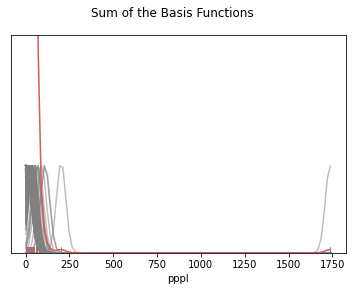

In [ ]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = df['pppl']

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
#url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

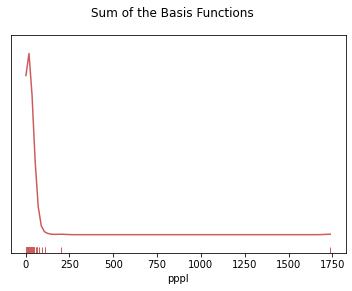

In [ ]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")


Text(0, 0.5, '$p$')

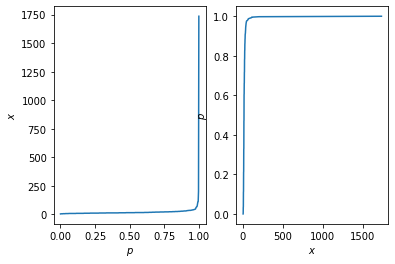

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create some randomly ddistributed data:
#data = np.random.randn(10000)
data = [round(d) for d in vikidia_pppls]

# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, data_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

In [ ]:
print (p)

[0.         0.00233645 0.0046729  0.00700935 0.00934579 0.01168224
 0.01401869 0.01635514 0.01869159 0.02102804 0.02336449 0.02570093
 0.02803738 0.03037383 0.03271028 0.03504673 0.03738318 0.03971963
 0.04205607 0.04439252 0.04672897 0.04906542 0.05140187 0.05373832
 0.05607477 0.05841121 0.06074766 0.06308411 0.06542056 0.06775701
 0.07009346 0.07242991 0.07476636 0.0771028  0.07943925 0.0817757
 0.08411215 0.0864486  0.08878505 0.0911215  0.09345794 0.09579439
 0.09813084 0.10046729 0.10280374 0.10514019 0.10747664 0.10981308
 0.11214953 0.11448598 0.11682243 0.11915888 0.12149533 0.12383178
 0.12616822 0.12850467 0.13084112 0.13317757 0.13551402 0.13785047
 0.14018692 0.14252336 0.14485981 0.14719626 0.14953271 0.15186916
 0.15420561 0.15654206 0.1588785  0.16121495 0.1635514  0.16588785
 0.1682243  0.17056075 0.1728972  0.17523364 0.17757009 0.17990654
 0.18224299 0.18457944 0.18691589 0.18925234 0.19158879 0.19392523
 0.19626168 0.19859813 0.20093458 0.20327103 0.20560748 0.20794

In [ ]:
import matplotlib as plt
import seaborn as sns
 
 
sns.boxplot(x='Outcome', y='BloodPressure', data=(p,data))
 
sns.violinplot(x='Outcome', y='BloodPressure', data=(p,data))

AttributeError: ignored